In [1]:
import pandas as pd

def merge_datasets(file_list, merge_on):
    # Initialize the merged DataFrame with the first dataset read from the file list
    merged_df = pd.read_csv(file_list[0])
    
    # Loop through the remaining files in the list
    for file in file_list[1:]:
        # Read the next dataset into a DataFrame
        next_df = pd.read_csv(file)
        
        # Merge the current merged DataFrame with the next DataFrame on the specified column
        # This keeps only the rows where the merge_on column matches in both DataFrames
        merged_df = merged_df.merge(next_df, on=merge_on)

    # Return the final merged DataFrame containing data from all specified datasets
    return merged_df


files_to_merge = ['dataset1.csv', 'dataset2.csv', 'dataset3.csv']  # List of file paths
merge_column = 'ID'  # The column on which to merge the datasets

df = merge_datasets(files_to_merge, merge_column)

# Display the merged DataFrame to verify the result
df.head()


ID  gender  minority  deprived  C_we  C_wk  G_we  G_wk  S_we  S_wk  \
0  1087192       0         0         0   2.0   0.5   0.5   0.5   1.0   0.5   
1  1087195       0         0         0   2.0   1.0   0.0   0.0   3.0   1.0   
2  1087205       0         0         0   1.0   0.5   0.0   0.0   0.5   0.5   
3  1087214       0         0         0   2.0   1.0   0.5   0.0   2.0   1.0   
4  1087222       0         0         0   1.0   3.0   0.0   0.0   2.0   1.0   

   ...  Engs  Dealpr  Thcklr  Goodme  Clsep  Conf  Mkmind  Loved  Intthg  \
0  ...     4       4       4       4      5     4       4      5       4   
1  ...     3       4       5       3      5     4       4      5       4   
2  ...     3       3       3       3      4     3       3      3       4   
3  ...     4       4       4       4      3     5       4      5       4   
4  ...     2       3       3       4      4     3       5      5       5   

   Cheer  
0      4  
1      4  
2      4  
3      4  
4      5  

[5 rows x 26 columns]

In [2]:
df = df.drop(columns=['ID'])

<h2><b>Data Inspection</b></h2>

In [3]:
import pandas as pd
from tabulate import tabulate

In [4]:
metrics_data = {
    "Metric": ["Number of Records", "Number of Features"],
    "Values": [df.shape[0], df.shape[1]]
}
metrics_df = pd.DataFrame(metrics_data)

# Display the Dataset Metrics Table
print("\nDataset Metrics:")
print(tabulate(metrics_df, headers='keys', tablefmt='pretty'))



Dataset Metrics:
+---+--------------------+--------+
|   |       Metric       | Values |
+---+--------------------+--------+
| 0 | Number of Records  | 98278  |
| 1 | Number of Features |   25   |
+---+--------------------+--------+


In [5]:
# Categorize the features
categorical_features = df.columns[0:3].tolist()  # First 3 are categorical
continuous_features = df.columns[3:11].tolist()  # Next 8 are continuous
target_variables = df.columns[11:].tolist()  # Remaining are target variables

# Function to calculate statistics for continuous features
def get_continuous_stats(df, features):
    stats = []
    for feature in features:
        min_value = df[feature].min()
        max_value = df[feature].max()
        mean_value = df[feature].mean()
        median_value = df[feature].median()
        std_dev = df[feature].std()
        q1 = df[feature].quantile(0.25)
        q3 = df[feature].quantile(0.75)
        
        stats.append([
            feature, "Continuous",
            min_value, max_value, mean_value, median_value, std_dev, q1, q3
        ])
    return stats

# Function to gather categorical feature info
def get_categorical_info(df, features):
    stats = []
    for feature in features:
        mode_value = df[feature].mode()[0]  # Get the mode for categorical features
        mode_percentage = (df[feature].value_counts(normalize=True).max()) * 100  # Calculate percentage of mode
        unique_values = df[feature].unique()  # Unique values in categorical features
        stats.append([feature, "Categorical", mode_value, f"{mode_percentage:.2f}%", unique_values.tolist()])
    return stats

# Function to gather target variable info
def get_target_info(df, features):
    stats = []
    for feature in features:
        mode_value = df[feature].mode()[0]  # Get the mode for target variables
        mode_percentage = (df[feature].value_counts(normalize=True).max()) * 100  # Calculate percentage of mode
        unique_values = df[feature].unique()  # Unique values in target variables
        stats.append([feature, "Target Variable", mode_value, f"{mode_percentage:.2f}%", unique_values.tolist()])
    return stats

# Collect statistics
continuous_stats = get_continuous_stats(df, continuous_features)
categorical_stats = get_categorical_info(df, categorical_features)
target_stats = get_target_info(df, target_variables)

# Convert stats to DataFrames for better formatting
continuous_df = pd.DataFrame(continuous_stats, columns=[
    'Feature', 'Data Type', 
    'Min', 'Max', 'Mean', 'Median', 'Std Dev', 'Q1', 'Q3'
])

categorical_df = pd.DataFrame(categorical_stats, columns=['Feature', 'Data Type', 'Mode', 'Mode (%)', 'Unique Values'])

target_df = pd.DataFrame(target_stats, columns=['Feature', 'Data Type', 'Mode', 'Mode (%)', 'Unique Values'])

# Display the tables
print("\nContinuous Features Statistics:")
print(tabulate(continuous_df, headers='keys', tablefmt='pretty'))

print("\nCategorical Features Information:")
print(tabulate(categorical_df, headers='keys', tablefmt='pretty'))

print("\nTarget Variables Information:")
print(tabulate(target_df, headers='keys', tablefmt='pretty'))


Continuous Features Statistics:
+---+---------+------------+-----+-----+--------------------+--------+--------------------+-----+-----+
|   | Feature | Data Type  | Min | Max |        Mean        | Median |      Std Dev       | Q1  | Q3  |
+---+---------+------------+-----+-----+--------------------+--------+--------------------+-----+-----+
| 0 |  C_we   | Continuous | 0.0 | 7.0 | 2.1984828751093834 |  2.0   | 2.0698019564097385 | 0.5 | 3.0 |
| 1 |  C_wk   | Continuous | 0.0 | 7.0 | 1.768091536254299  |  1.0   | 1.722841806703696  | 0.5 | 3.0 |
| 2 |  G_we   | Continuous | 0.0 | 7.0 | 1.7263324446976942 |  0.5   | 2.159675291156557  | 0.0 | 3.0 |
| 3 |  G_wk   | Continuous | 0.0 | 7.0 | 0.9978275911190704 |  0.0   | 1.5404956466390807 | 0.0 | 2.0 |
| 4 |  S_we   | Continuous | 0.0 | 7.0 | 3.5040853497222164 |  3.0   | 2.490748492863823  | 1.0 | 6.0 |
| 5 |  S_wk   | Continuous | 0.0 | 7.0 | 2.8896039805449845 |  2.0   | 2.3261384824634783 | 1.0 | 5.0 |
| 6 |  T_we   | Continuous | 0.

<h2><b>Handling Missing Data</b></h2>

In [6]:
# Count null values
null_counts = df.isnull().sum()

# Filter to show only columns with null values
null_counts_filtered = null_counts[null_counts > 0]

# Display results
if not null_counts_filtered.empty:
    null_df = null_counts_filtered.reset_index()
    null_df.columns = ['Column', 'Count'] 
    print(tabulate(null_df, headers='keys', tablefmt='pretty'))
else:
    print("No columns contain null values.")

No columns contain null values.


<h2><b>Correlation Analysis</b></h2>

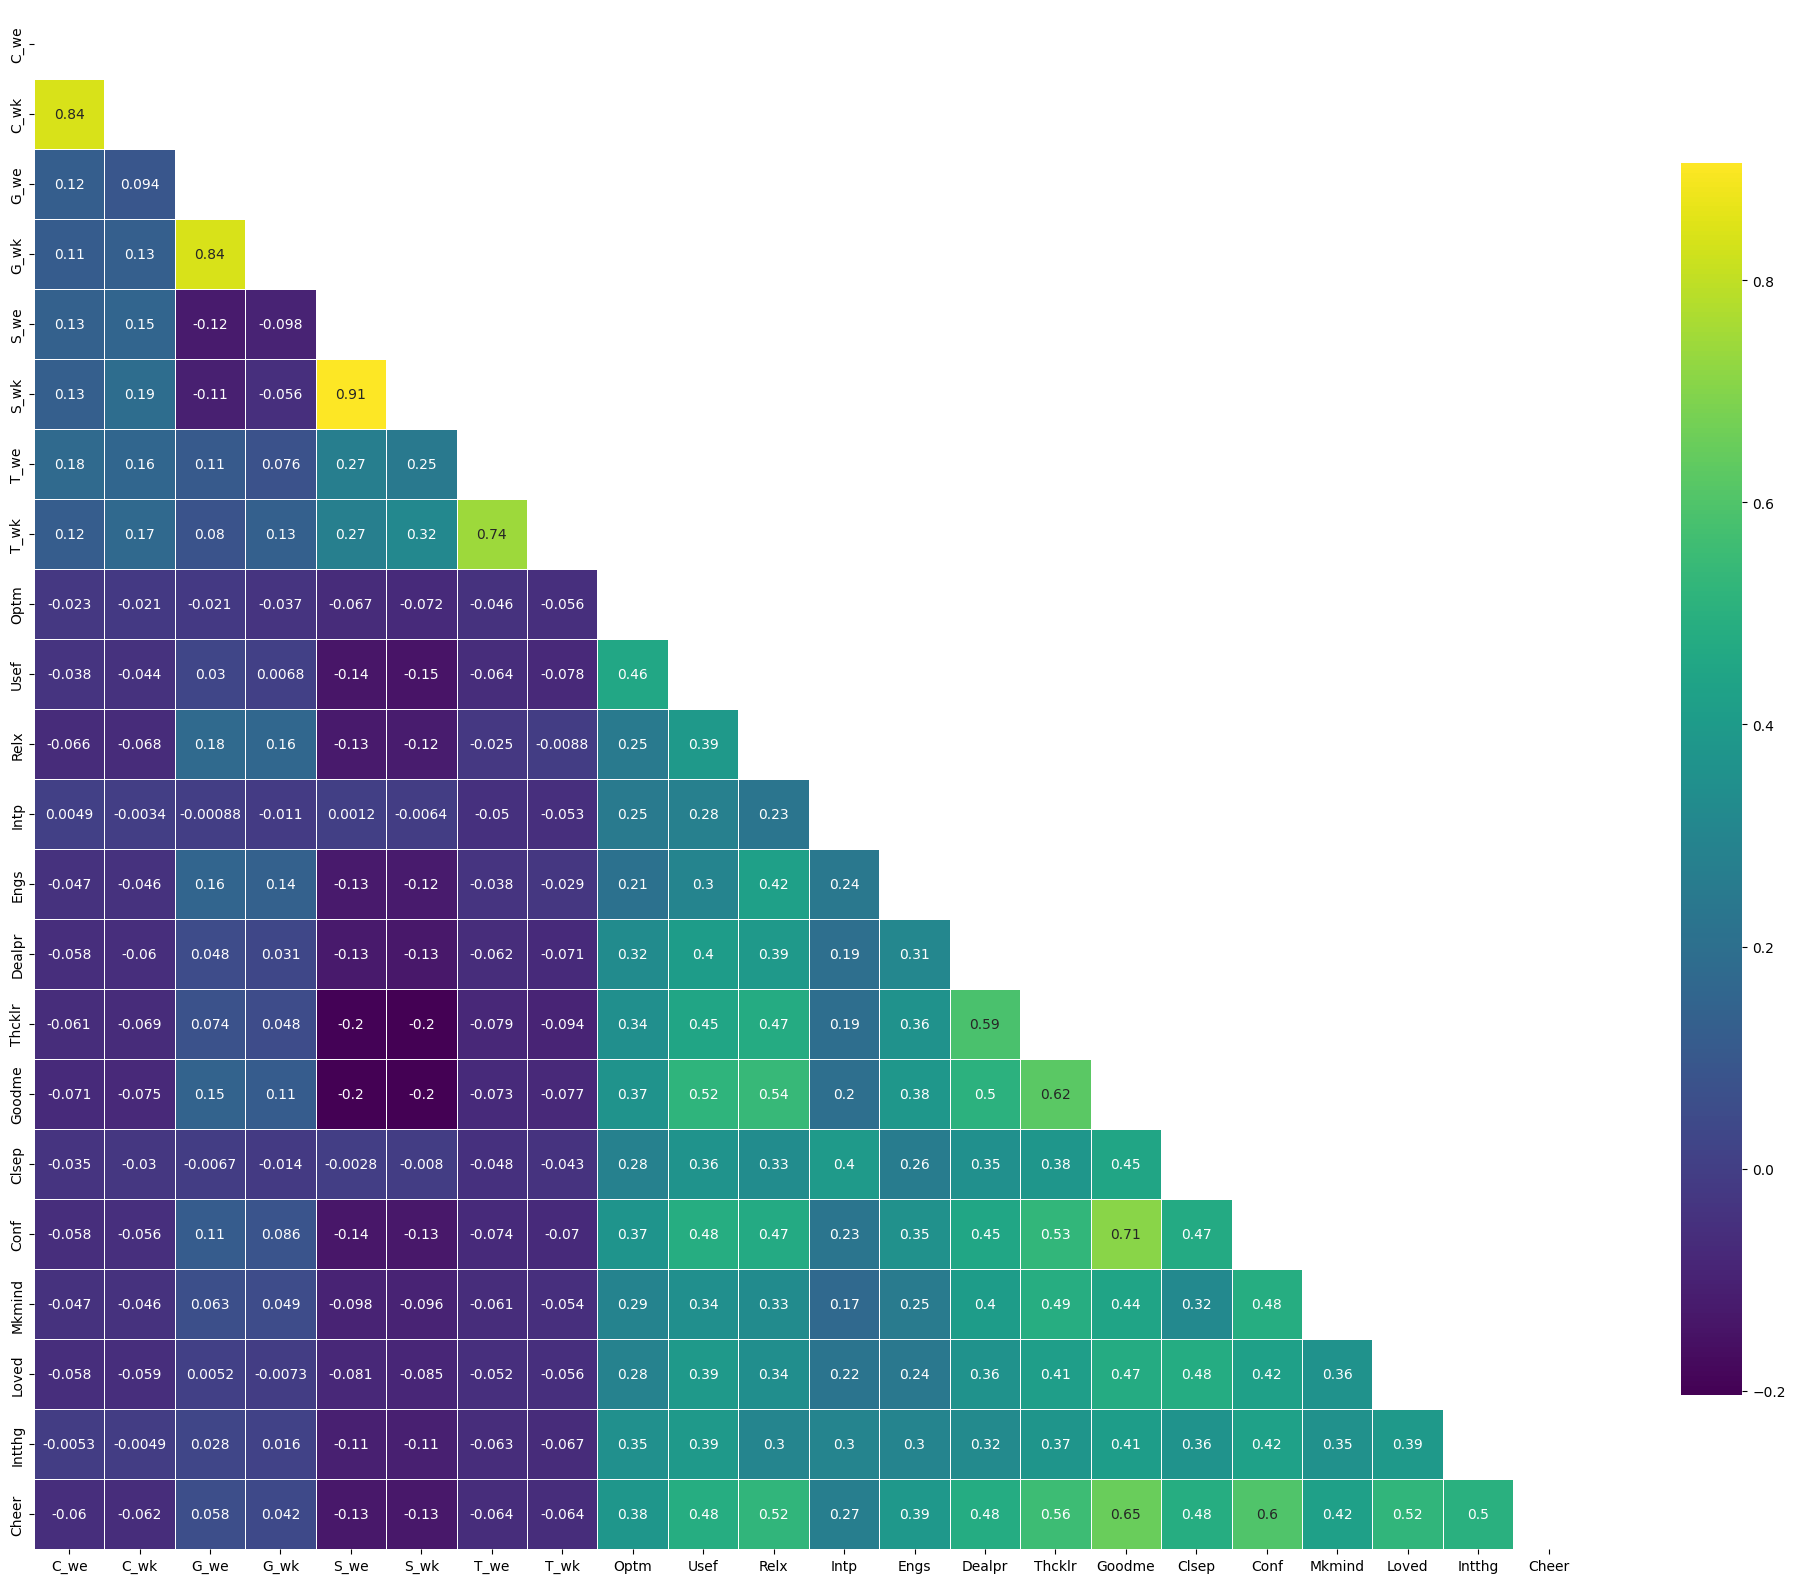

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_correlation_heatmap(df, continuous_features, target_variables):
    # Combine continuous features and target variables
    corr_data = df[continuous_features + target_variables].corr()
    
    # Create a mask for the upper triangle
    mask = np.triu(np.ones_like(corr_data, dtype=bool))
    
    # Set the size of the plot
    plt.figure(figsize=(25, 20))
    
    # Create the heatmap
    sns.heatmap(corr_data, 
                annot=True, 
                mask=mask,  # Apply the mask to hide the upper triangle
                cmap='viridis',  # Change color palette for attractiveness
                linewidths=0.5,
                cbar_kws={"shrink": .8})  # Adjust color bar size
    
    # Show the plot
    plt.show()


plot_correlation_heatmap(df, continuous_features, target_variables)


In [8]:
weight_weekday = 0.7  # Weight for existing weekday values
weight_weekend = 0.3   # Weight for weekend values

# Update values in the DataFrame
df['C_wk'] = (weight_weekday * df['C_wk']) + (weight_weekend * df['C_we'])
df['G_wk'] = (weight_weekday * df['G_wk']) + (weight_weekend * df['G_we'])
df['S_wk'] = (weight_weekday * df['S_wk']) + (weight_weekend * df['S_we'])
df['T_wk'] = (weight_weekday * df['T_wk']) + (weight_weekend * df['T_we'])

# Drop the weekend columns
df.drop(columns=['C_we', 'G_we', 'S_we', 'T_we'], inplace=True)
continuous_features = ['C_wk', 'G_wk', 'S_wk', 'T_wk']

<h2><b>EDA: Distribution Plot</b></h2>

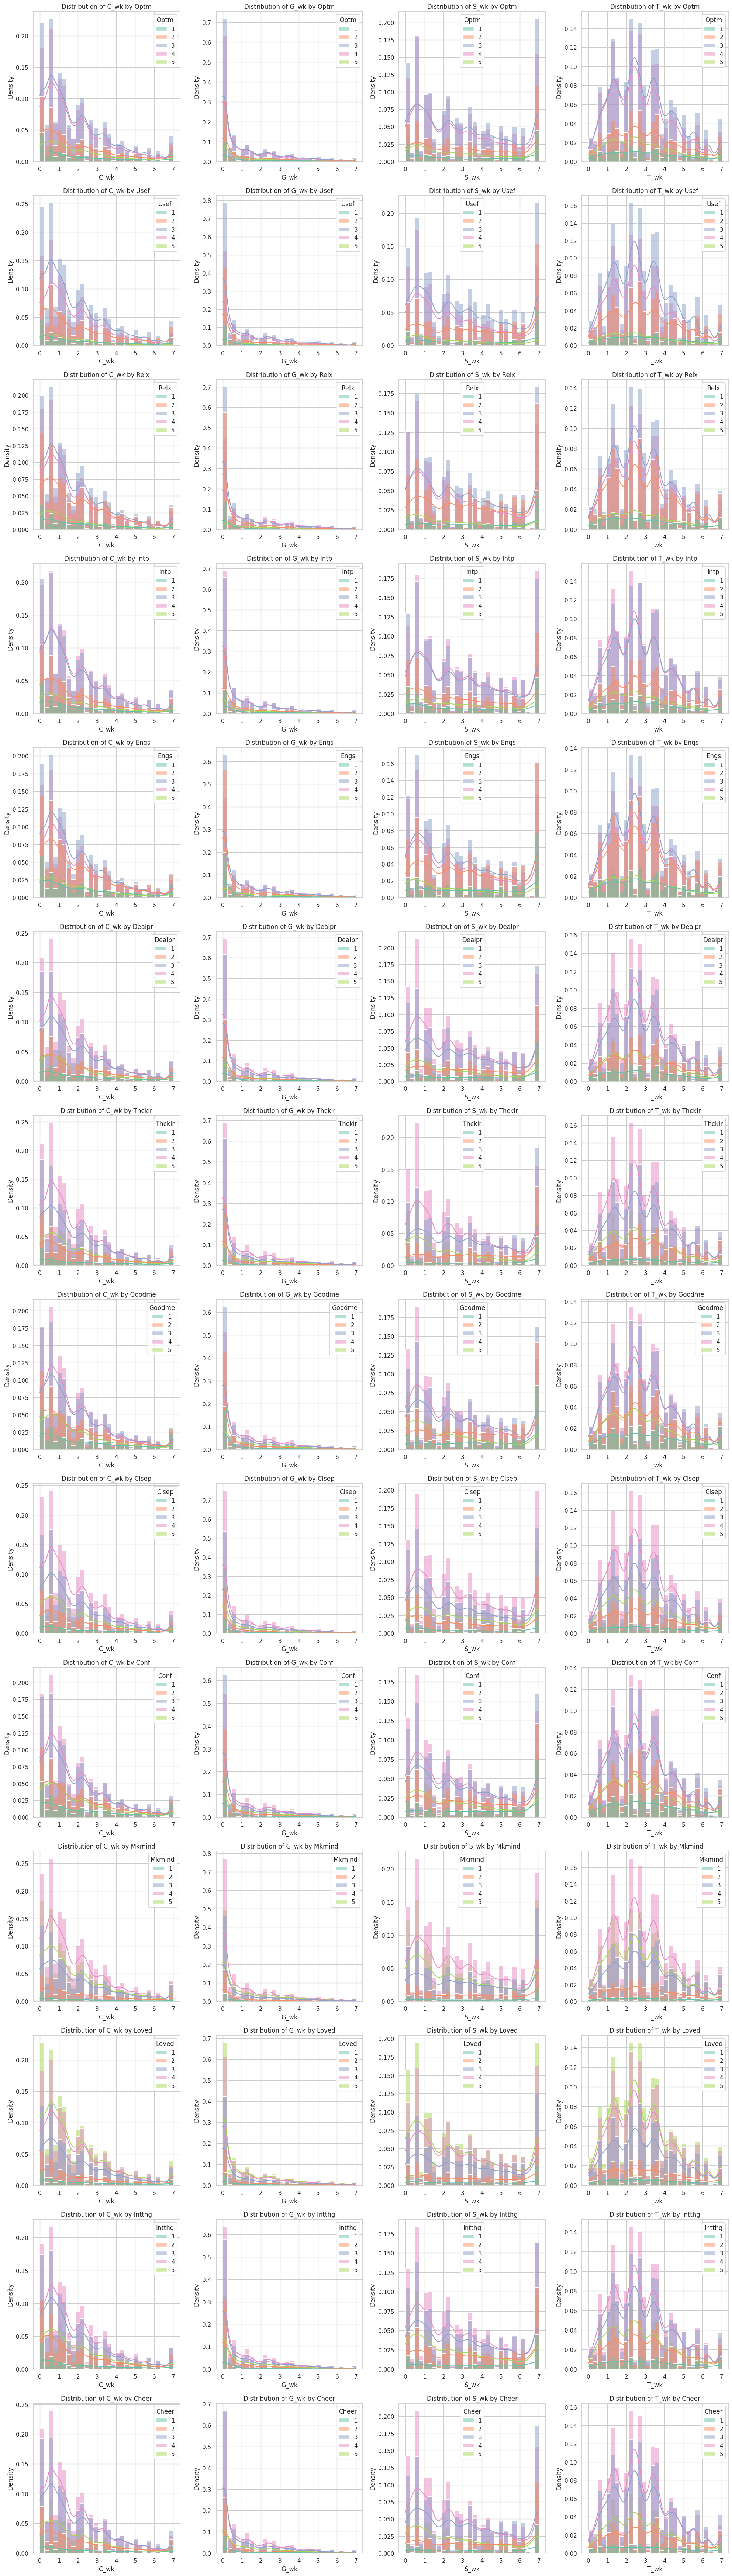

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style='whitegrid')

# Number of target variables and continuous features
num_targets = len(target_variables)
num_features = len(continuous_features)

# Create a figure with subplots: one row for each target variable
fig, axes = plt.subplots(num_targets, num_features, figsize=(5 * num_features, 5 * num_targets))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Loop through each target variable
for j, target_variable in enumerate(target_variables):
    # Create a distinct color palette
    palette = sns.color_palette("Set2", n_colors=df[target_variable].nunique())
    
    # Loop through each continuous feature
    for i, continuous_feature in enumerate(continuous_features):
        # Create a distribution plot for the continuous feature, colored by the target variable
        sns.histplot(data=df, x=continuous_feature, hue=target_variable, 
                     stat="density", kde=True, ax=axes[j, i], palette=palette, bins=30)
        
        # Set titles and labels
        axes[j, i].set_title(f'Distribution of {continuous_feature} by {target_variable}')
        axes[j, i].set_xlabel(continuous_feature)
        axes[j, i].set_ylabel('Density')

# Show the plot
plt.tight_layout()
plt.show()


<h3><b>Scatter Plots with Regression Lines</b></h3>

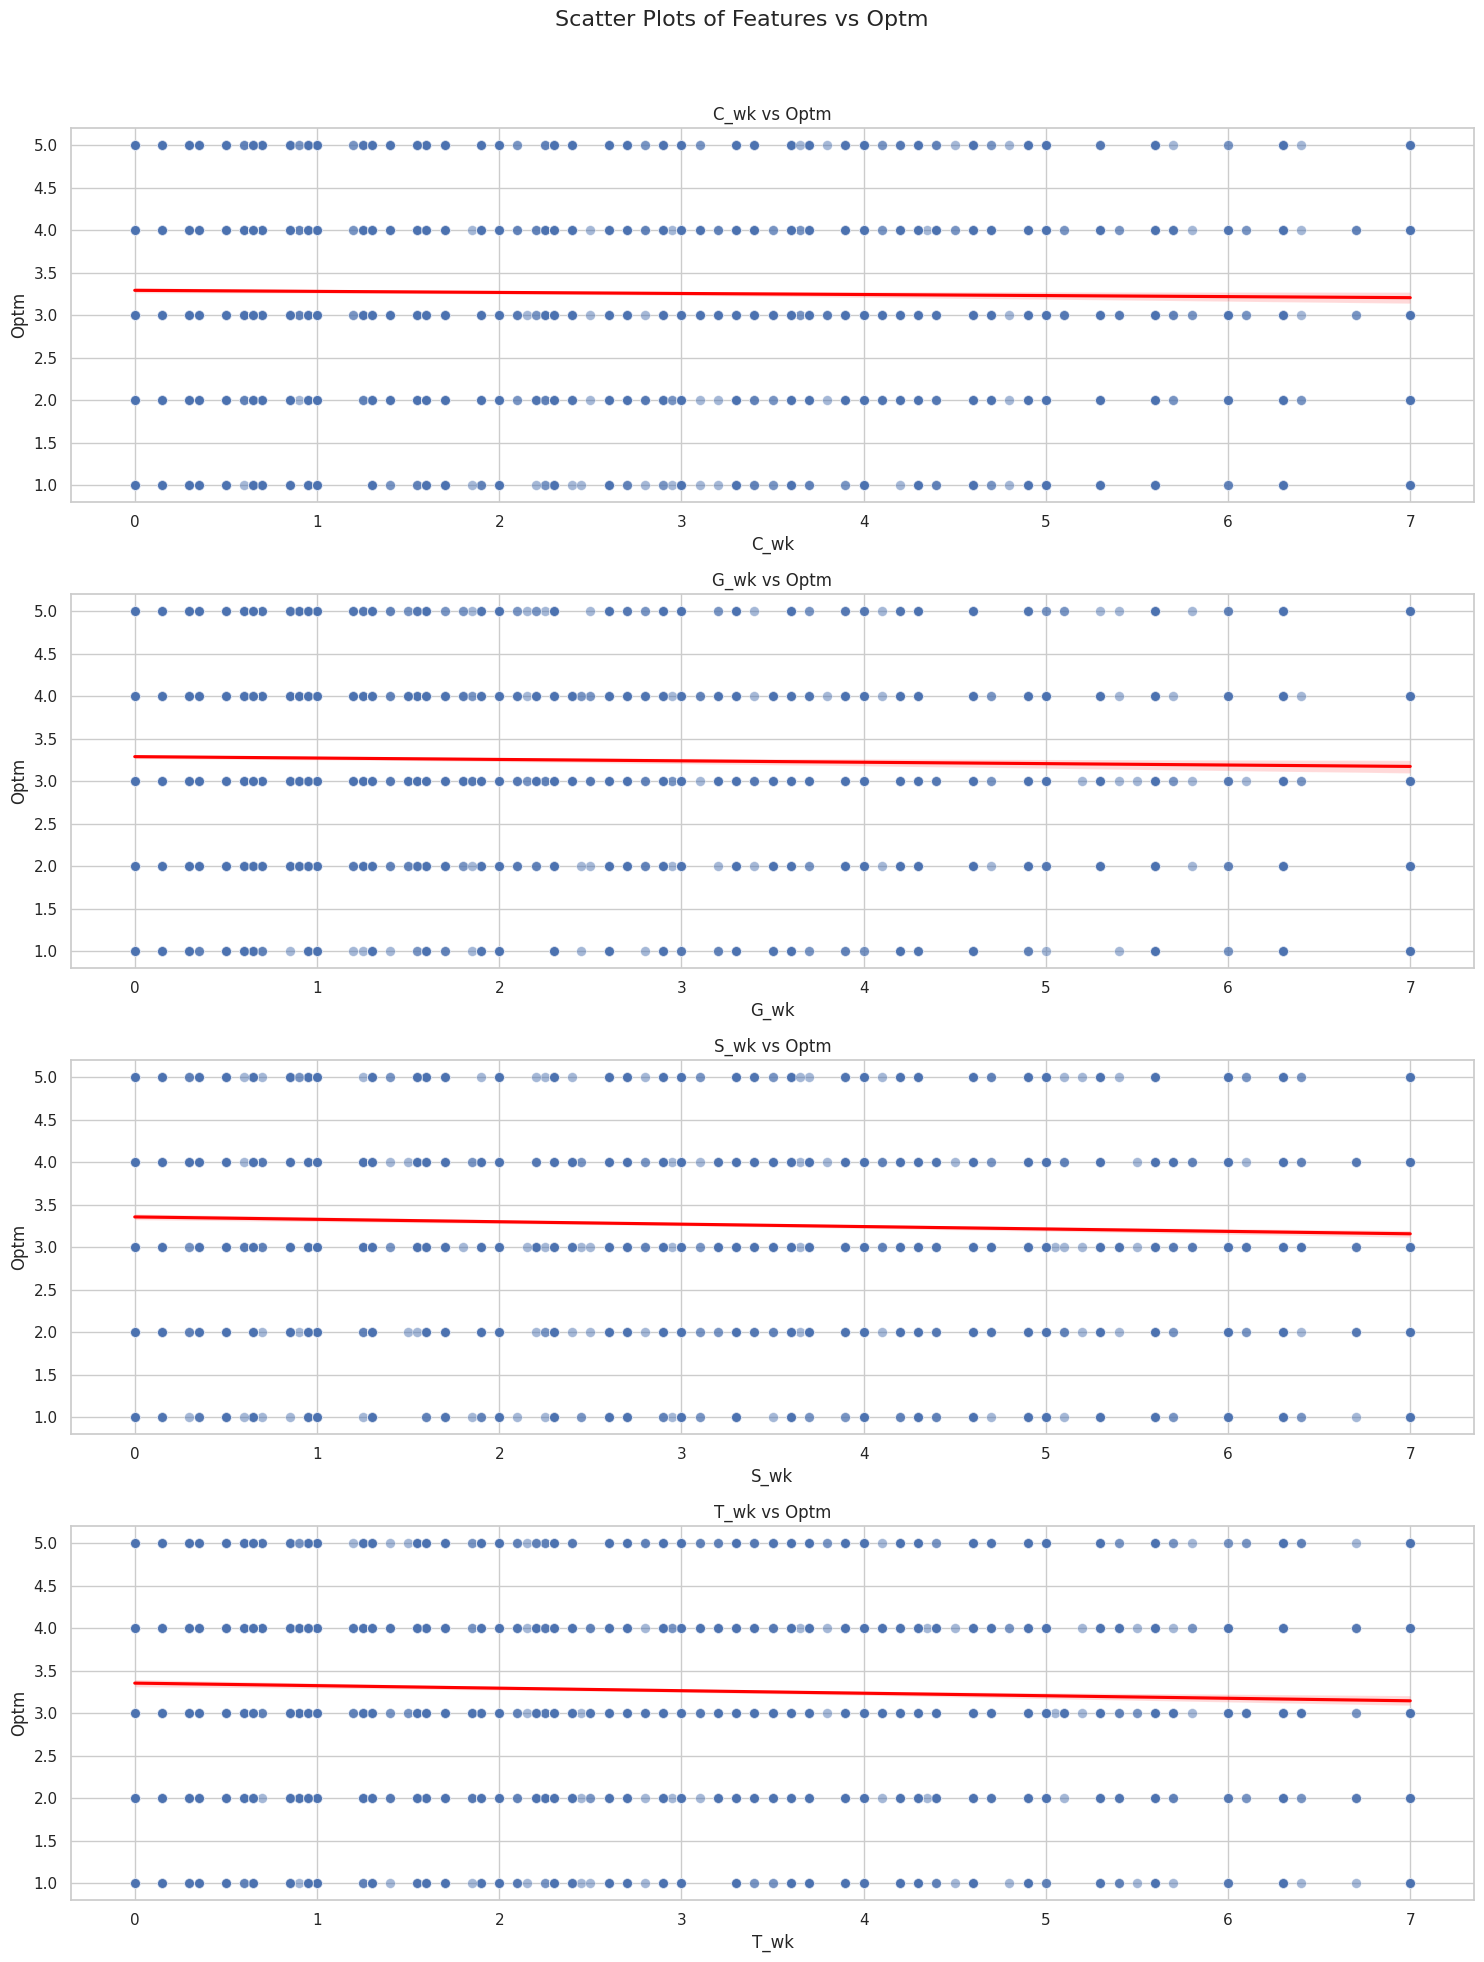

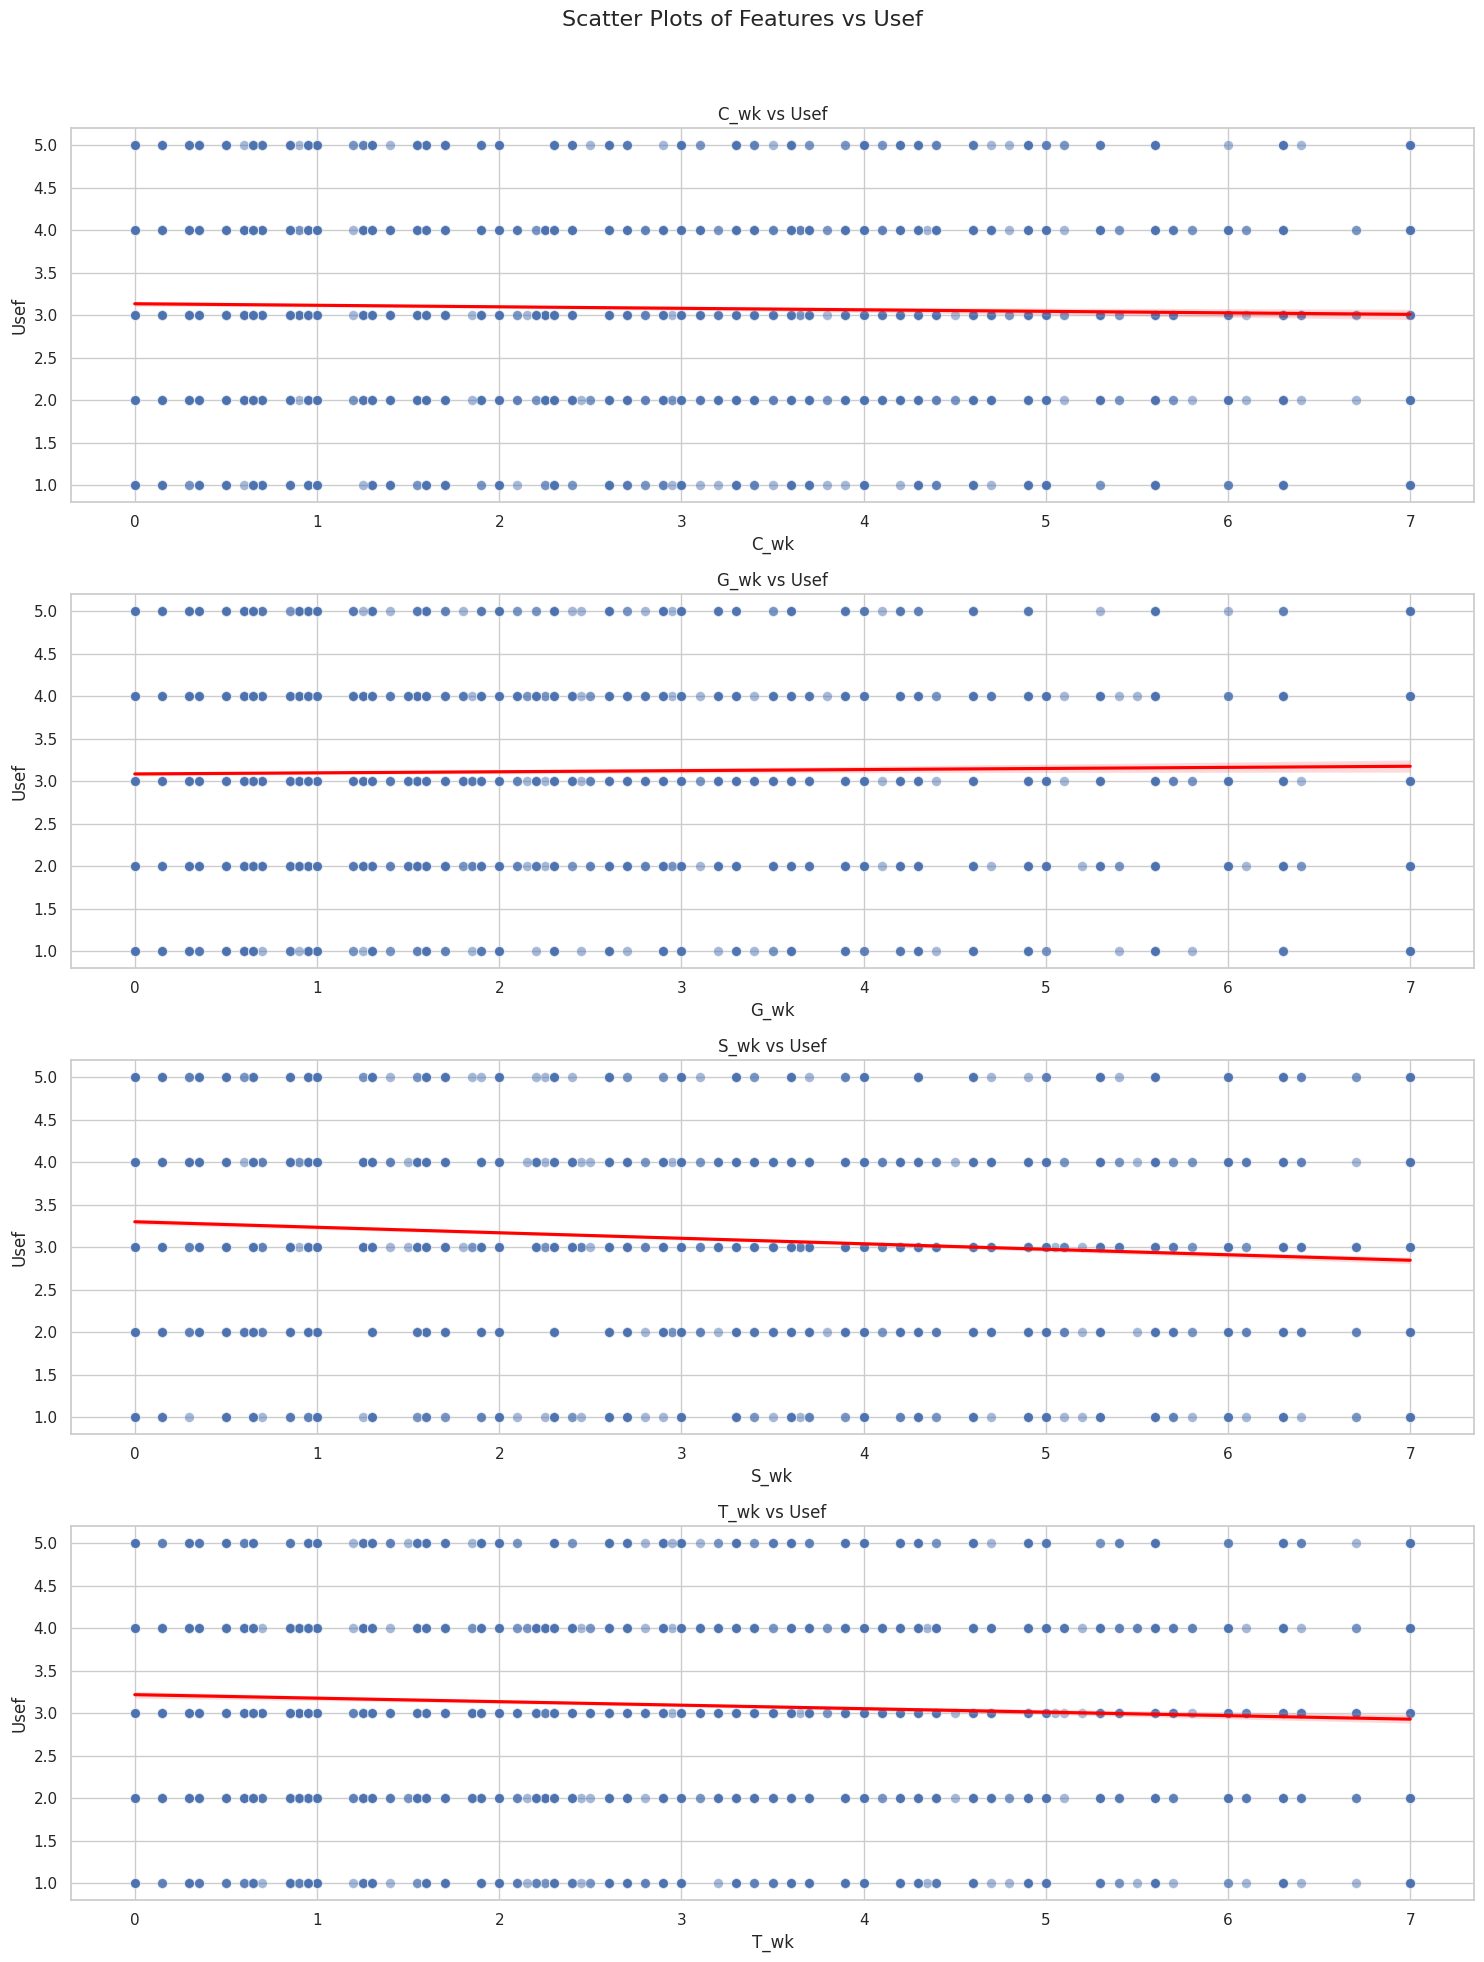

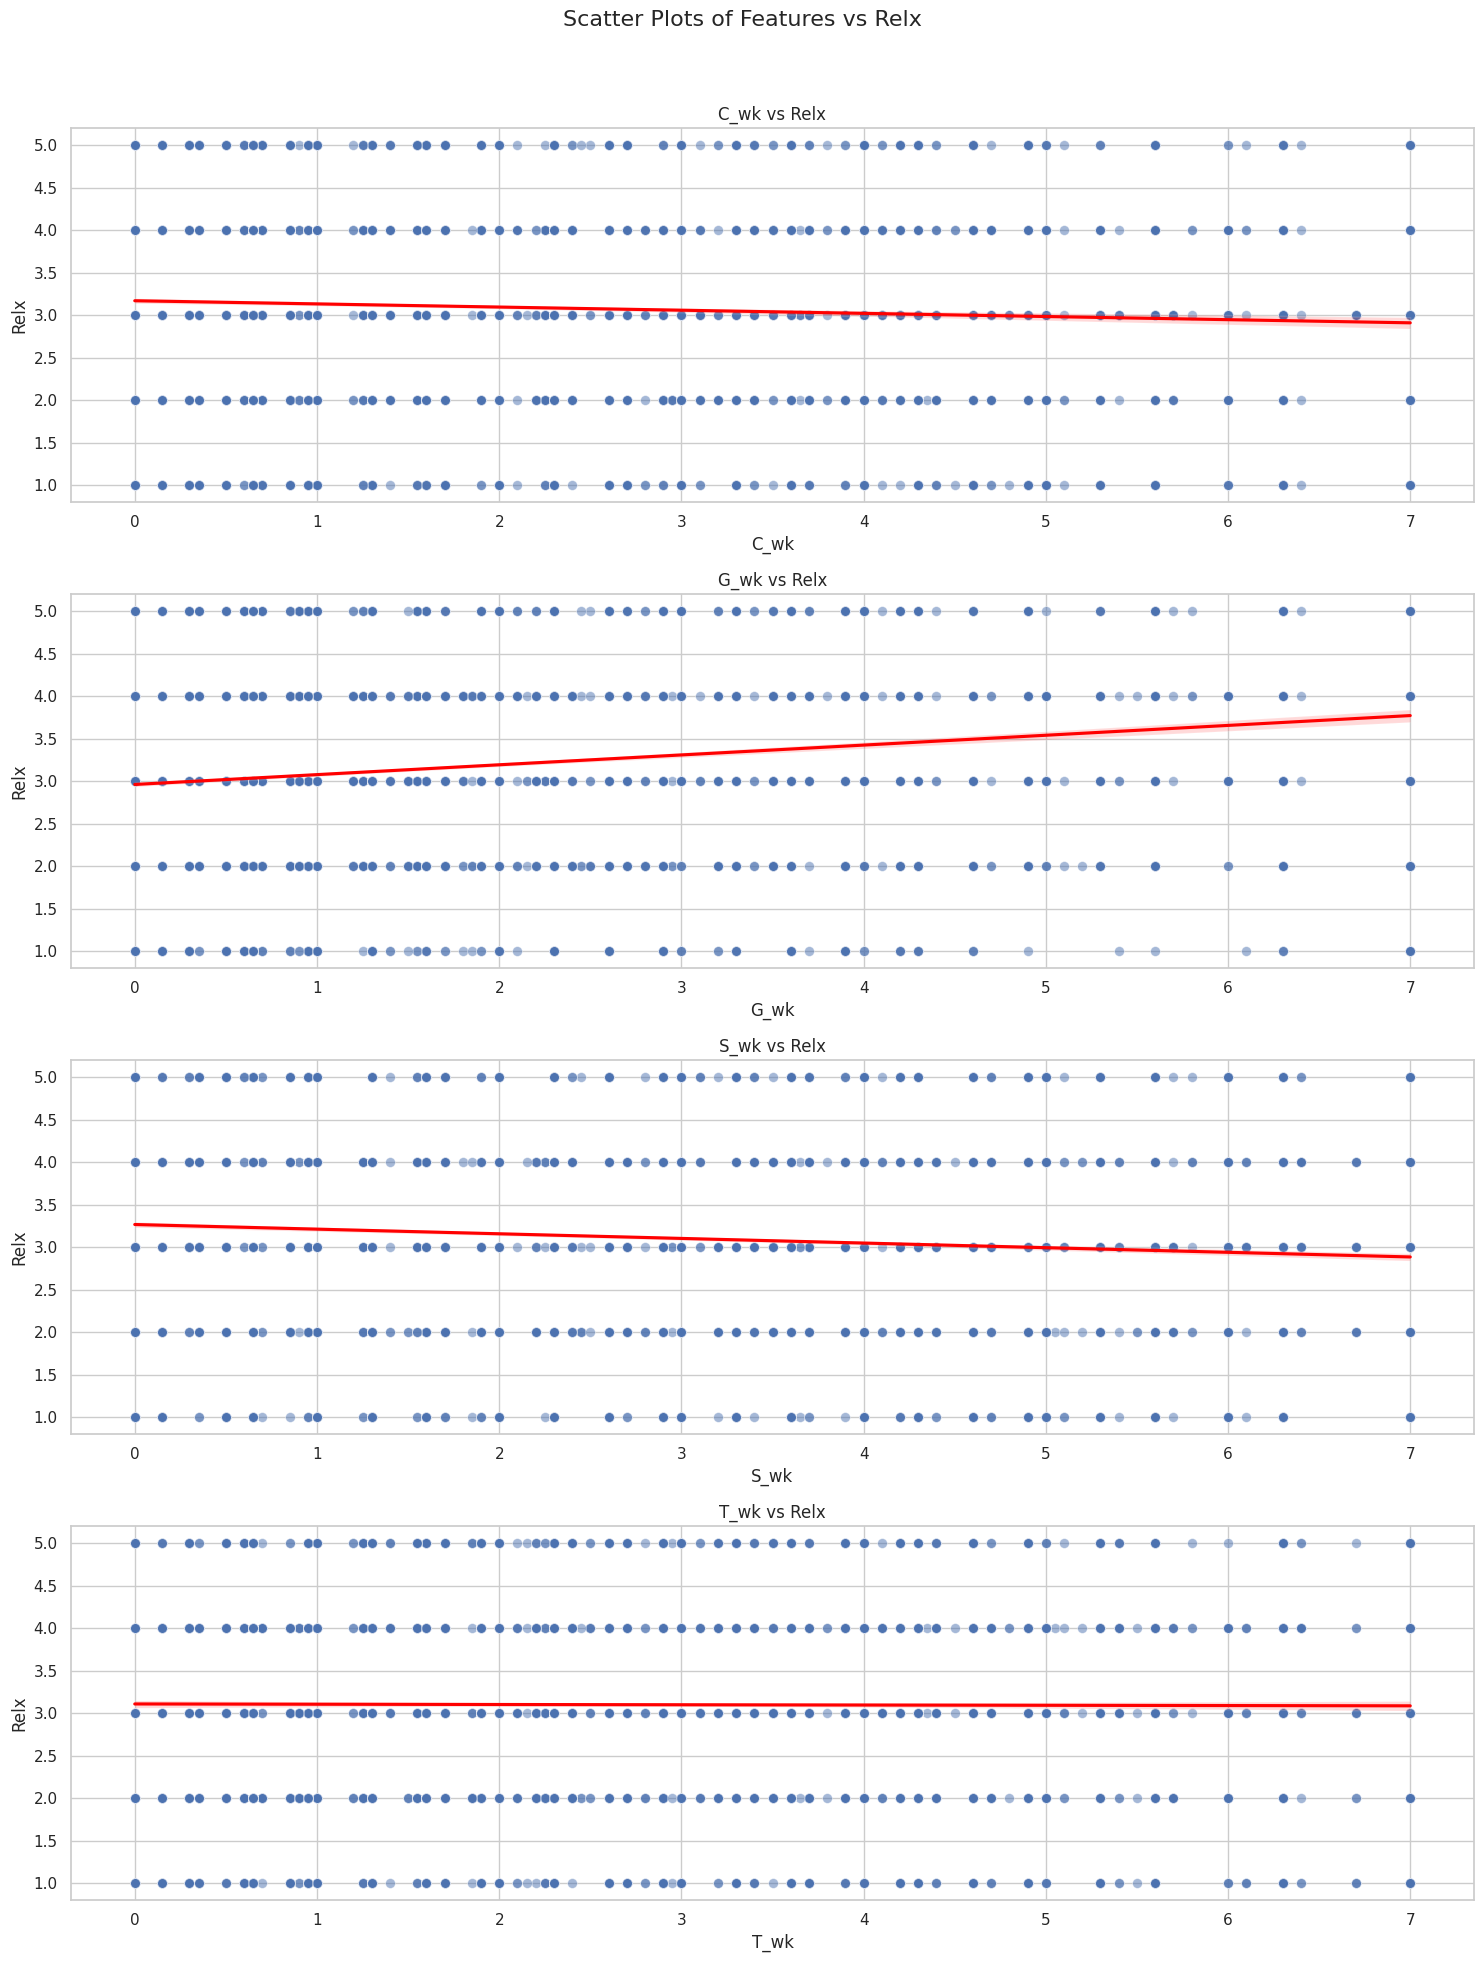

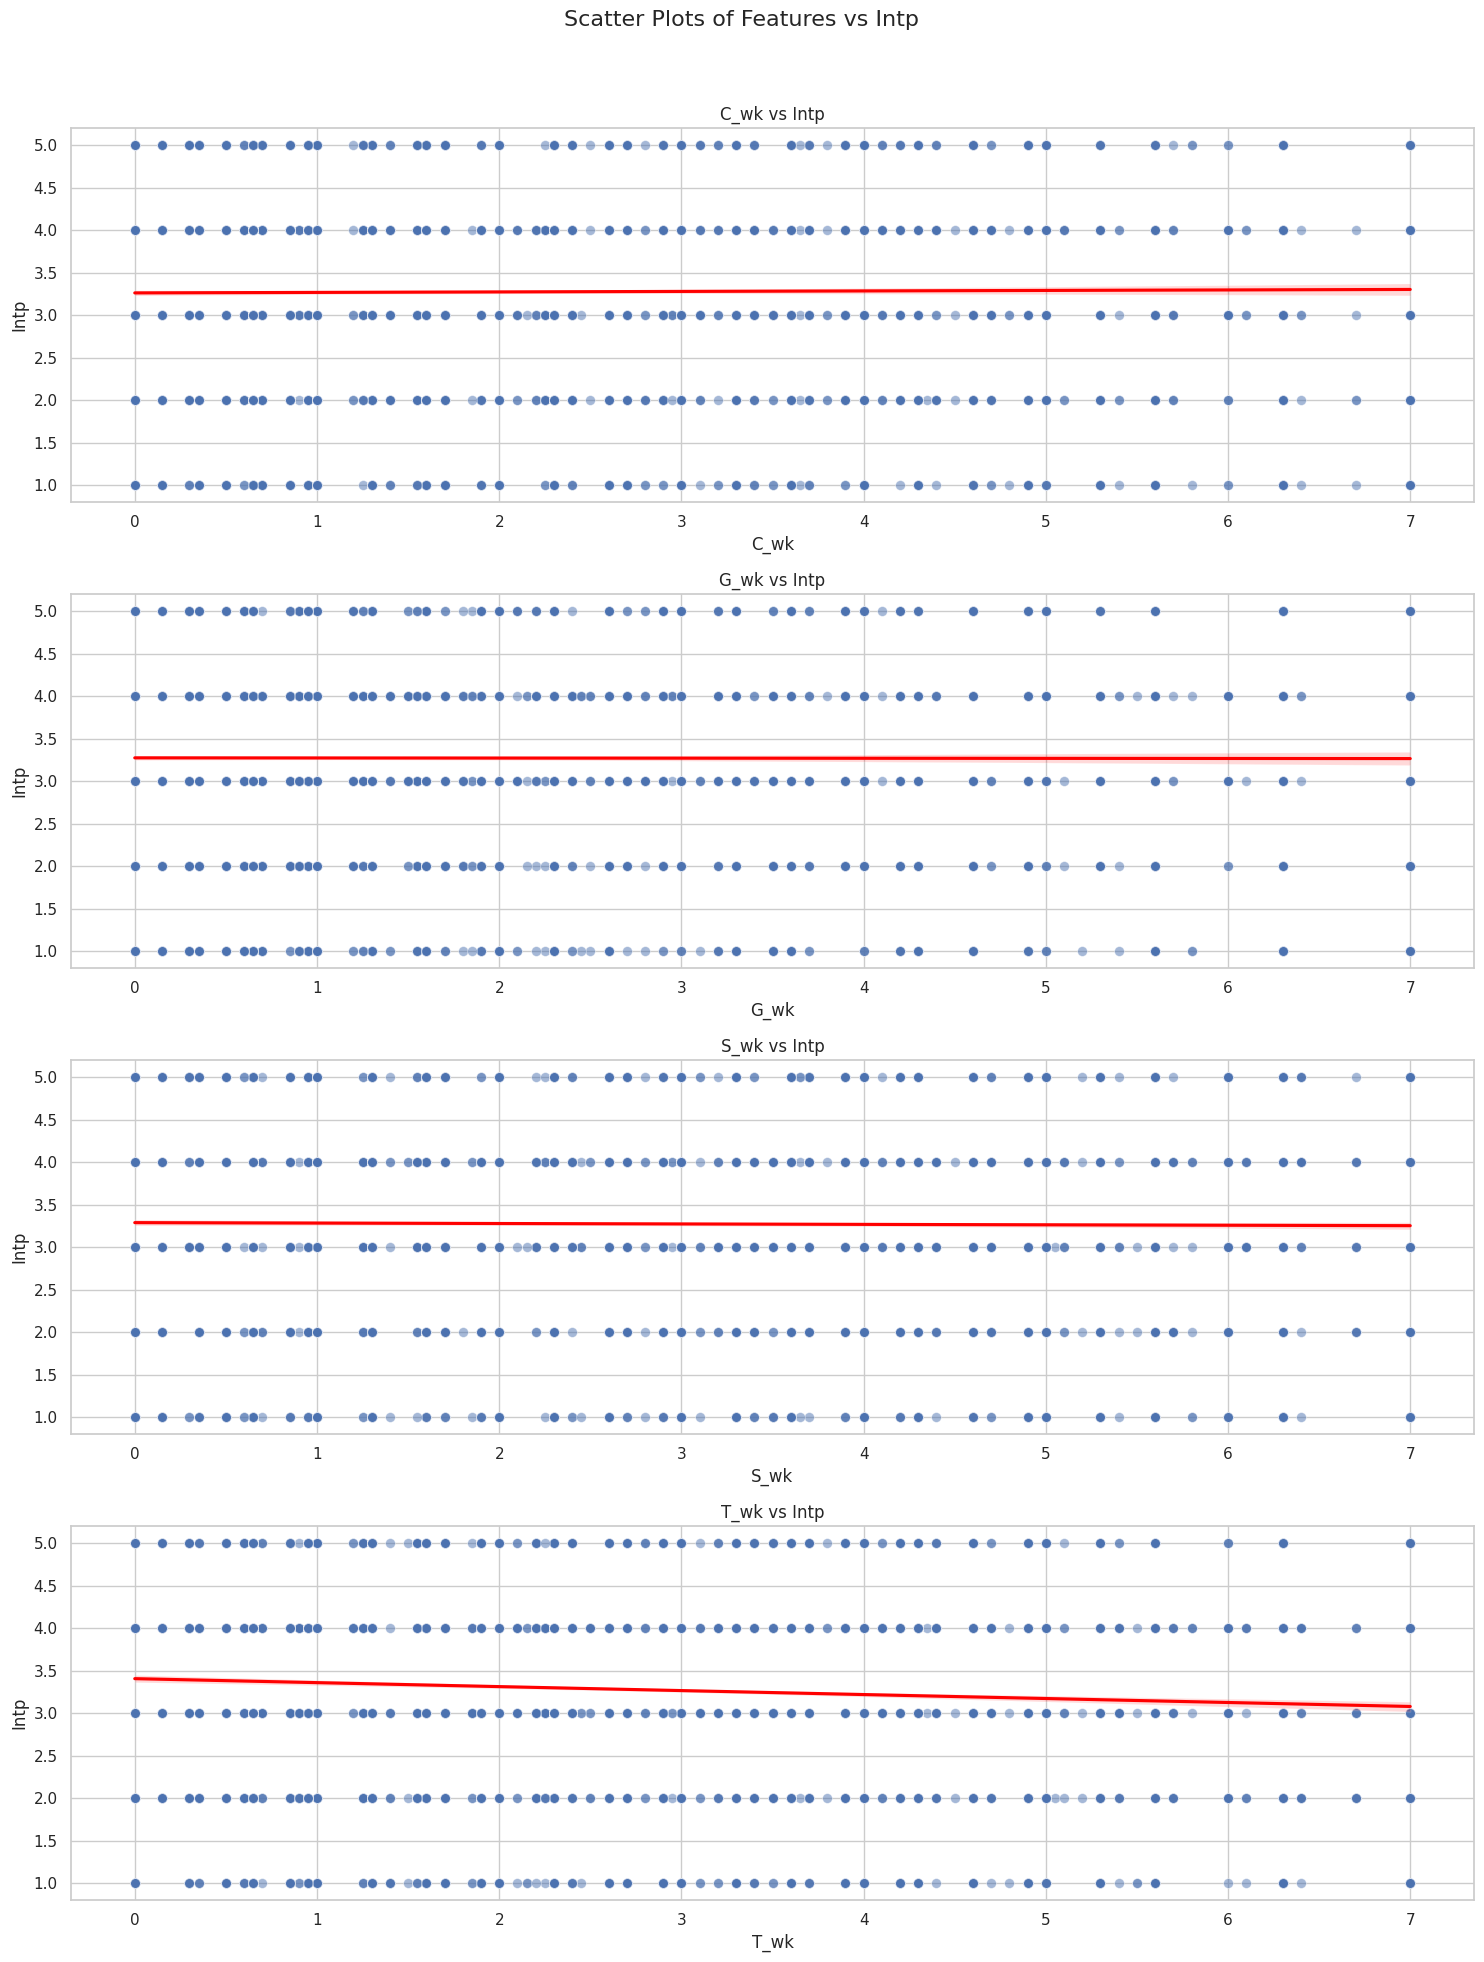

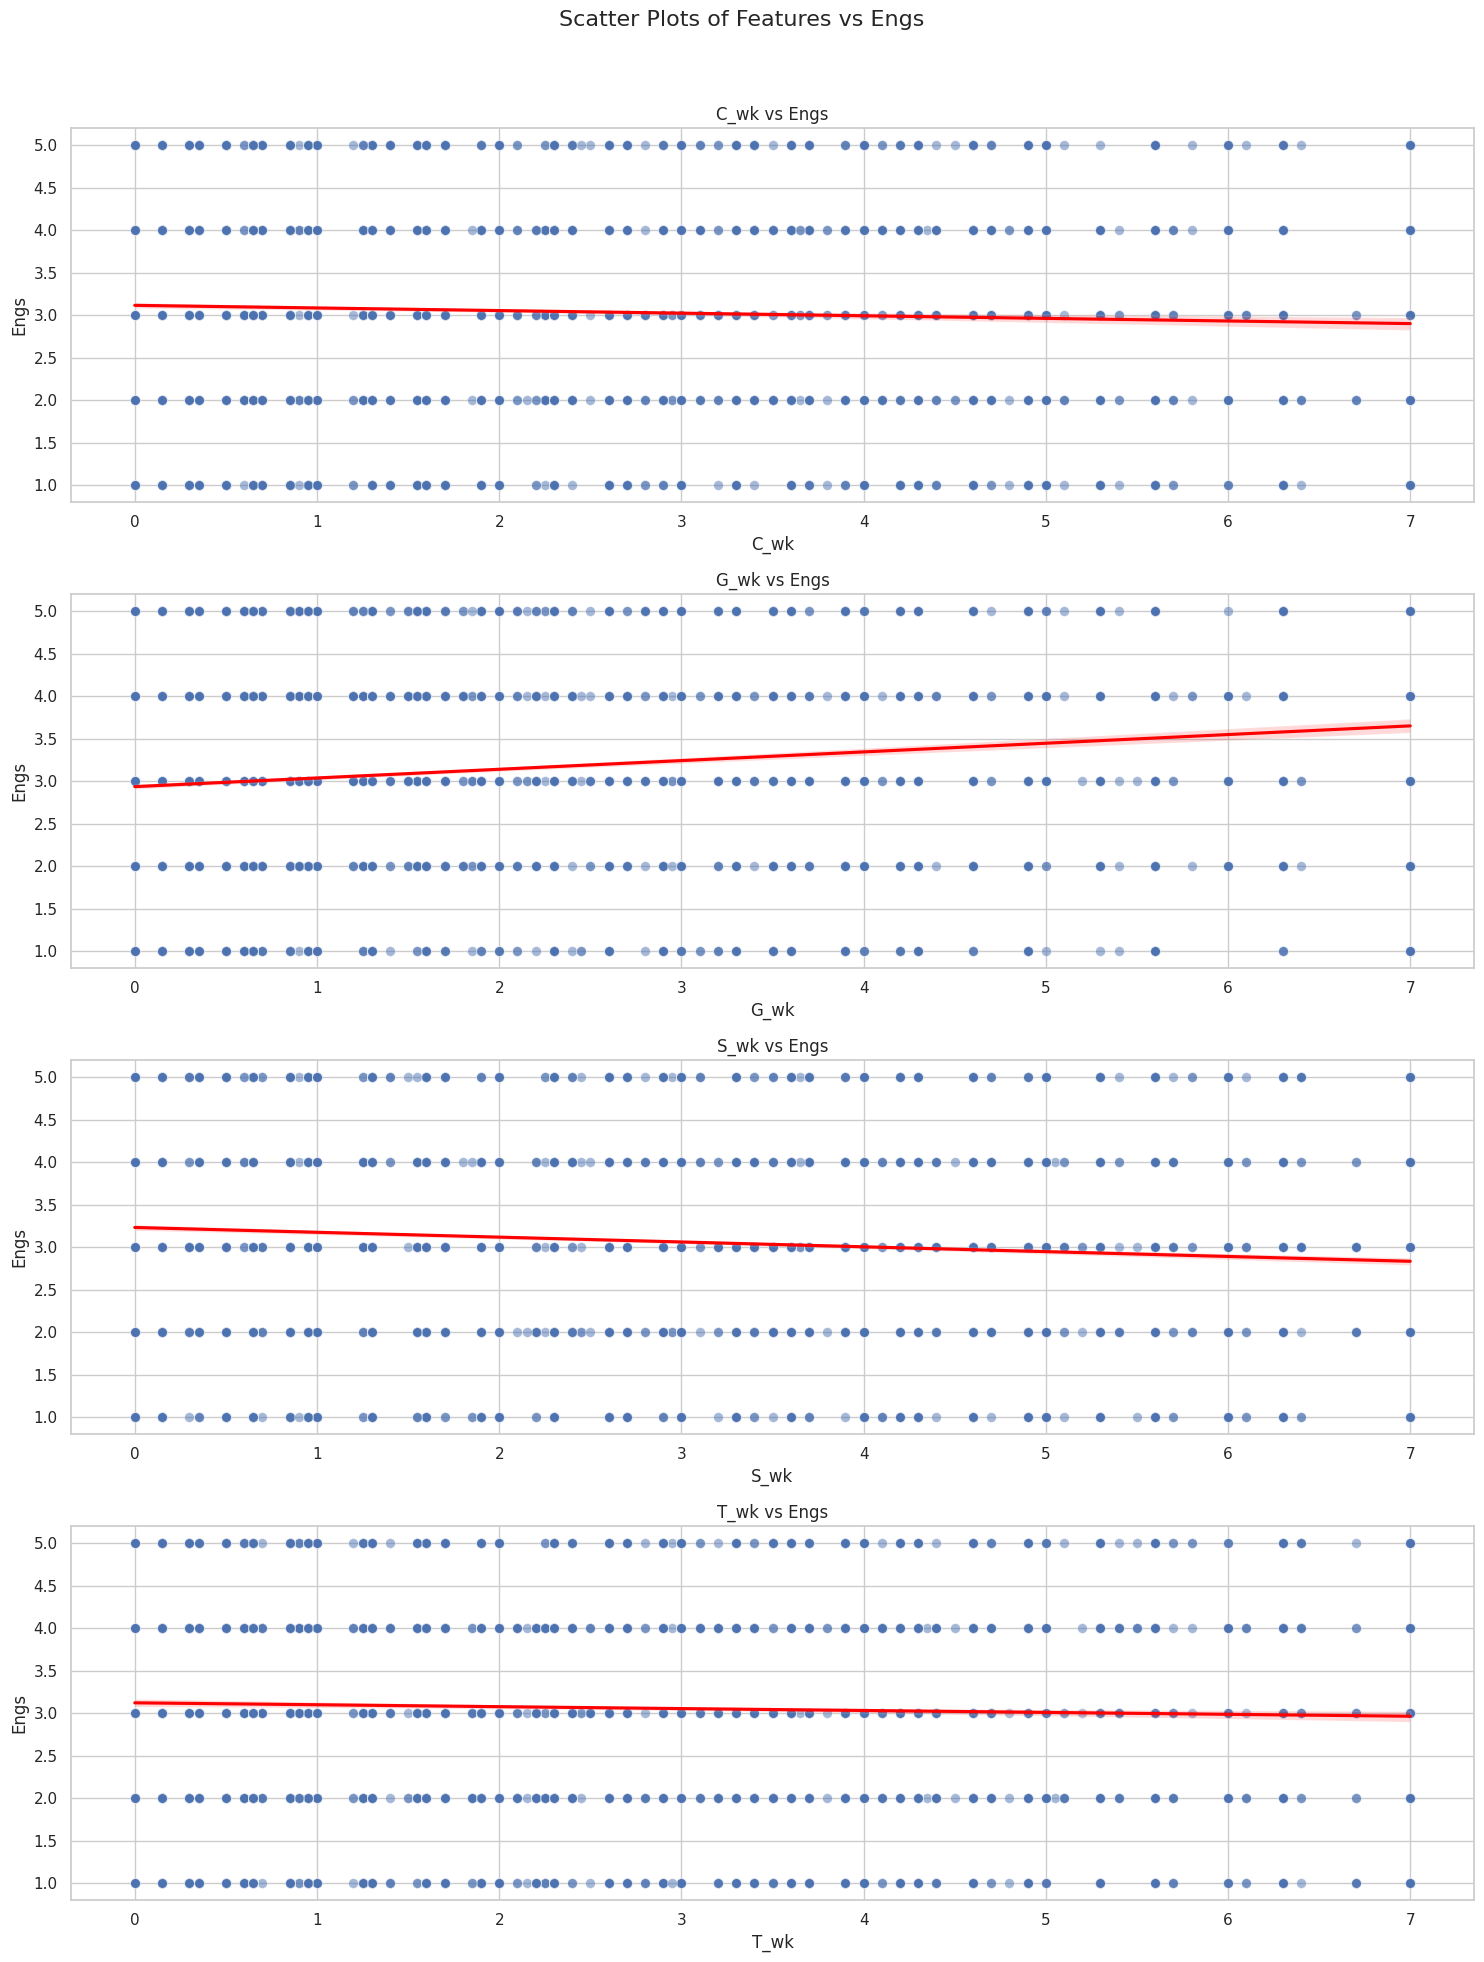

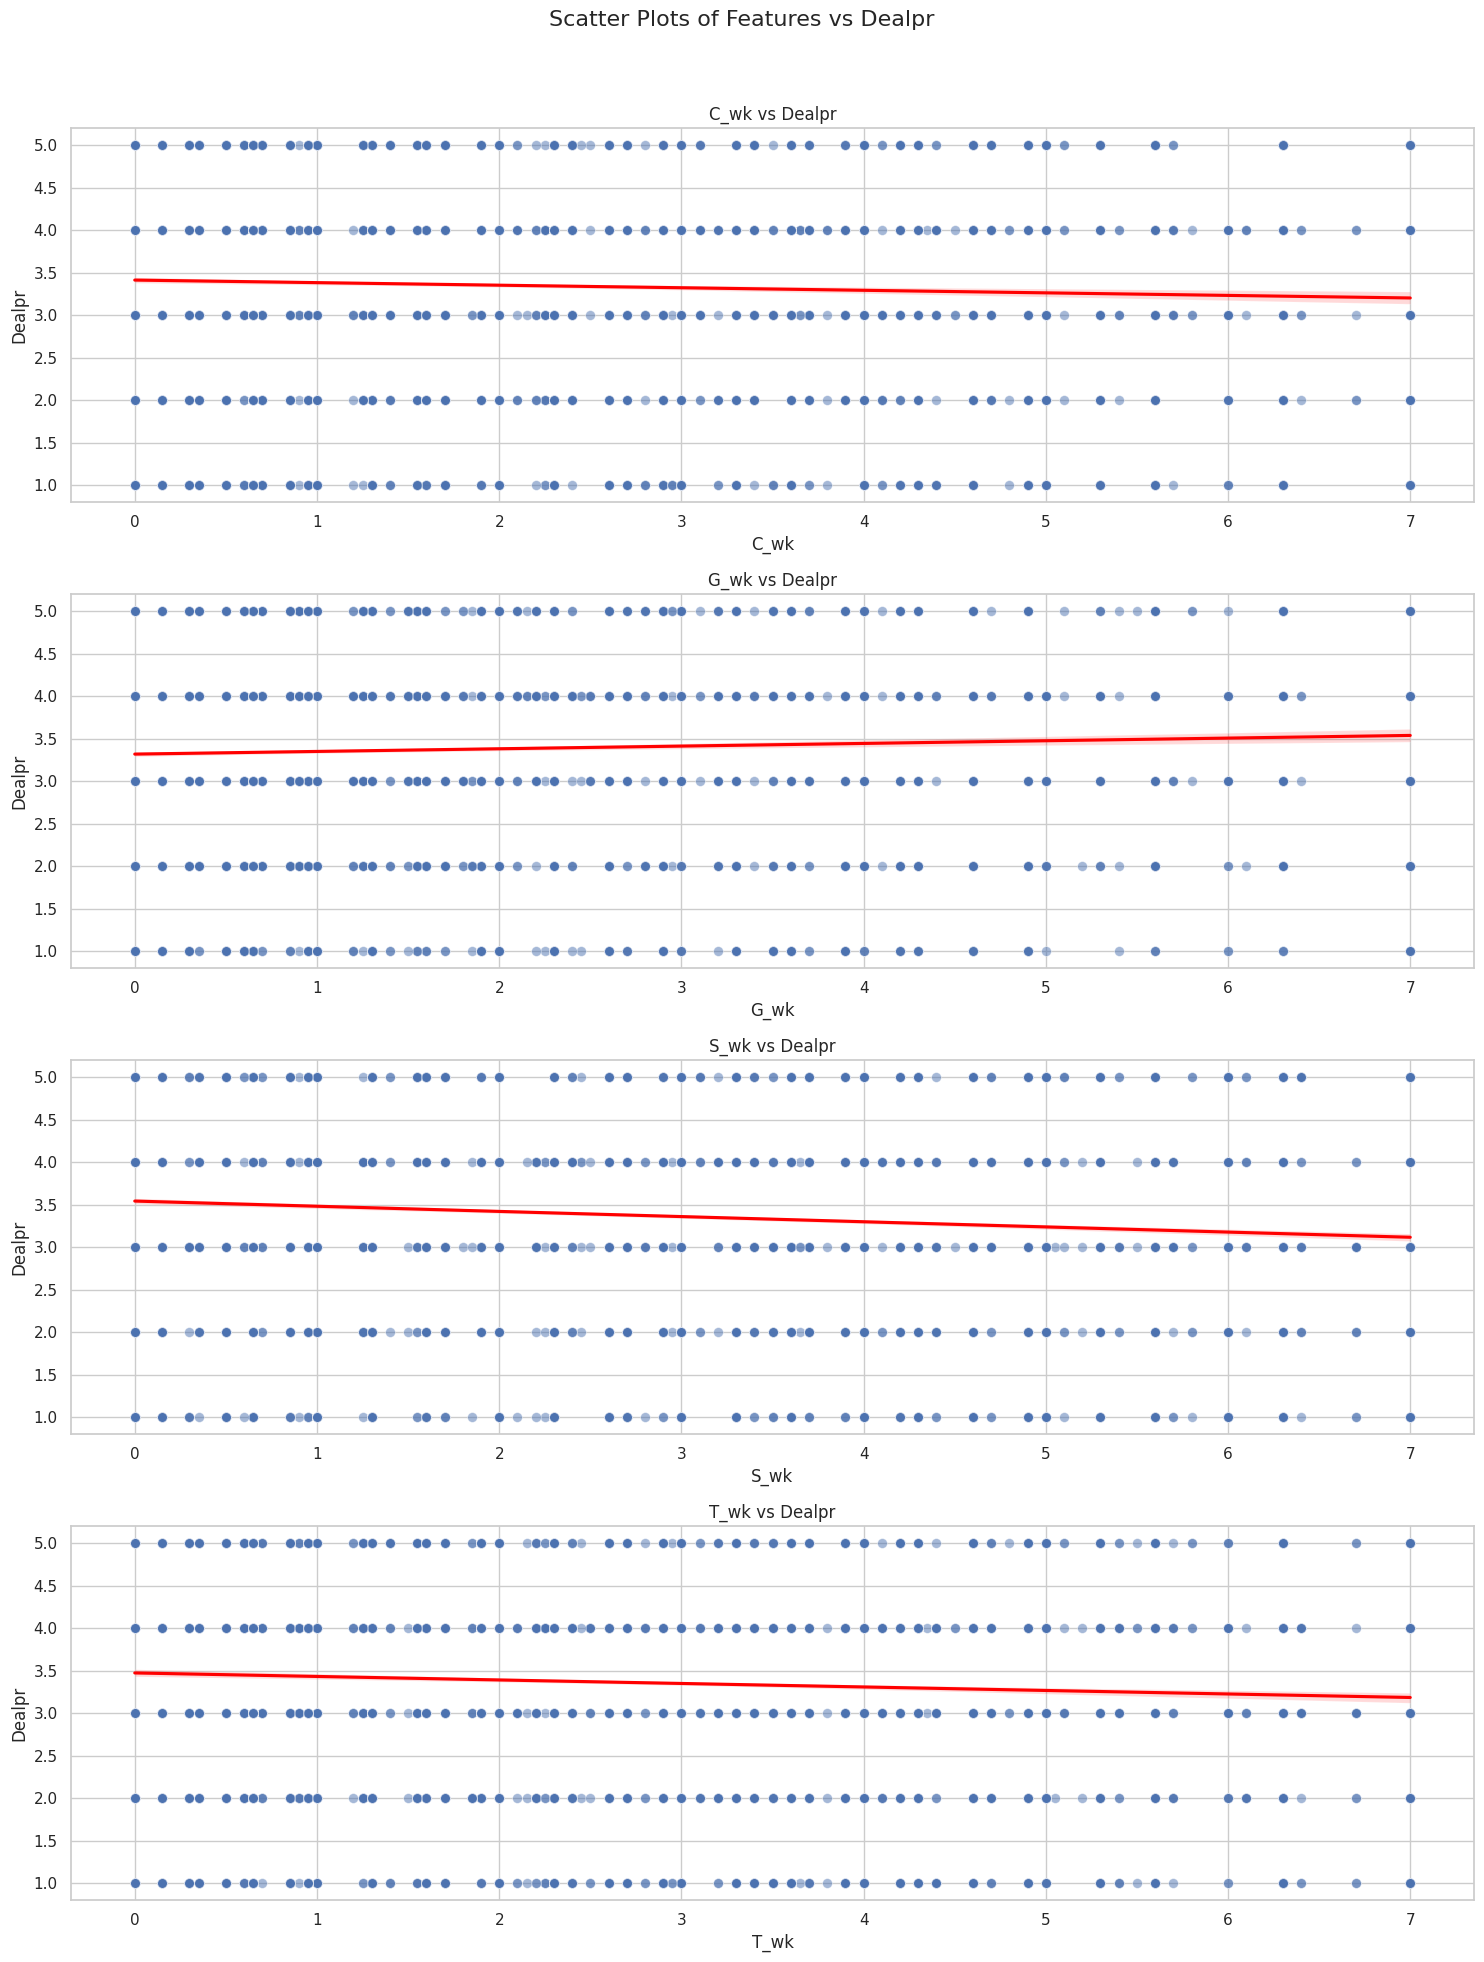

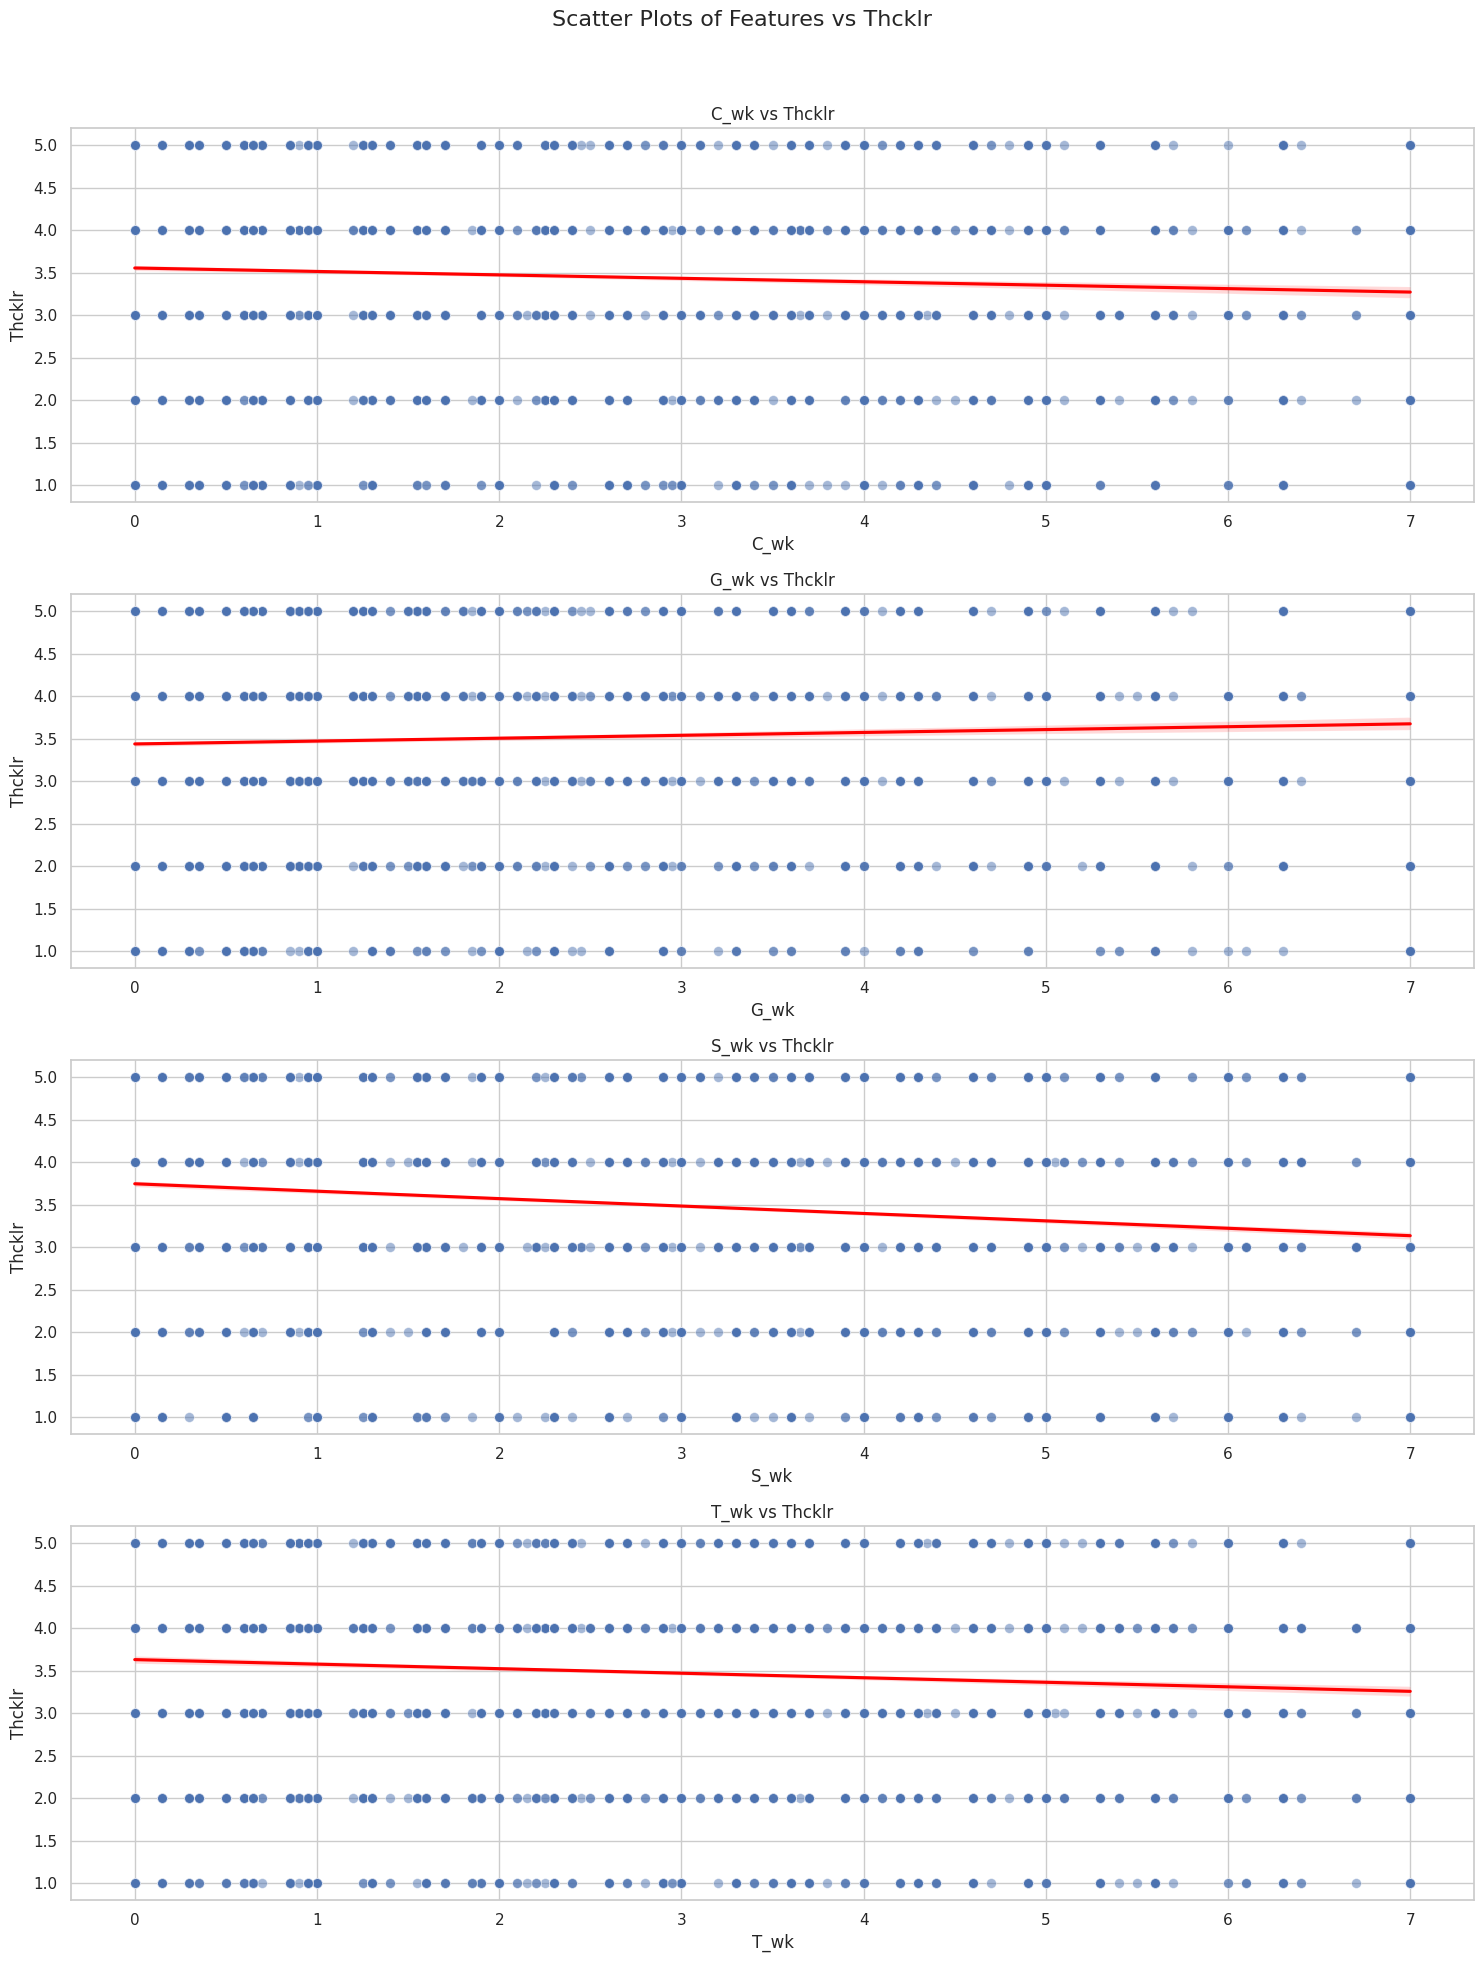

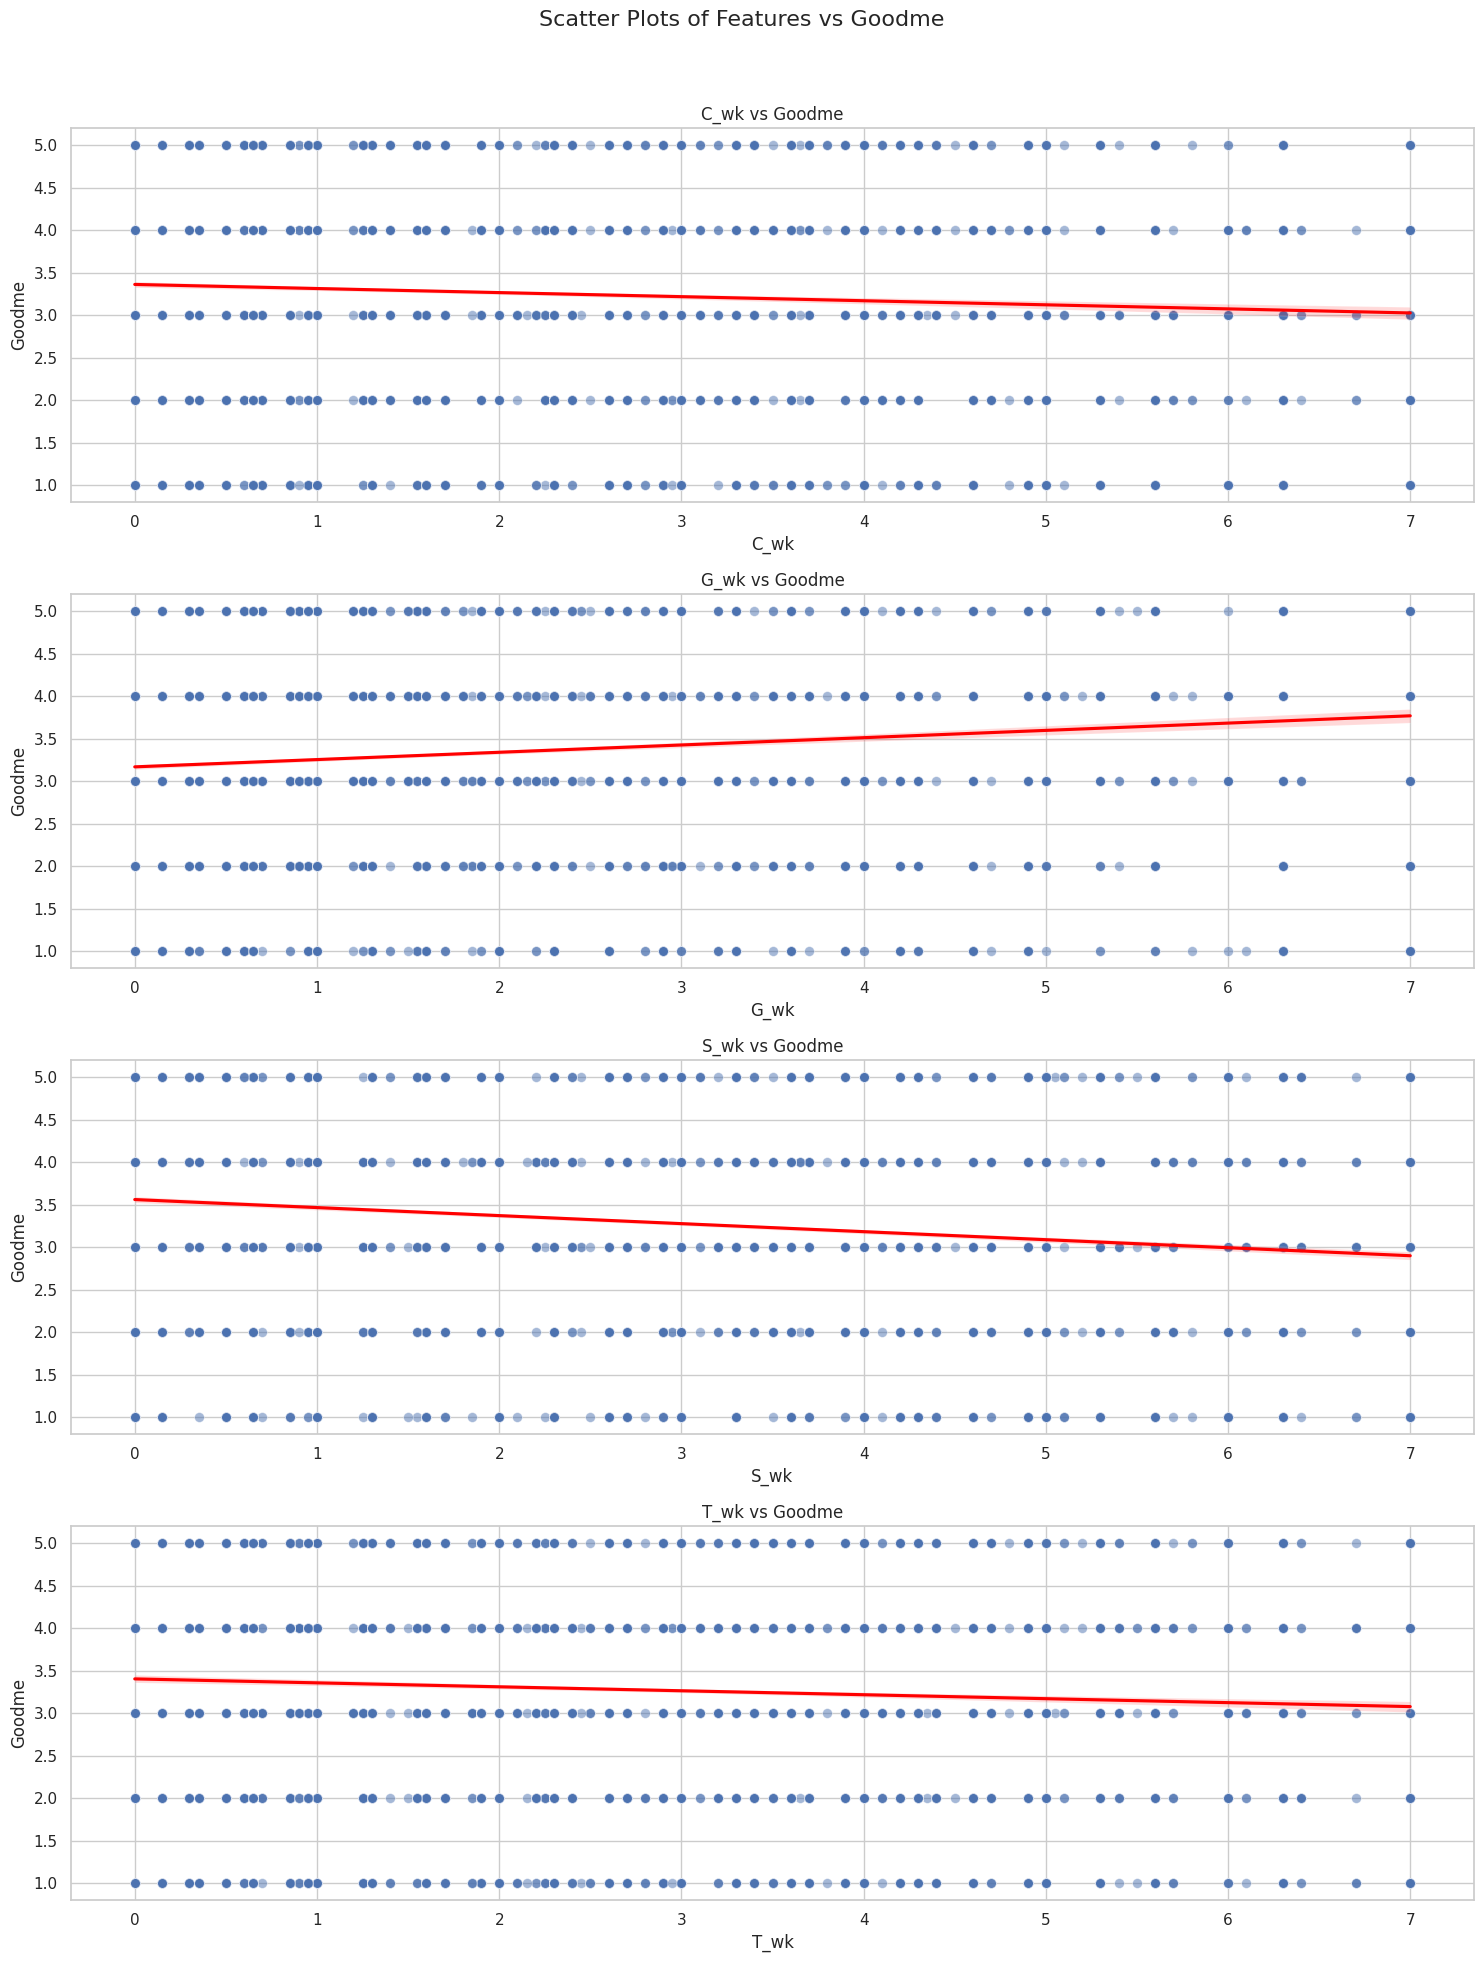

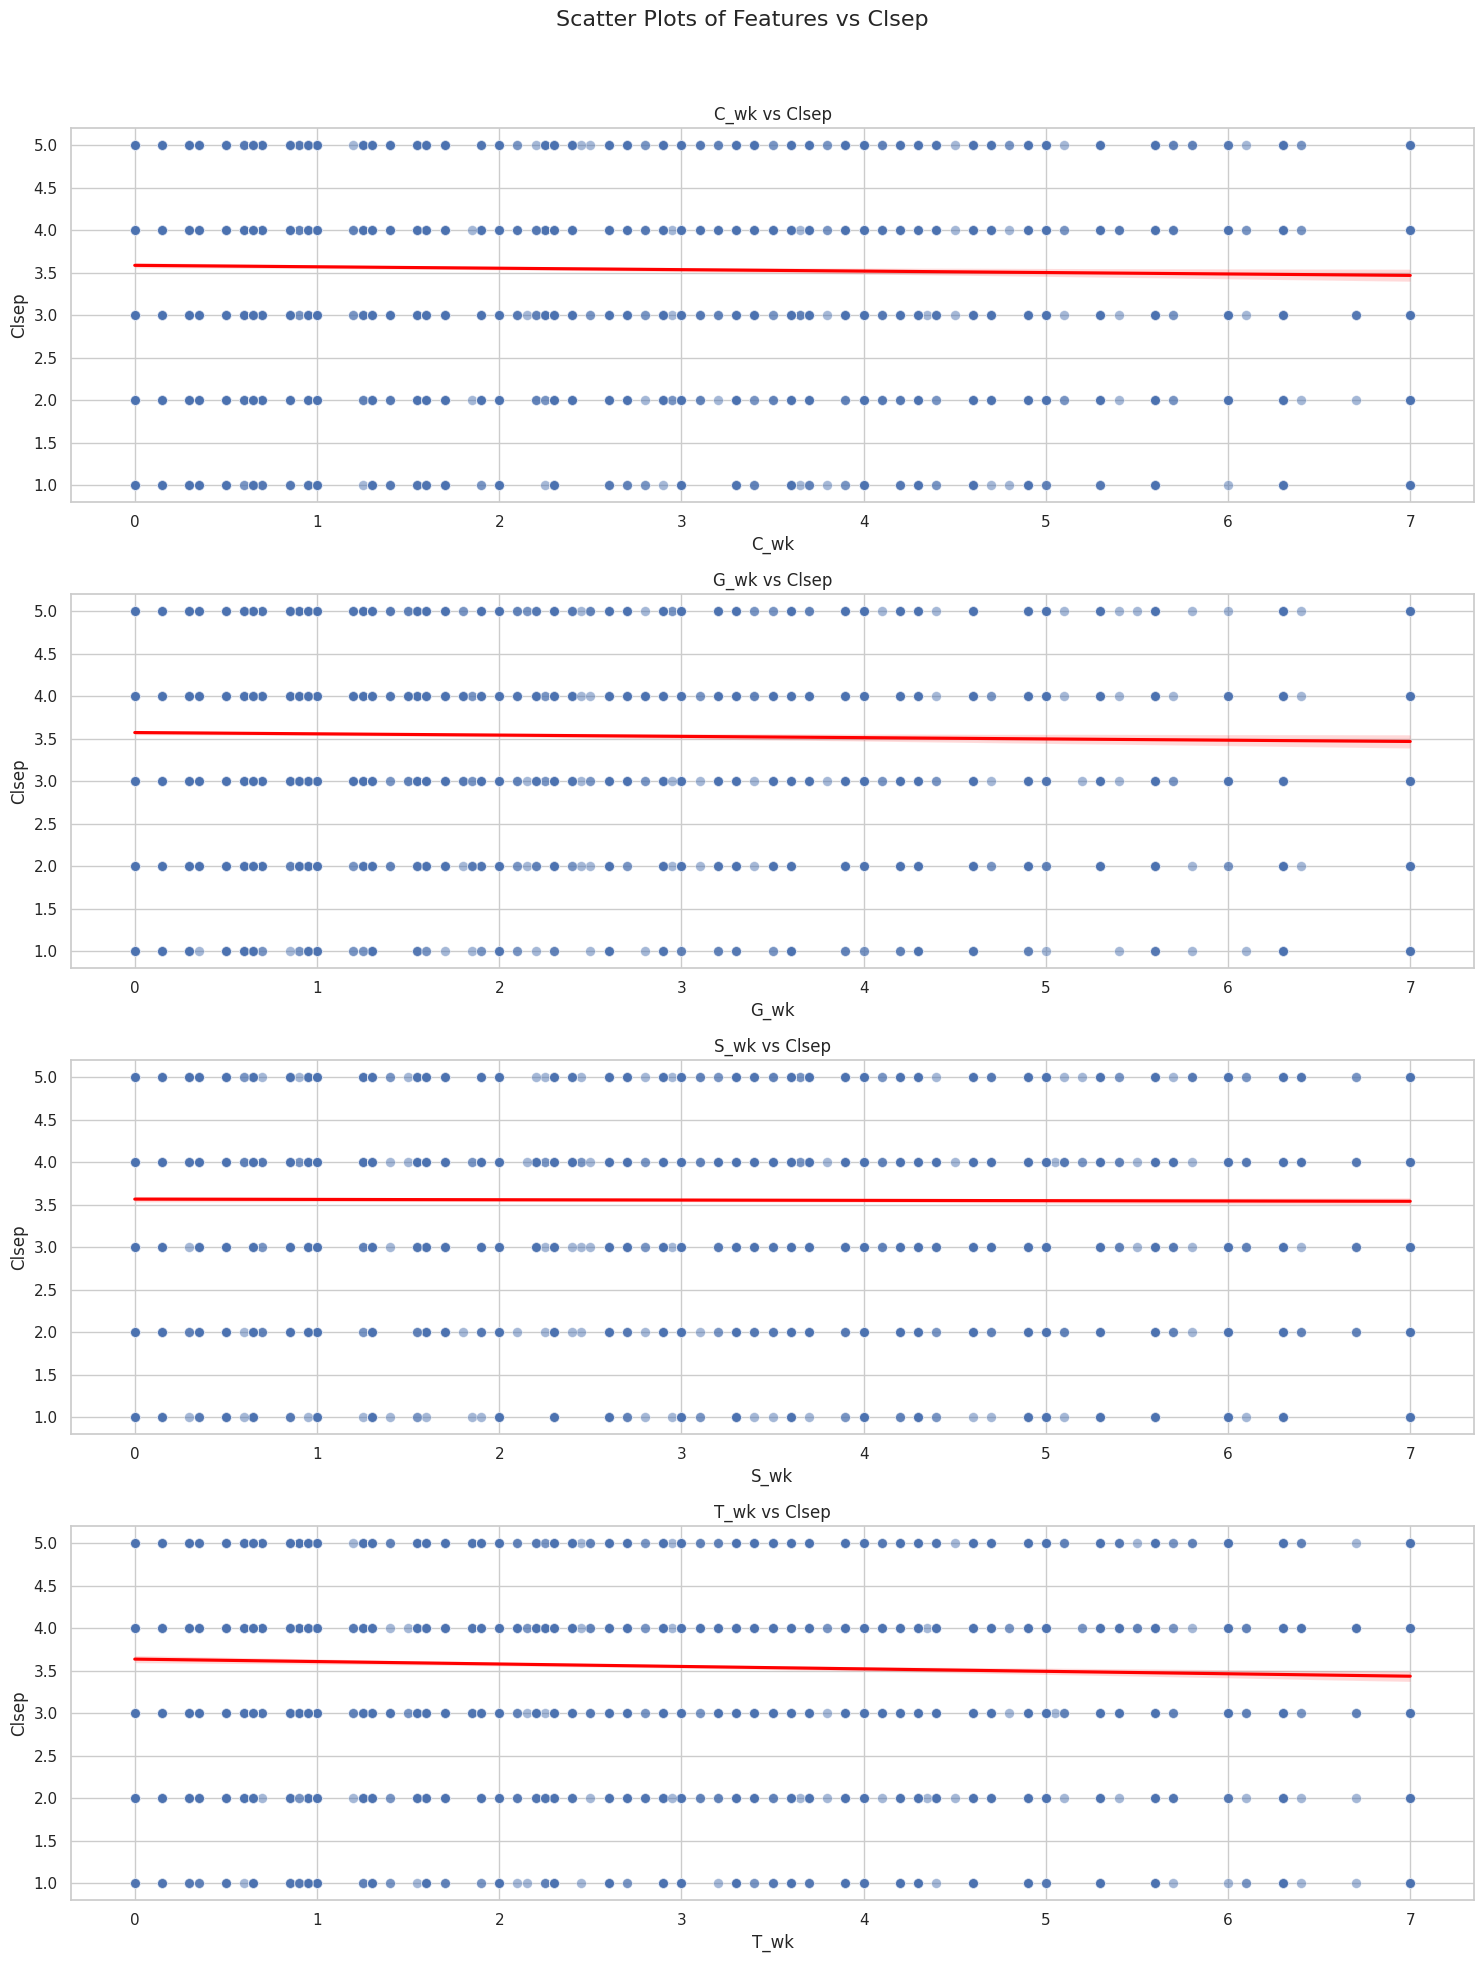

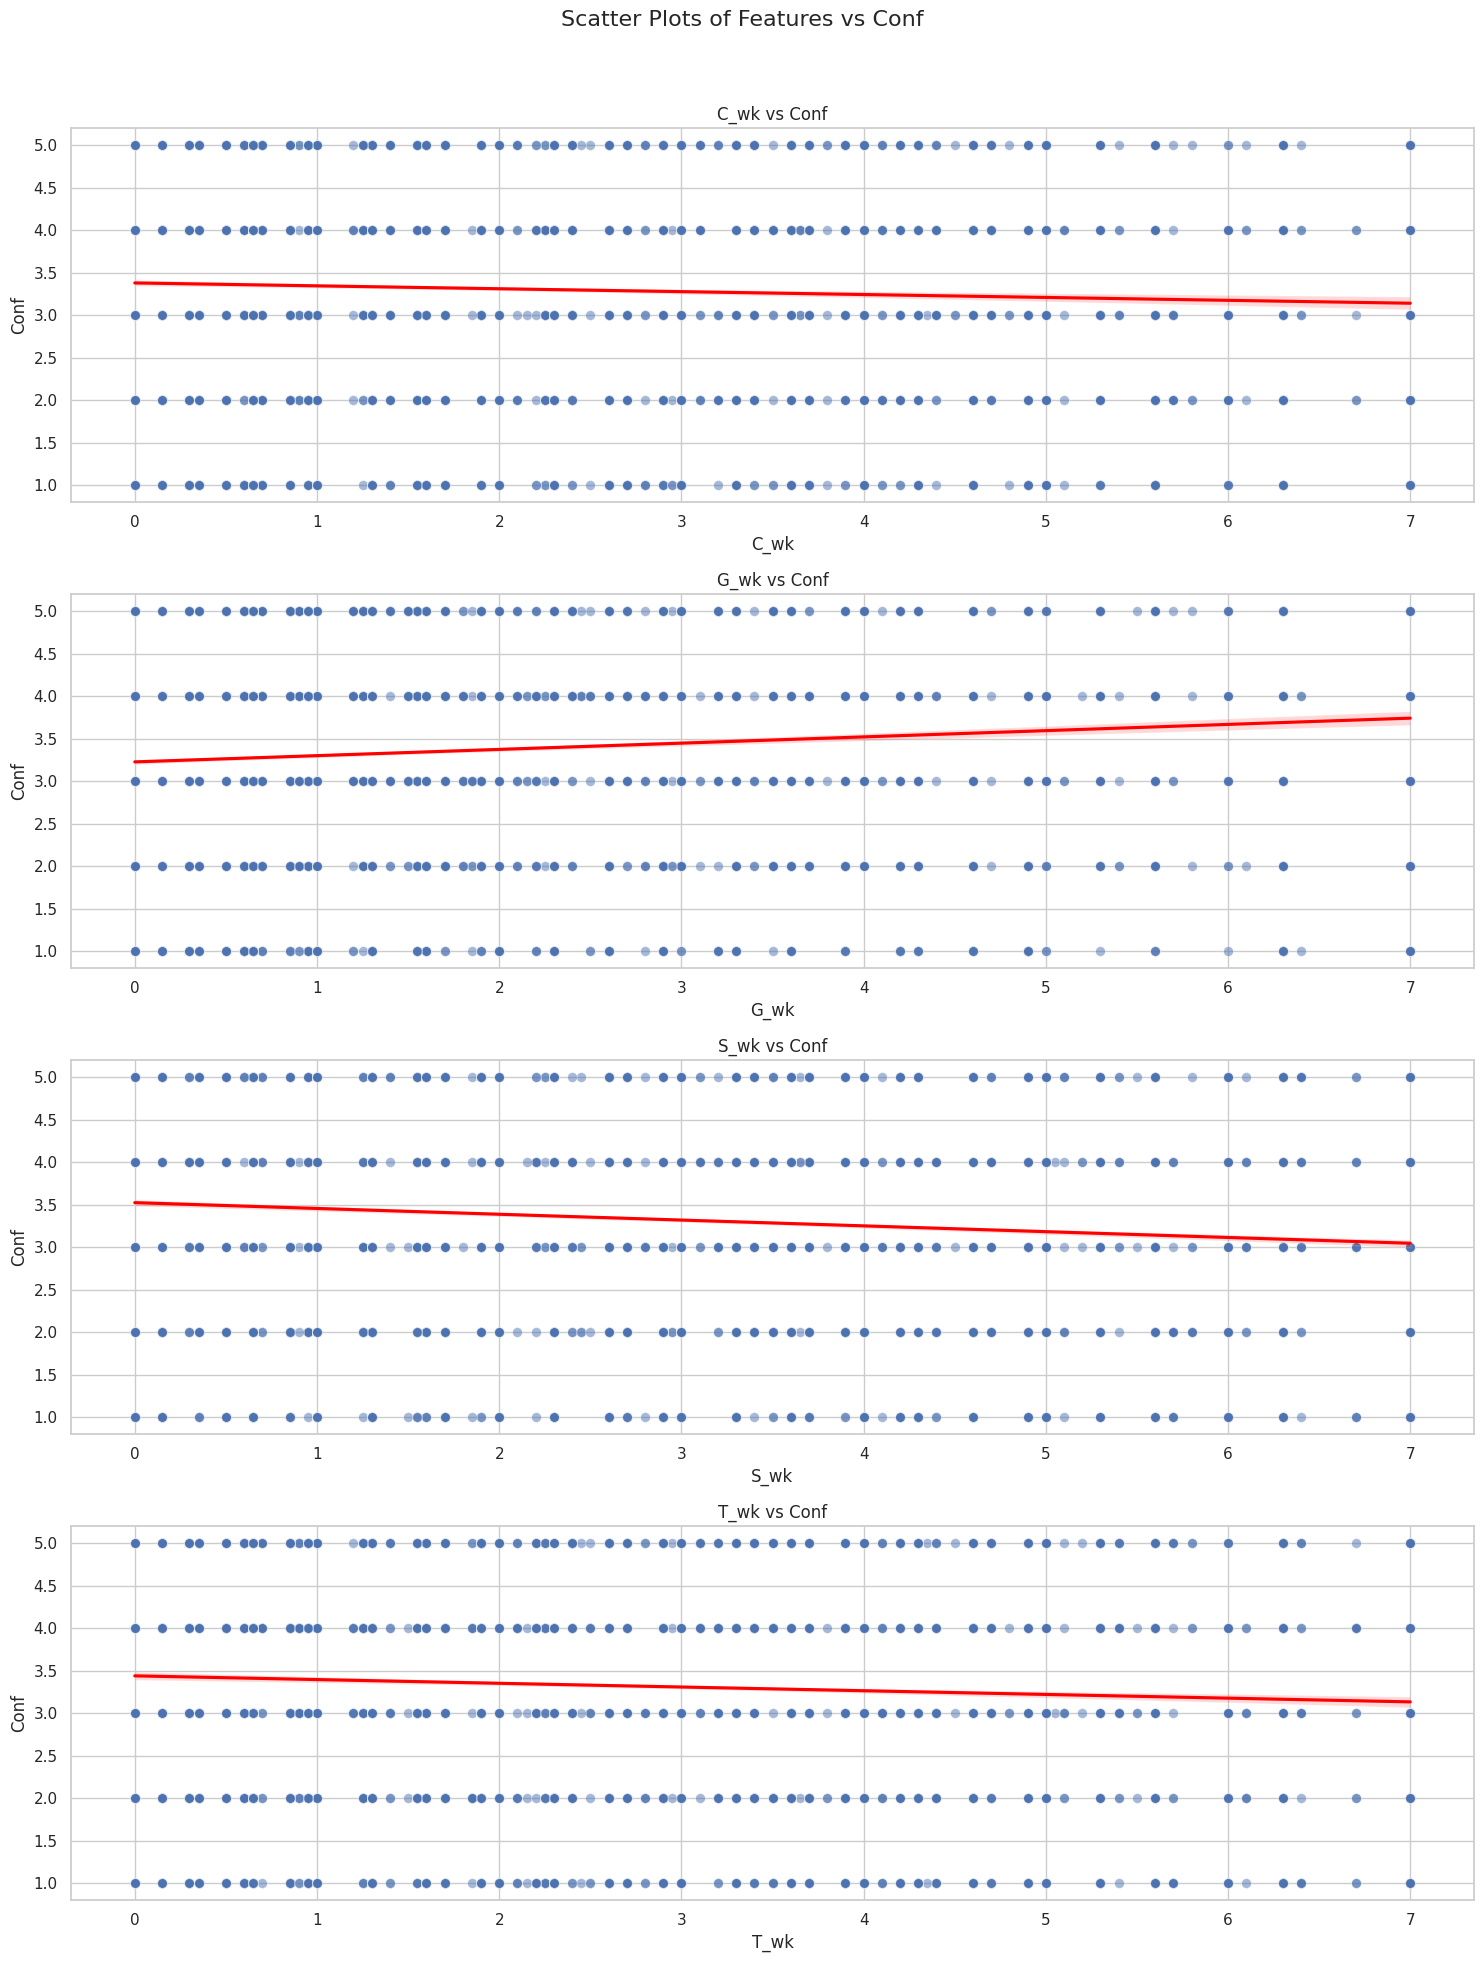

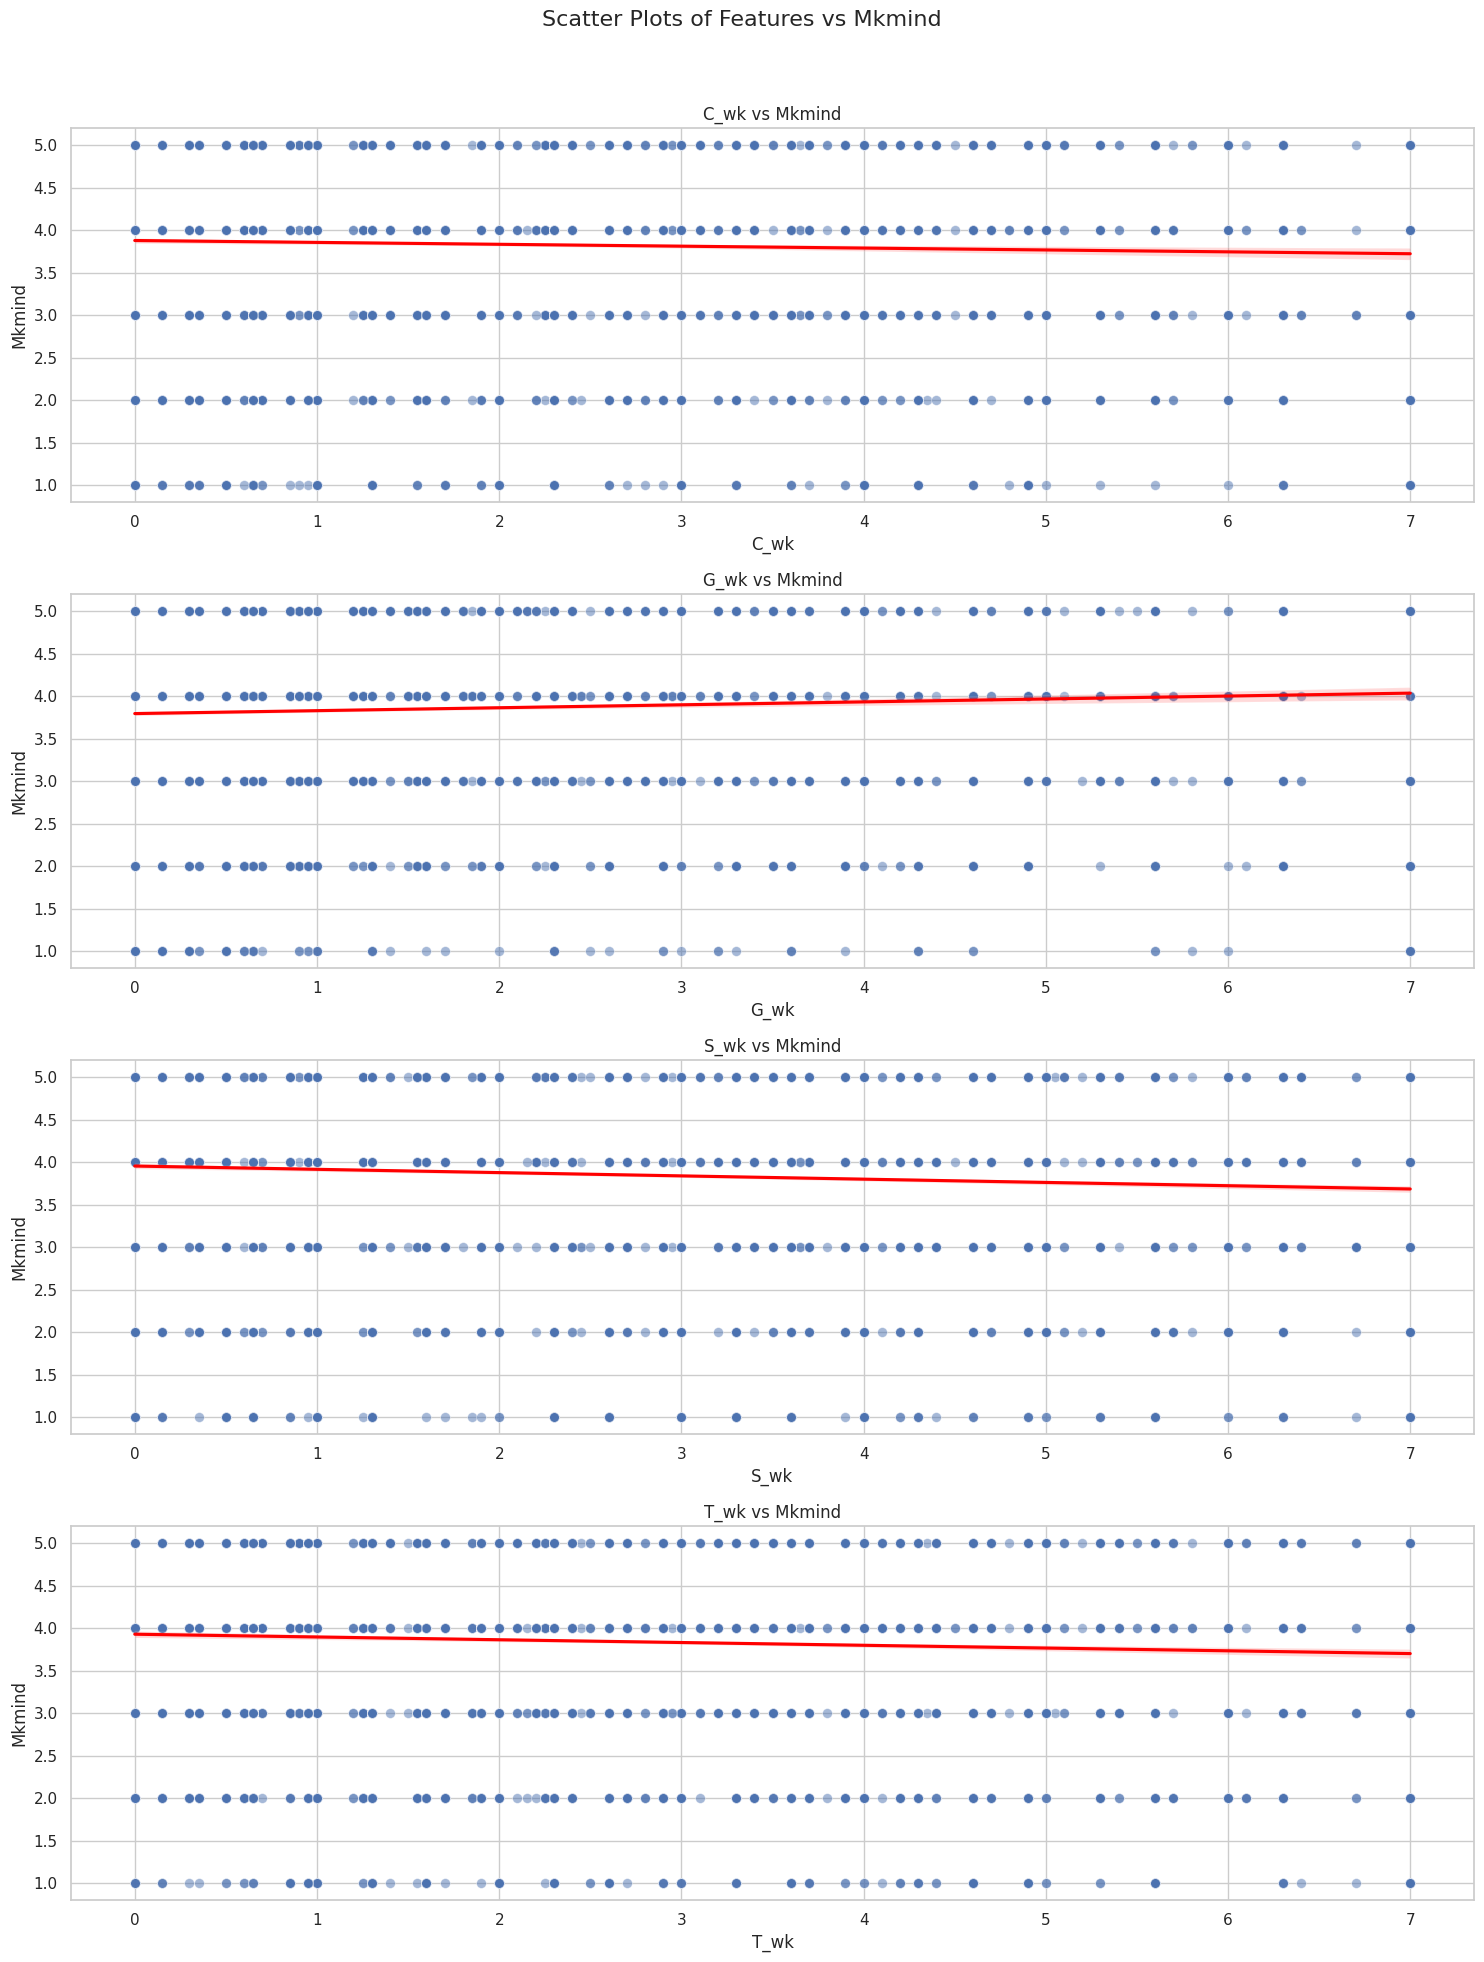

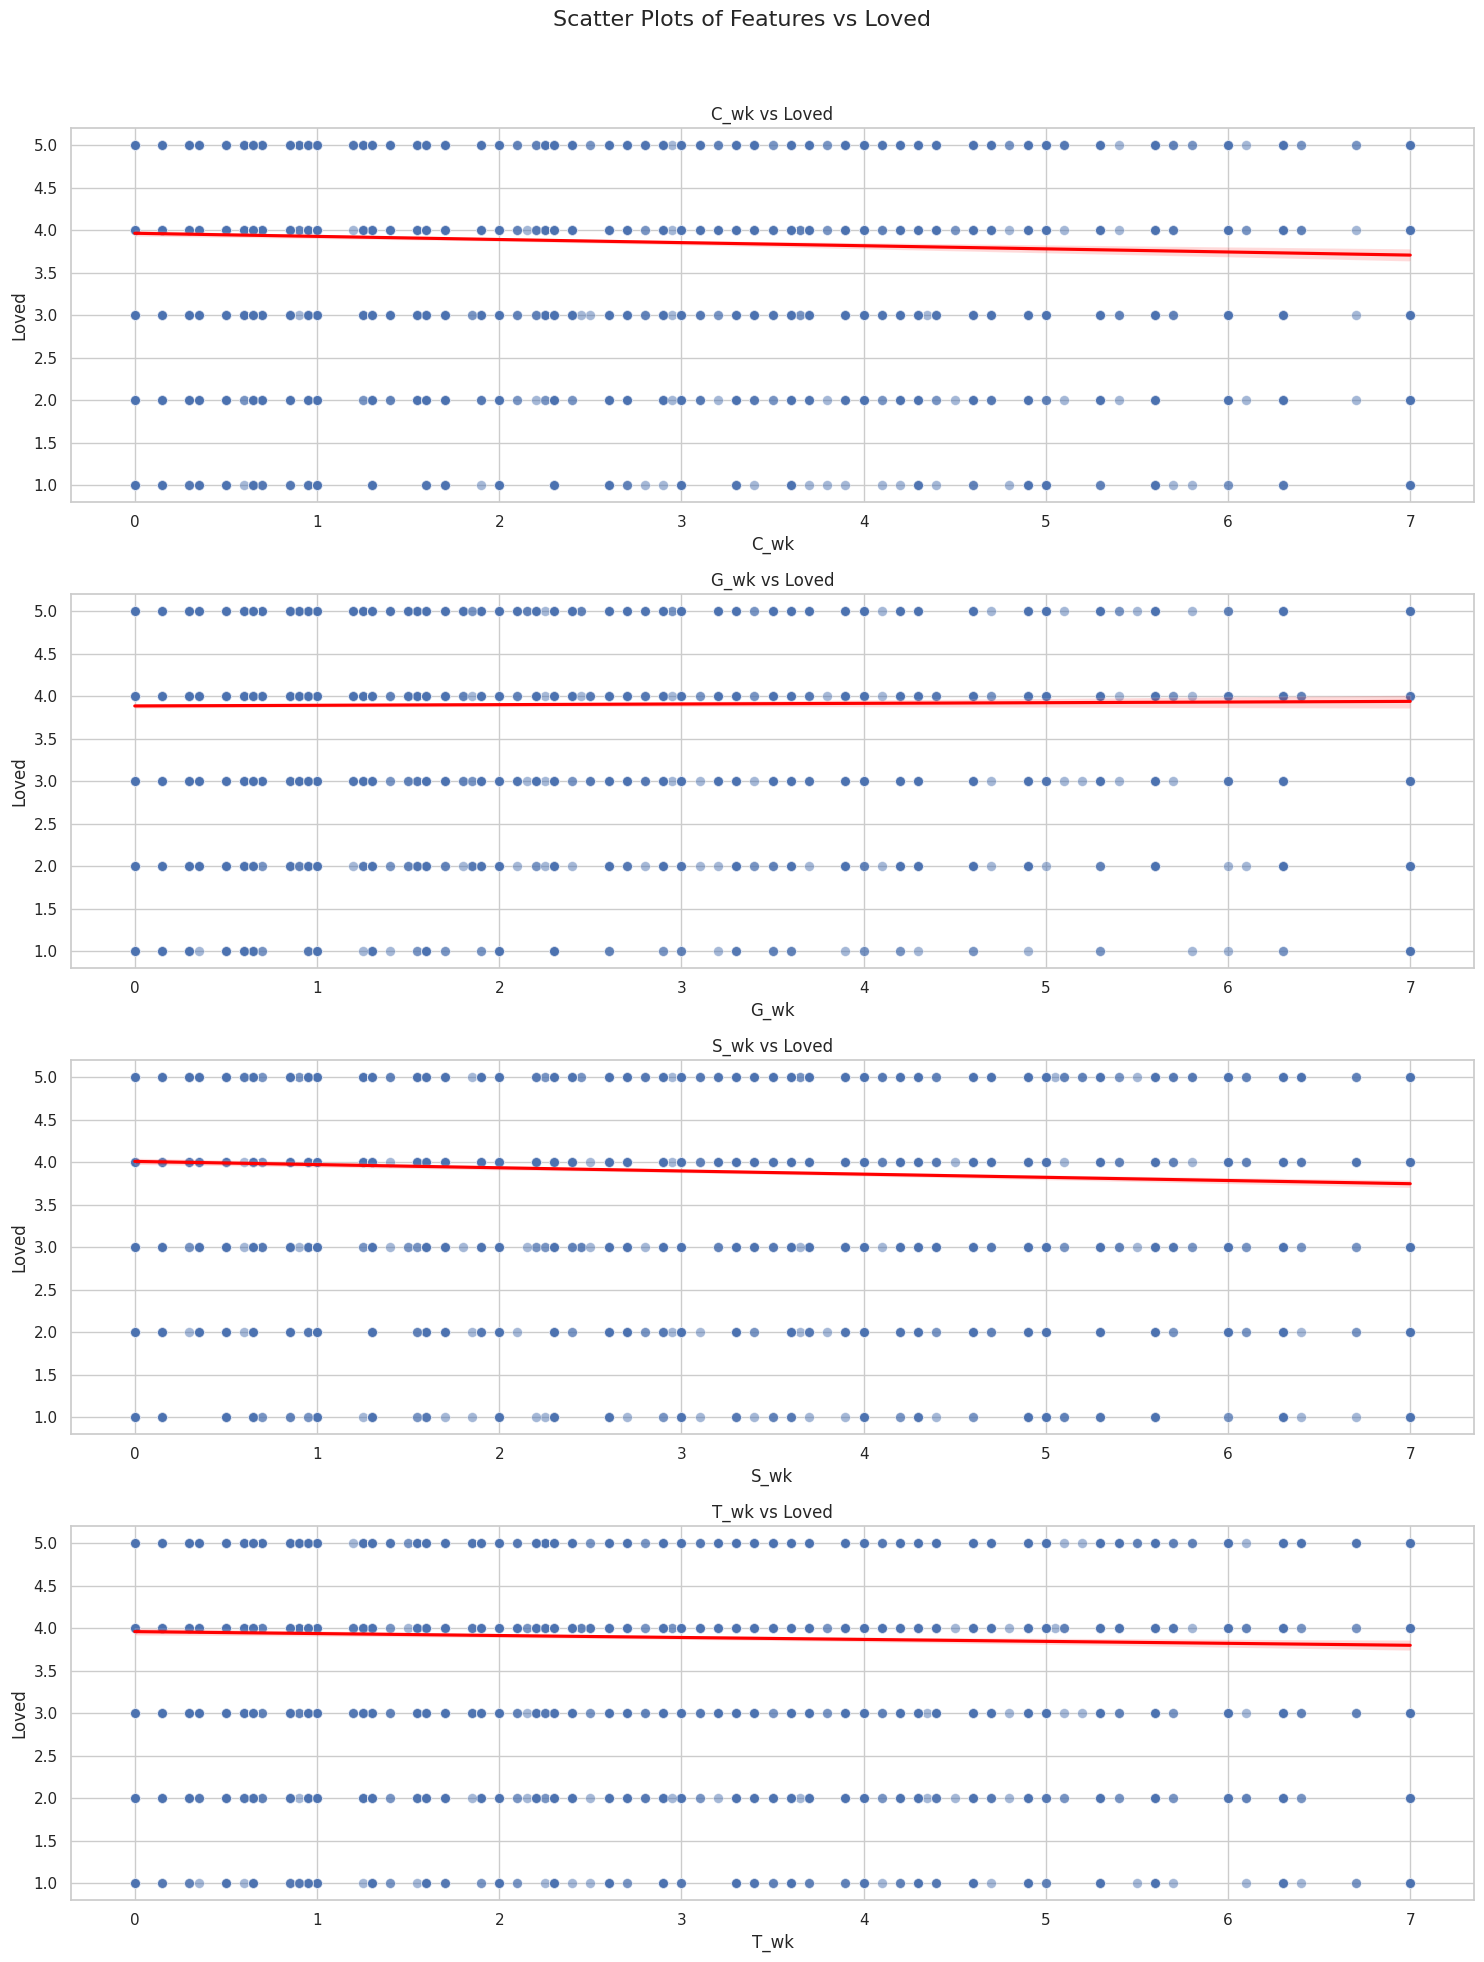

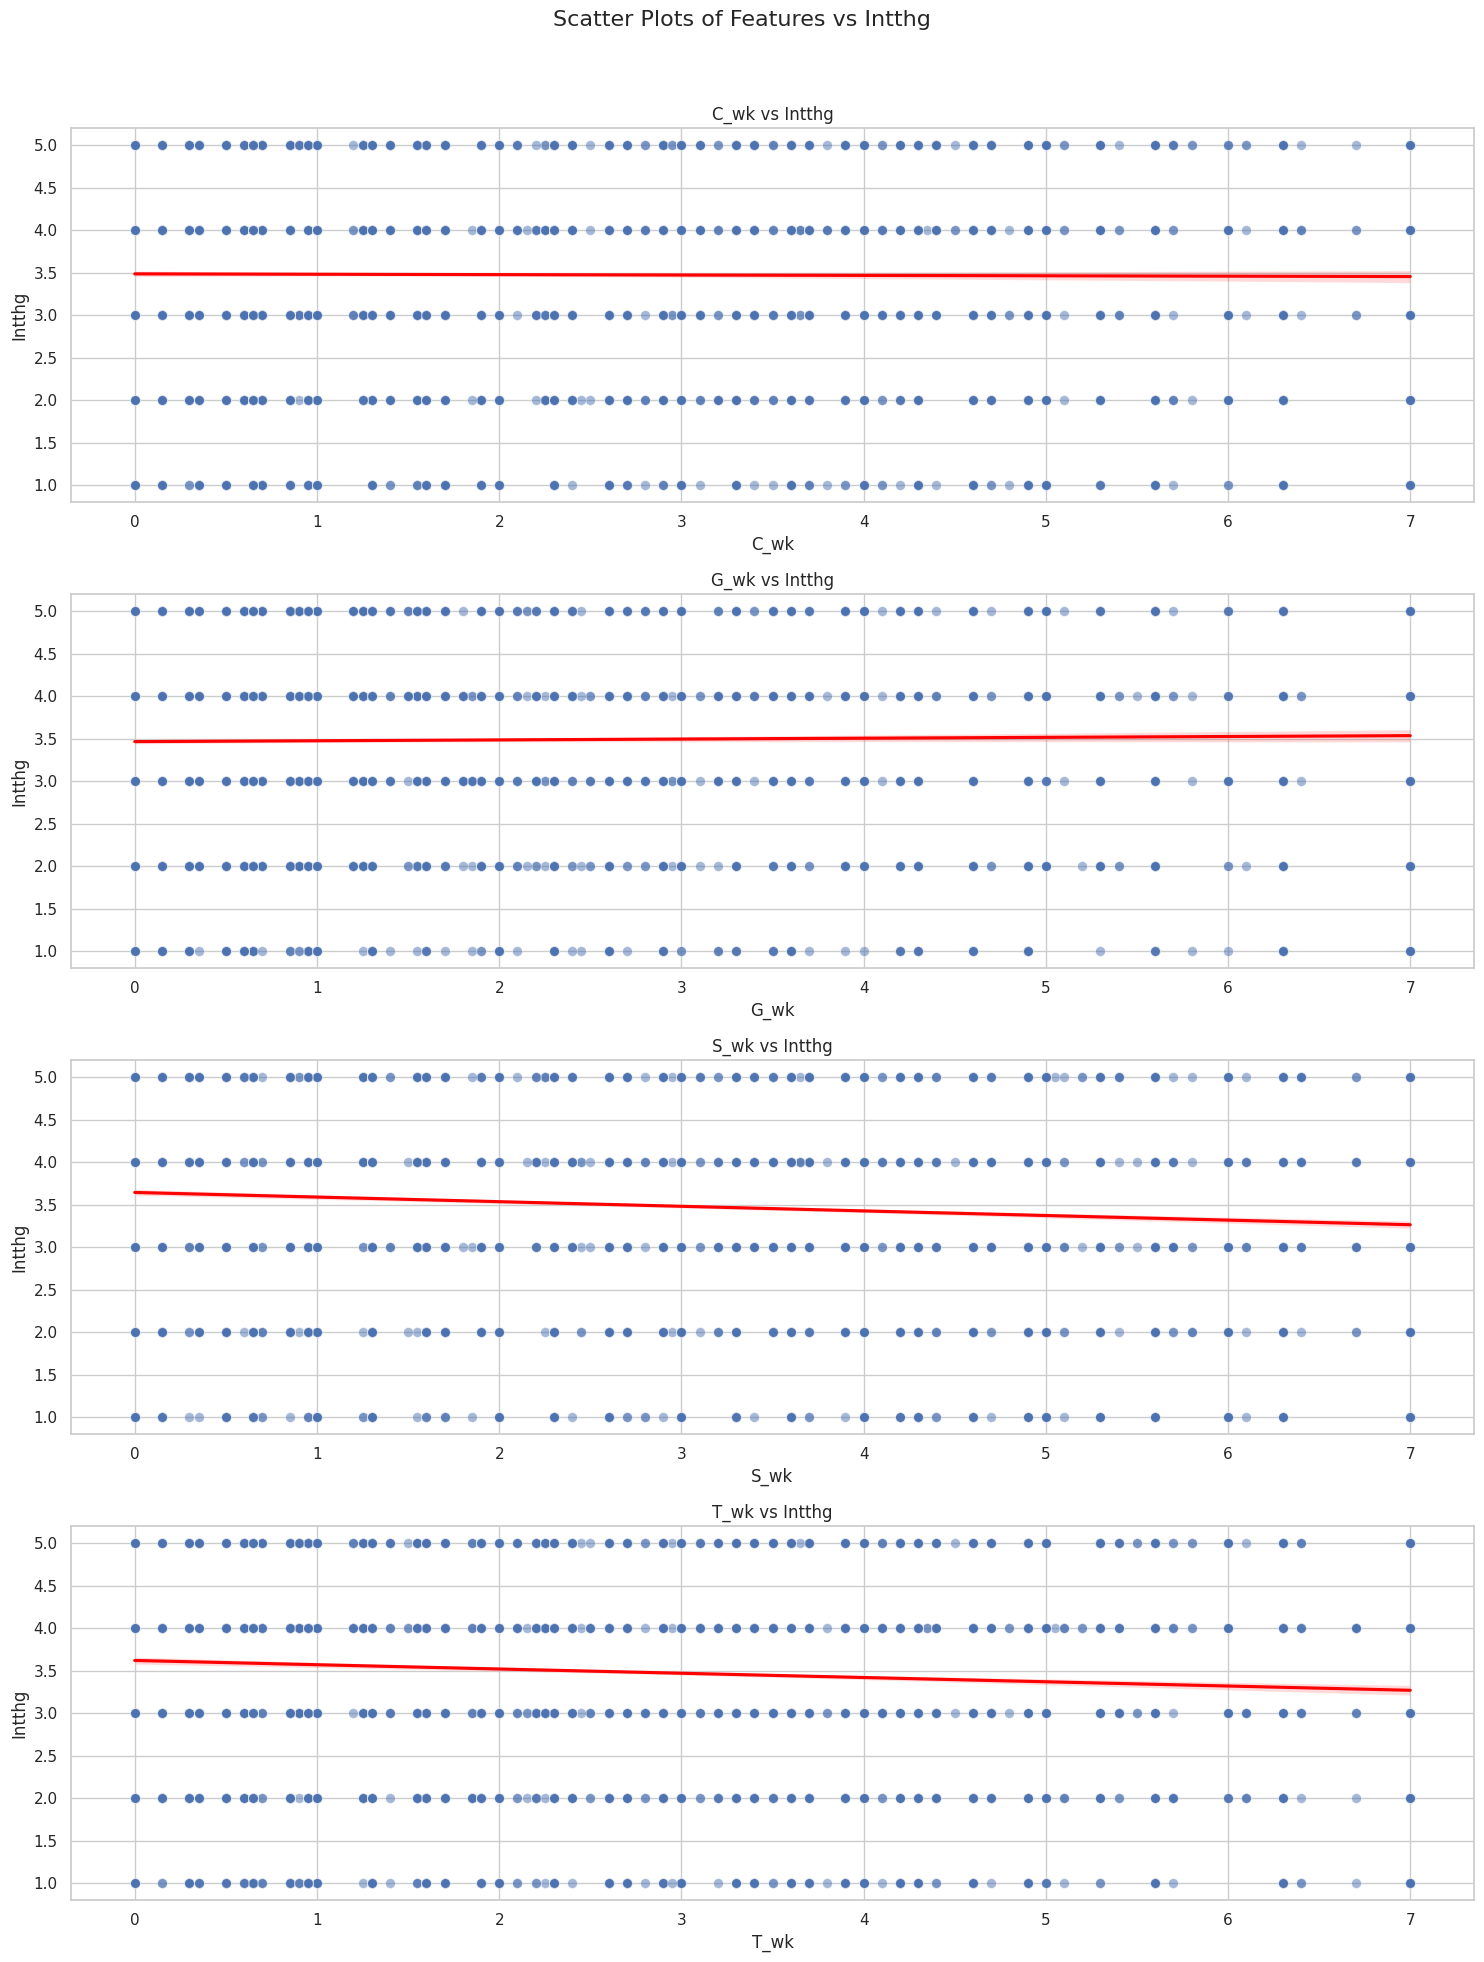

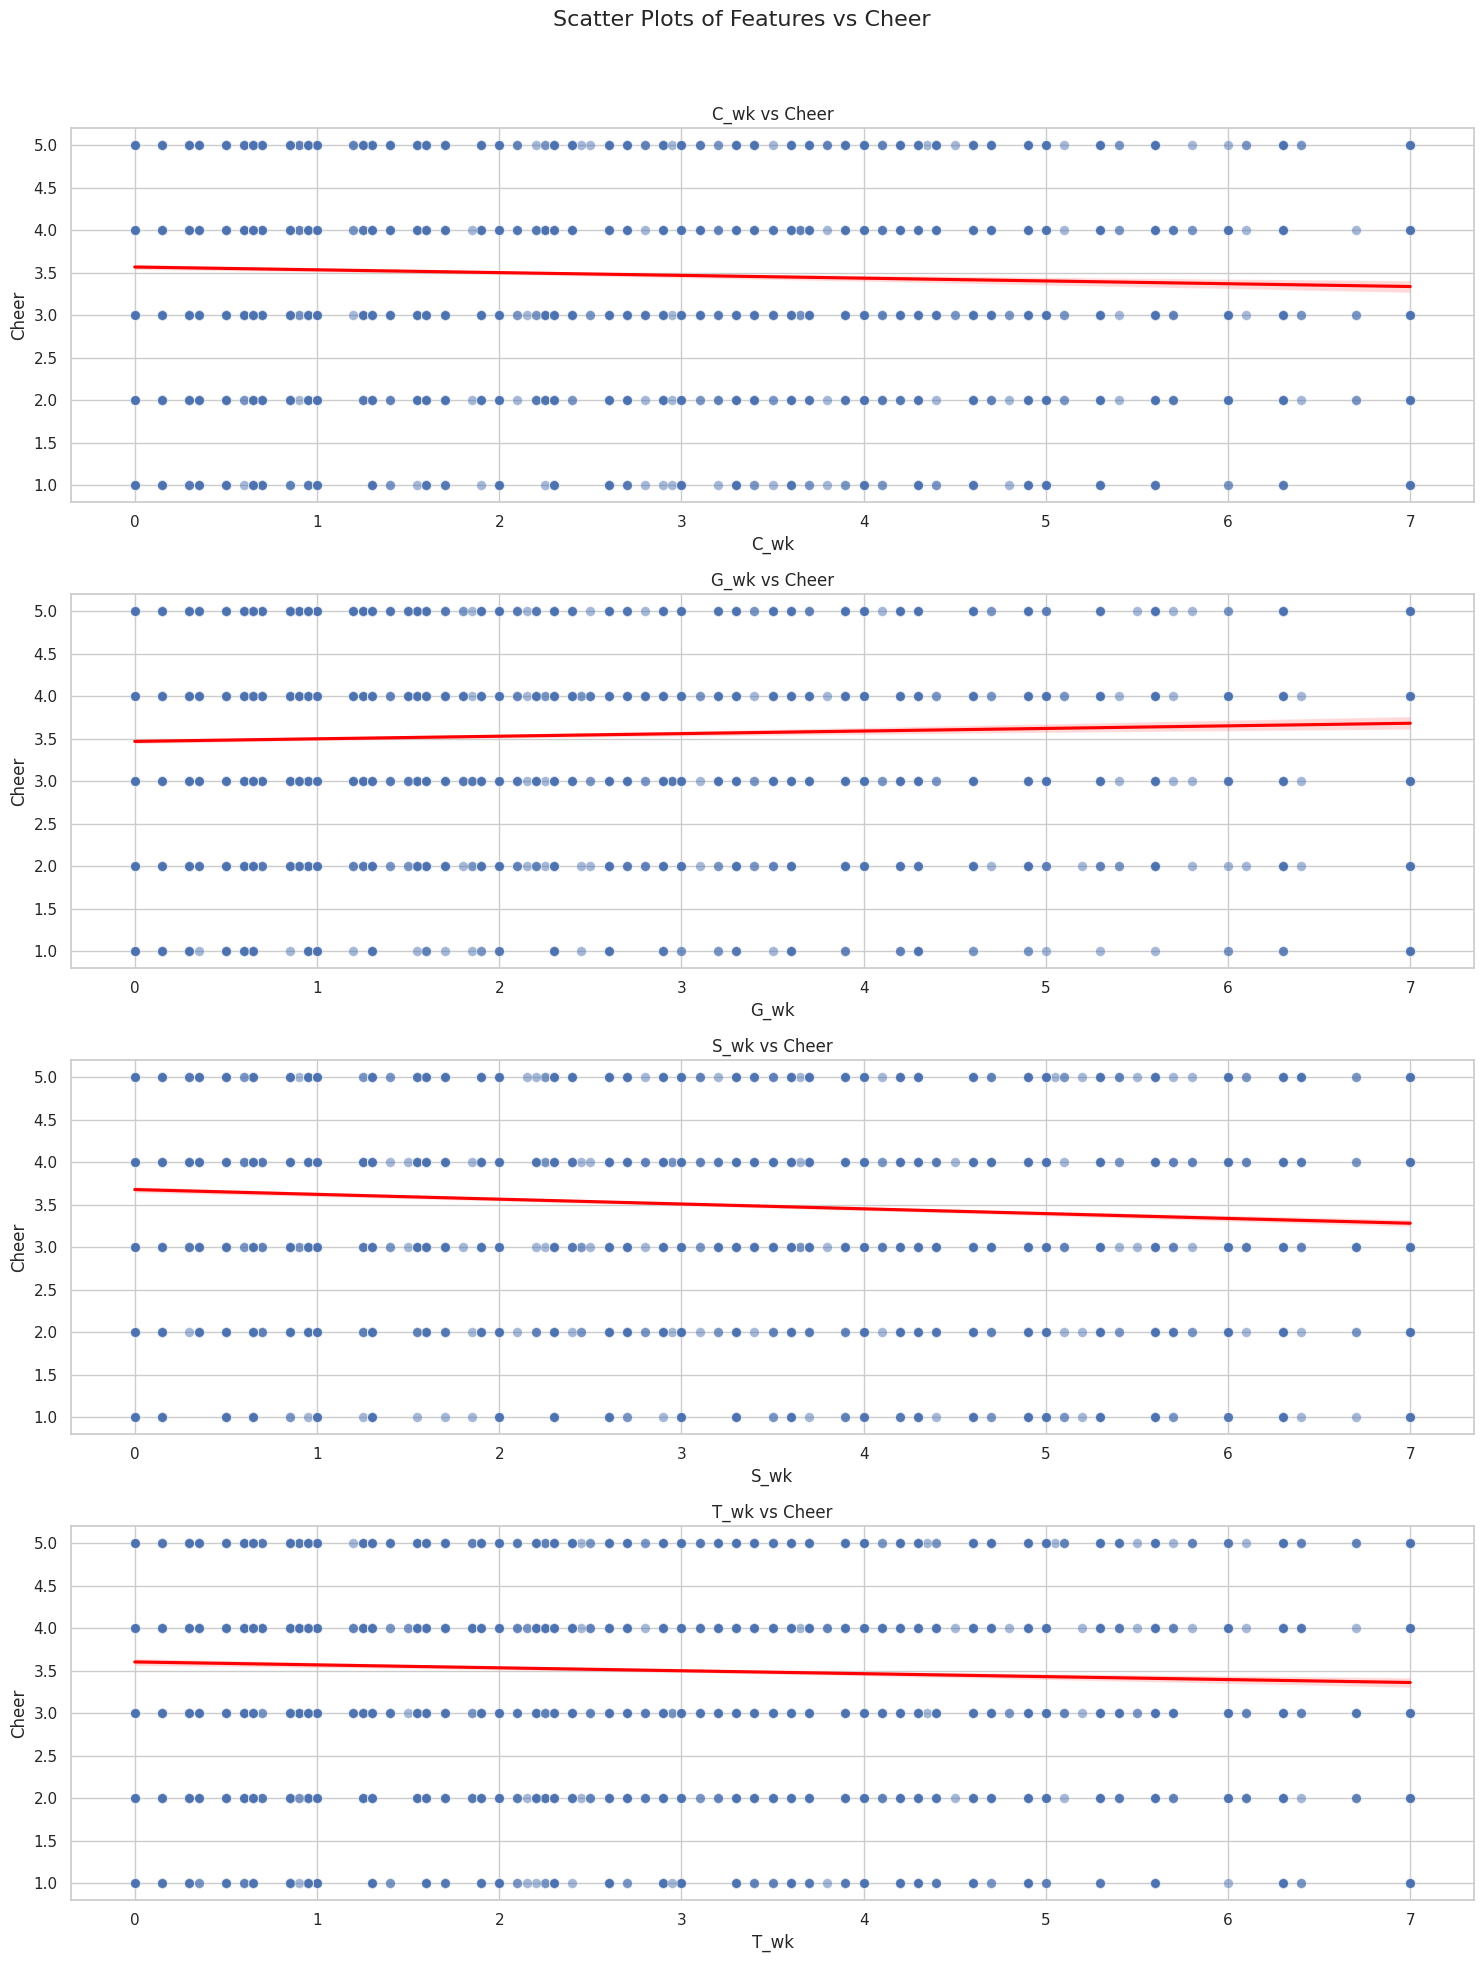

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style of seaborn
sns.set(style='whitegrid')

# Loop through each target variable for separate scatter plots
for target_variable in target_variables:
    # Sample the data if necessary (e.g., using 10% of the data)
    sampled_data = df.sample(frac=0.1, random_state=1)  # Adjust the fraction as needed

    # Create a grid of subplots for continuous features against the chosen target variable
    num_features = len(continuous_features)
    fig, axes = plt.subplots(num_features, 1, figsize=(15, 5 * num_features))
    fig.suptitle(f'Scatter Plots of Features vs {target_variable}', fontsize=16)

    # Loop through continuous features to create scatter plots against the target variable
    for i in range(num_features):
        ax = axes[i]
        # Use scatterplot for better aesthetics
        sns.scatterplot(data=sampled_data, x=continuous_features[i], y=target_variable, ax=ax, alpha=0.5, s=50)
        # Add a regression line
        sns.regplot(data=sampled_data, x=continuous_features[i], y=target_variable, ax=ax, scatter=False, color='red')
        
        # Set titles and labels
        ax.set_title(f'{continuous_features[i]} vs {target_variable}')
        ax.set_xlabel(continuous_features[i])
        ax.set_ylabel(target_variable)

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the layout to make room for the title
    plt.show()


<h3><b>Perform t-Tests</b></h3>

In [29]:
import numpy as np
import pandas as pd
from scipy import stats
from collections import defaultdict

def analyze_group_similarity(merged_df, target_variables, continuous_features, alpha=0.05):
    """
    Analyzes the similarity of groups in relation to continuous features using t-tests.

    Parameters:
        merged_df (DataFrame): The input DataFrame containing the data.
        target_variables (list): List of target variable names.
        continuous_features (list): List of continuous feature names.
        alpha (float): Significance level for the t-test (default is 0.05).

    Returns:
        dict: A dictionary where keys are target variables and values are the features with no significant differences.
    """
    # Dictionary to track groups that are similar
    similarity_dict = defaultdict(lambda: defaultdict(lambda: defaultdict(set)))

    # Iterate over all target variables
    for target in target_variables:
        # Get unique categories for the target variable
        unique_categories = merged_df[target].unique()
        
        # Iterate over all pairs of categories (for t-tests)
        for i in range(len(unique_categories)):
            for j in range(i + 1, len(unique_categories)):
                group1 = merged_df[merged_df[target] == unique_categories[i]][continuous_features]
                group2 = merged_df[merged_df[target] == unique_categories[j]][continuous_features]
                
                # Check if both groups have enough data to perform the t-test
                if len(group1) > 1 and len(group2) > 1:
                    for feature in continuous_features:
                        # Perform t-test
                        t_stat, p_value = stats.ttest_ind(group1[feature], group2[feature], equal_var=False)  # Welch's t-test
                        
                        # Collect groups with no significant difference
                        if p_value >= alpha:
                            similarity_dict[target][unique_categories[i]][feature].add(unique_categories[j])
                            similarity_dict[target][unique_categories[j]][feature].add(unique_categories[i])

    # Prepare the final results with grouped similar groups
    final_results = defaultdict(lambda: defaultdict(list))
    for target, groups in similarity_dict.items():
        for group, features in groups.items():
            for feature, similar_groups in features.items():
                if similar_groups:  # Check if there are similar groups
                    similar_groups_list = list(similar_groups)
                    final_results[target][tuple(sorted(similar_groups_list))].append(group)

    return final_results

# Example call to the function
# Assuming merged_df, target_variables, and continuous_features are already defined
final_results = analyze_group_similarity(df, target_variables, continuous_features)

# Displaying the results in a formatted way
for target, similarities in final_results.items():
    print(f"Target Variable: {target}")
    for similar_groups, groups in similarities.items():
        groups_str = ', '.join(map(str, sorted(groups)))  # Ensure groups are converted to strings
        similar_groups_str = ', '.join(map(str, similar_groups))  # Ensure similar groups are converted to strings
        print(f"Groups {groups_str} are similar to {similar_groups_str}.")
    print("\n")  # For better readability


Target Variable: Optm
Groups 1, 3, 5 are similar to 2.
Groups 2 are similar to 3.
Groups 2, 4, 4 are similar to 5.
Groups 2 are similar to 1.
Groups 5, 5 are similar to 4.


Target Variable: Usef
Groups 4 are similar to 1, 3.
Groups 3, 4, 4 are similar to 5.
Groups 3 are similar to 1, 4.
Groups 5 are similar to 3, 4.
Groups 5 are similar to 4.
Groups 5 are similar to 1.
Groups 1 are similar to 3, 4, 5.


Target Variable: Relx
Groups 3 are similar to 4, 5.
Groups 4 are similar to 3, 5.
Groups 4, 4 are similar to 5.
Groups 5 are similar to 2, 3, 4.
Groups 5, 5 are similar to 4.
Groups 2 are similar to 1, 5.
Groups 2 are similar to 1.
Groups 1, 1 are similar to 2.


Target Variable: Intp
Groups 1, 1, 4 are similar to 5.
Groups 3, 4 are similar to 2.
Groups 2, 5 are similar to 4.
Groups 5 are similar to 1, 2.
Groups 5, 5 are similar to 1.
Groups 2 are similar to 1, 5.
Groups 2 are similar to 3.
Groups 1 are similar to 2, 5.


Target Variable: Engs
Groups 3, 3, 4, 4 are similar to 5.
Groups

<h3><b>Distribution of Categorical Variables</b></h3>

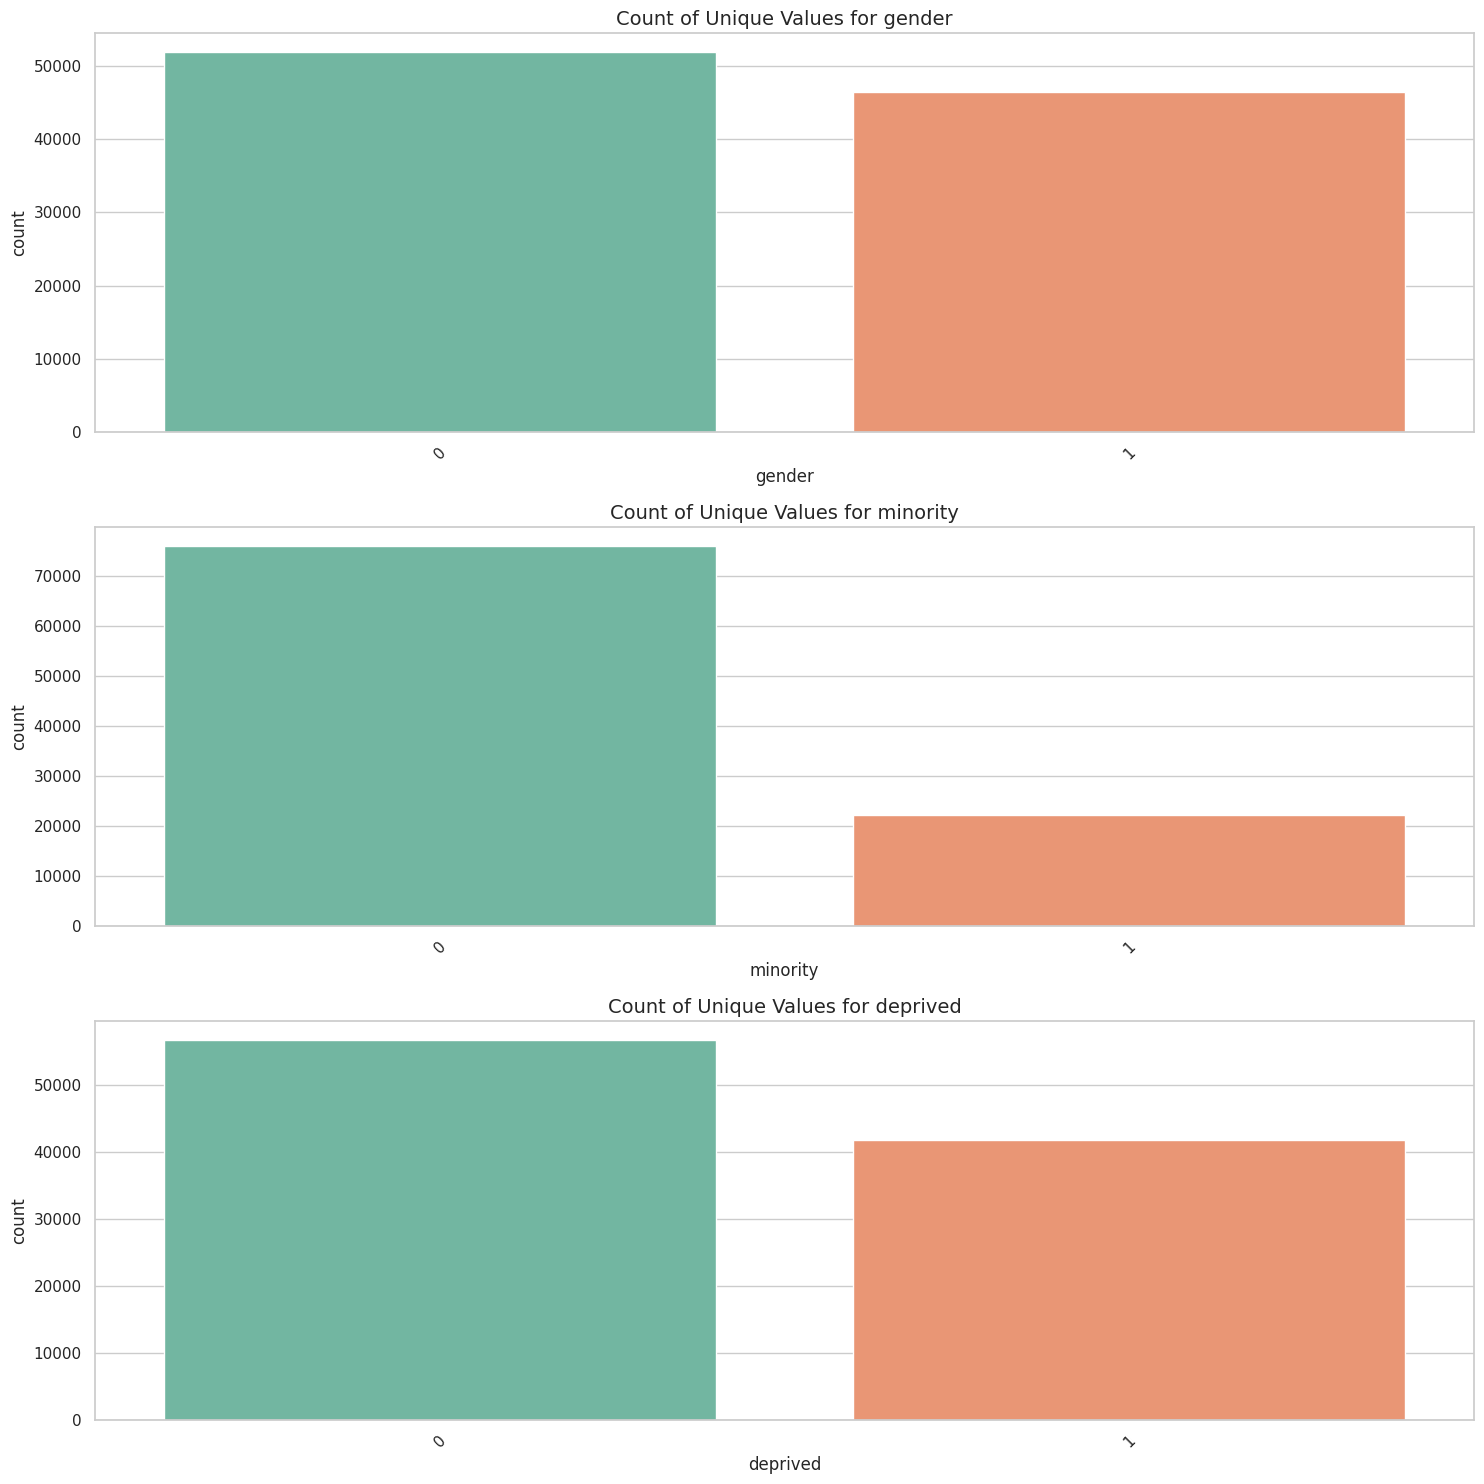

In [34]:
import warnings
warnings.filterwarnings('ignore')
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Count Plots for Categorical Features
plt.figure(figsize=(15, 5 * len(categorical_features)))

for i, feature in enumerate(categorical_features):
    plt.subplot(len(categorical_features), 1, i + 1)
    sns.countplot(data=df, x=feature, palette="Set2")
    plt.title(f'Count of Unique Values for {feature}', fontsize=14)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


<h3><b>Relationship between Categorical Features and Target Variables</b></h3>

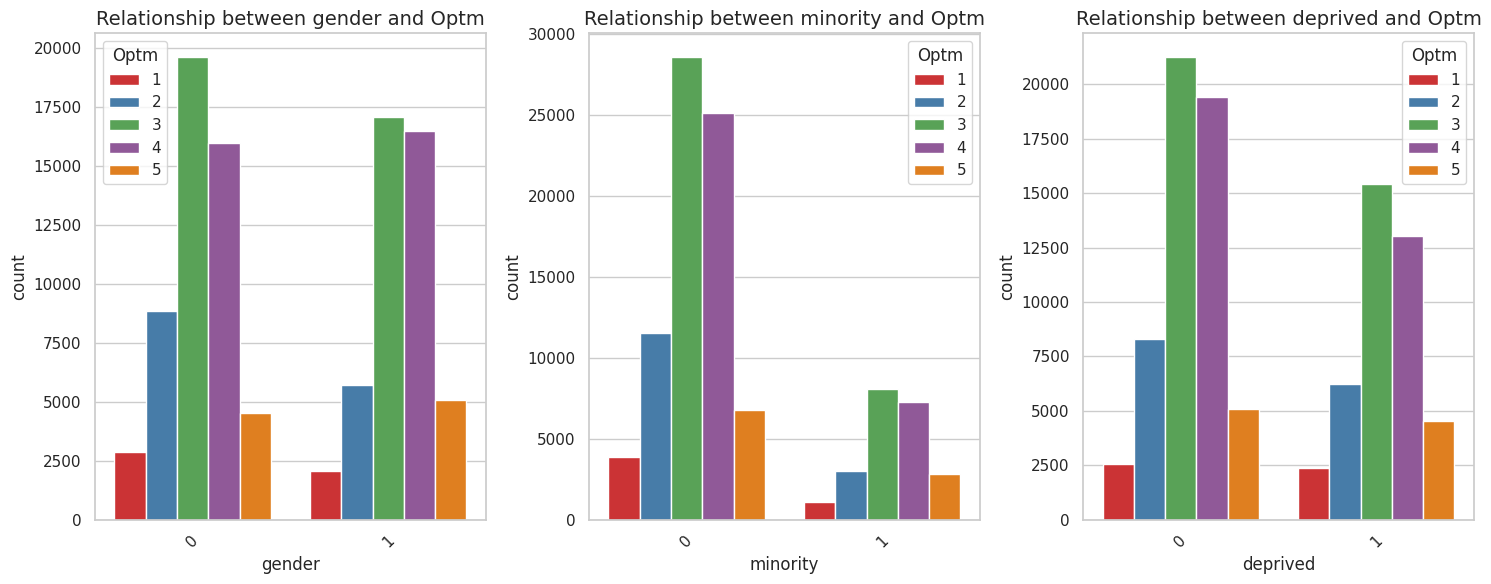

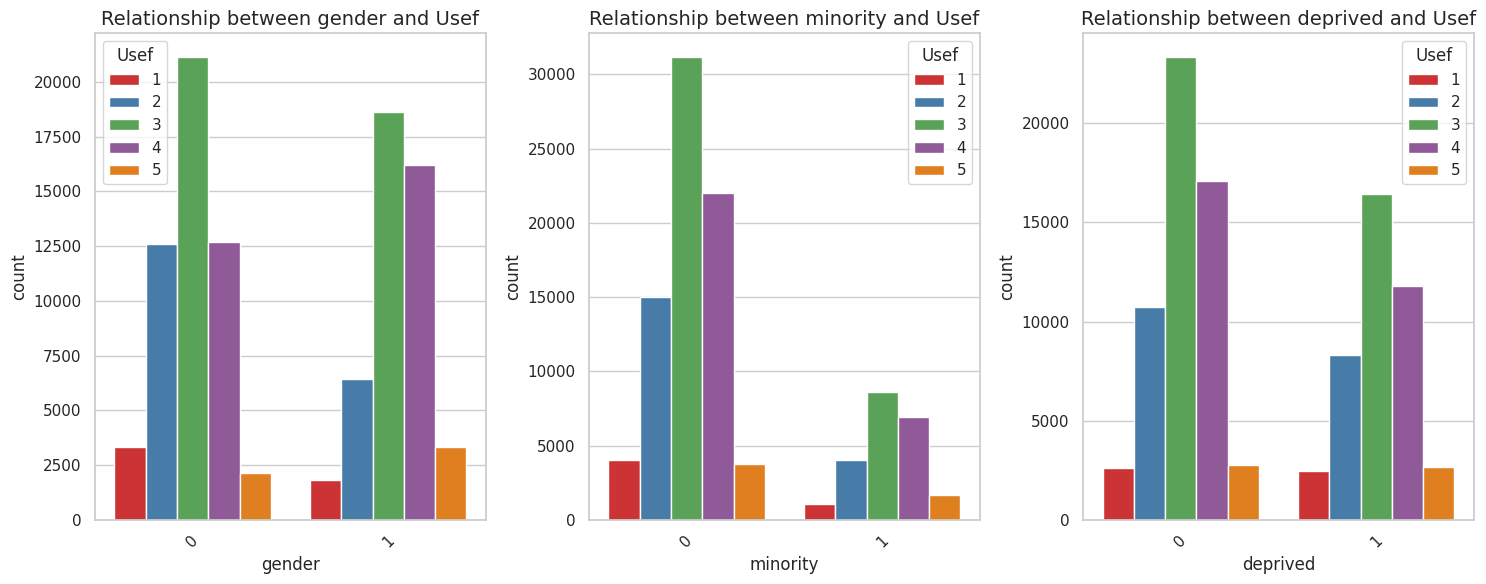

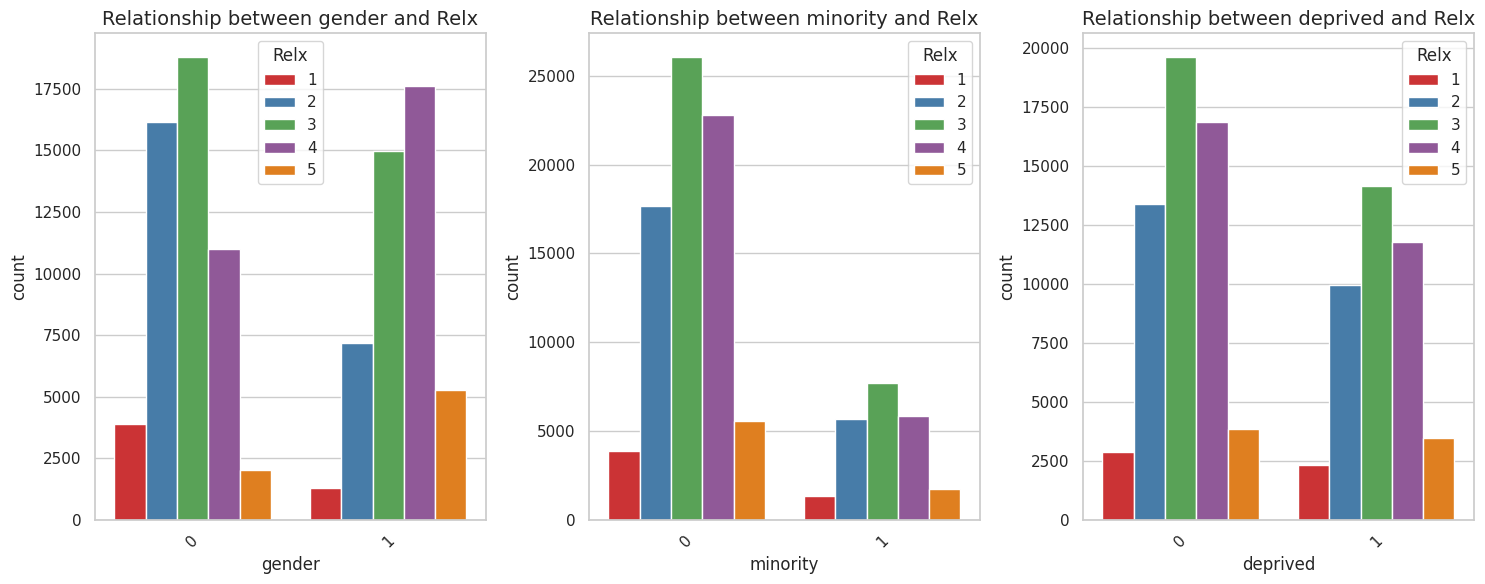

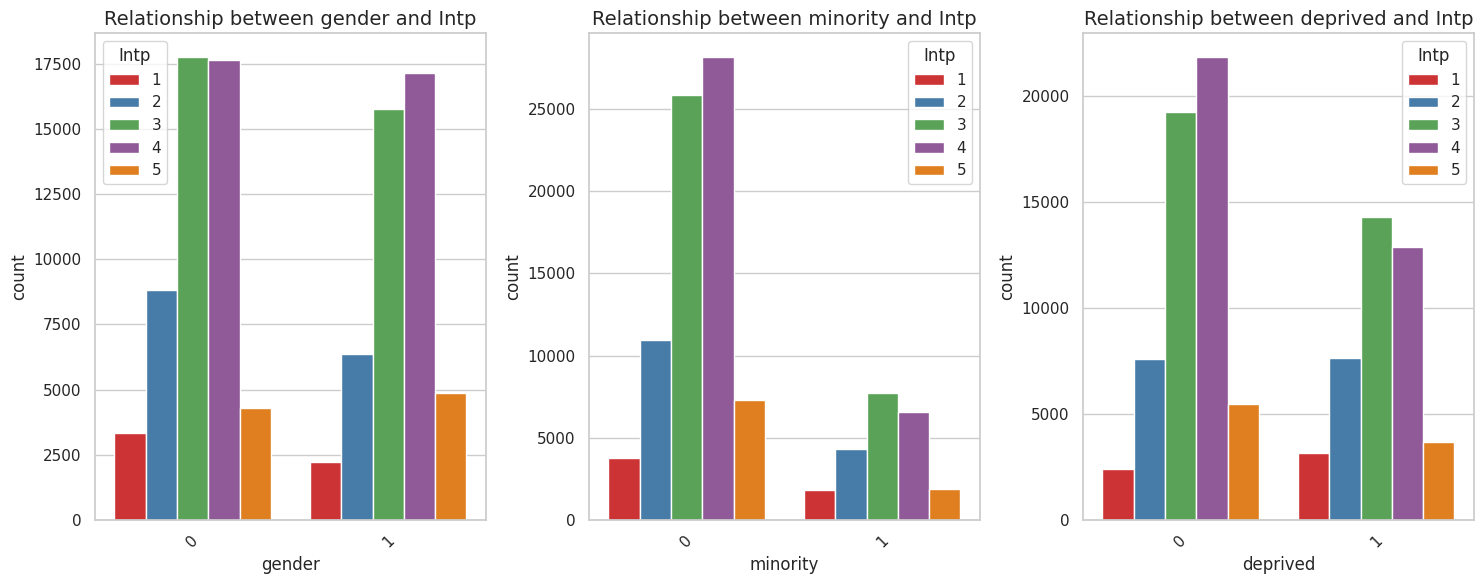

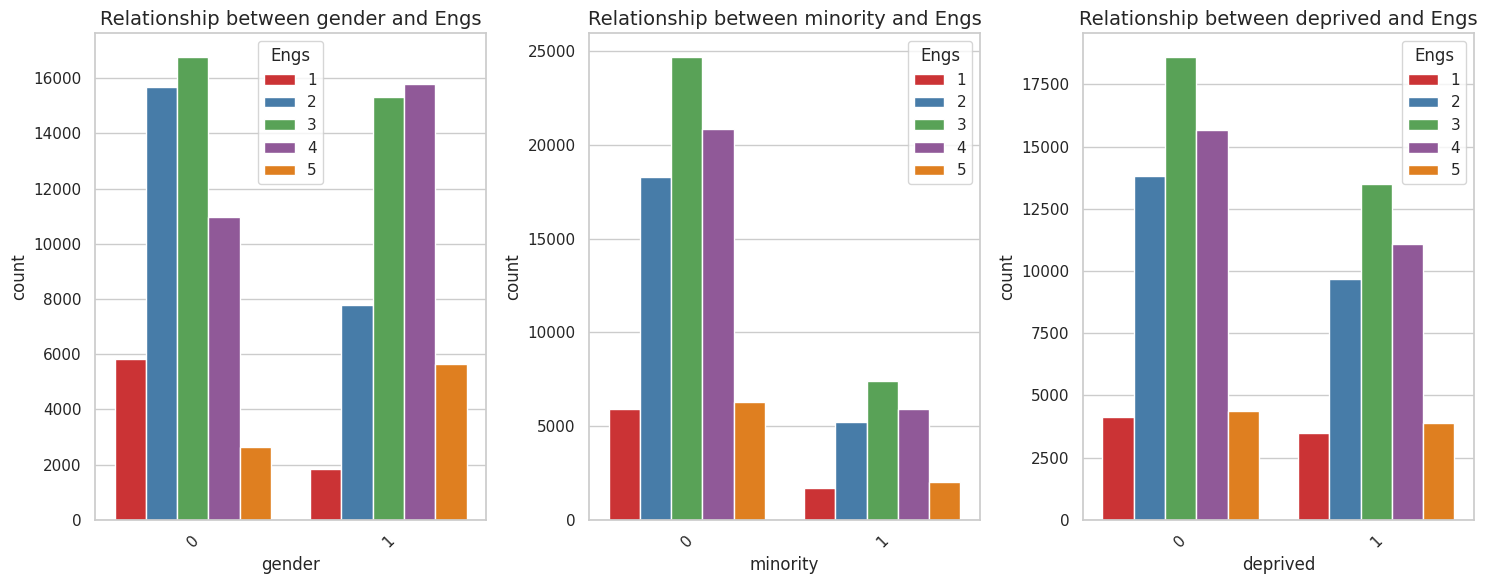

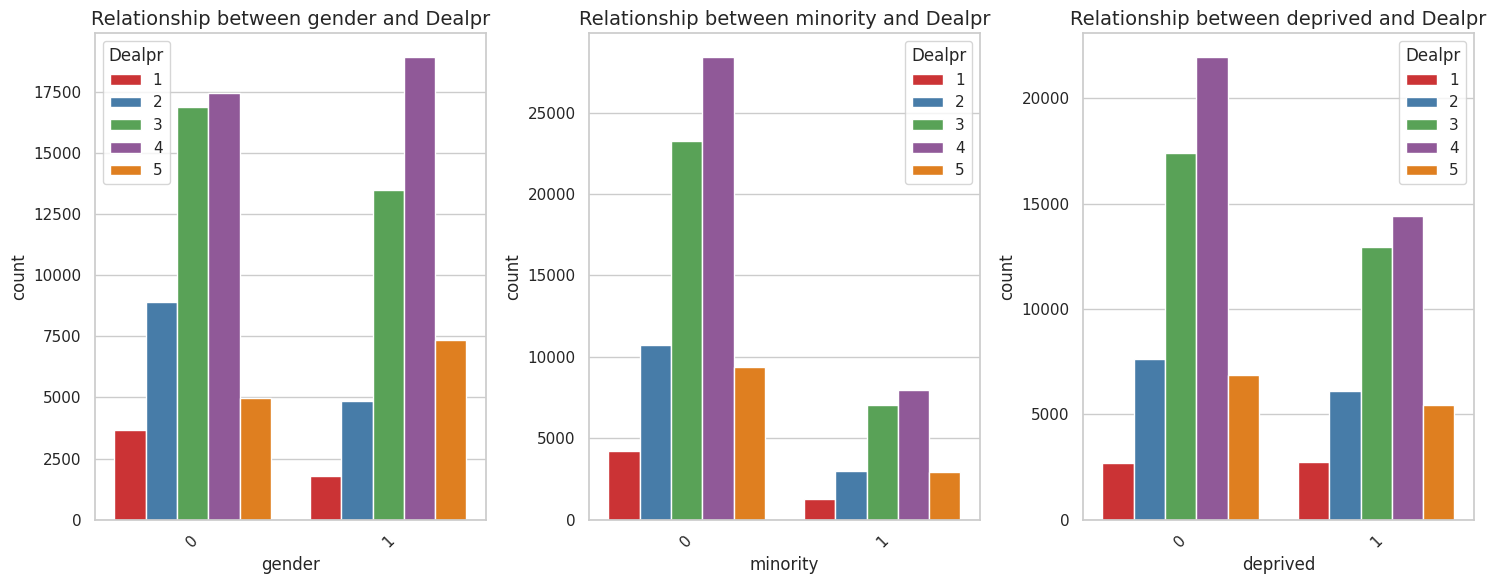

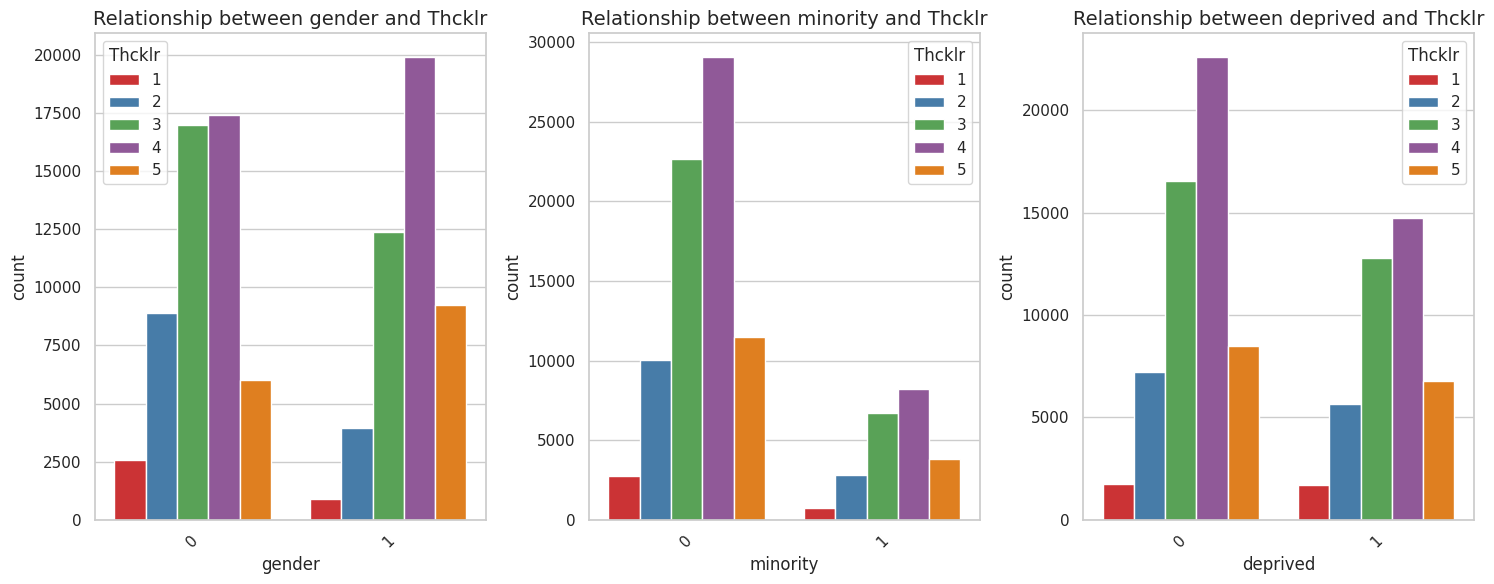

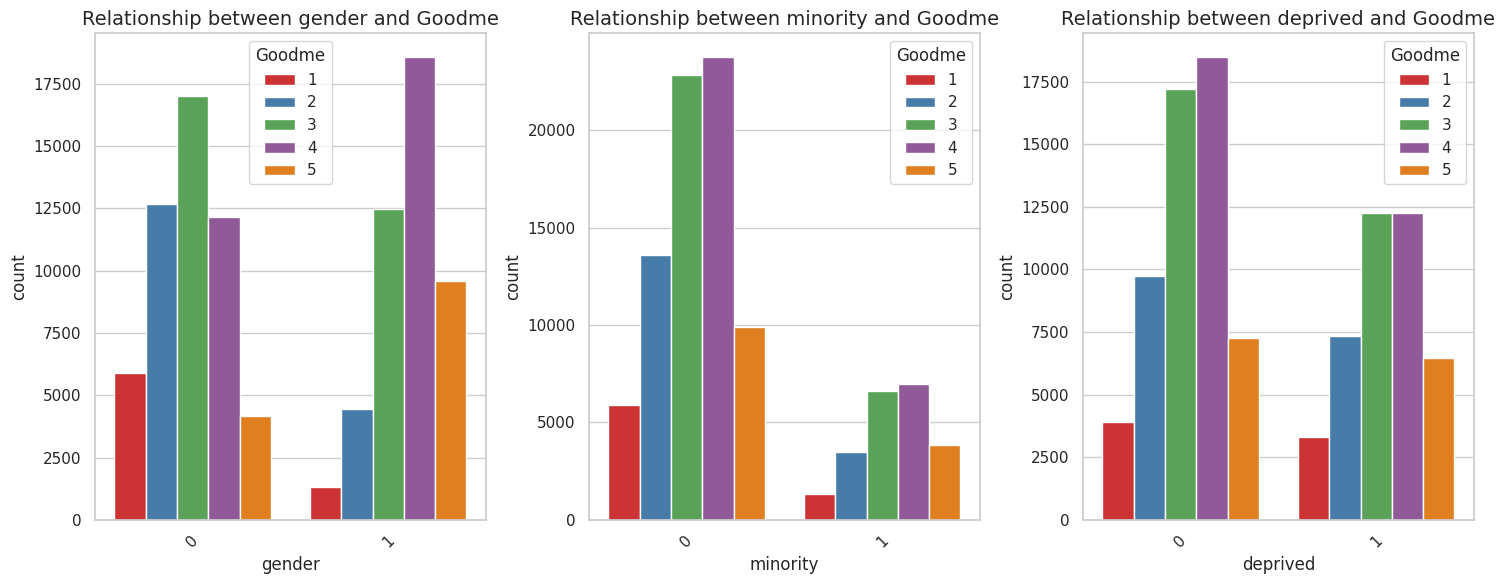

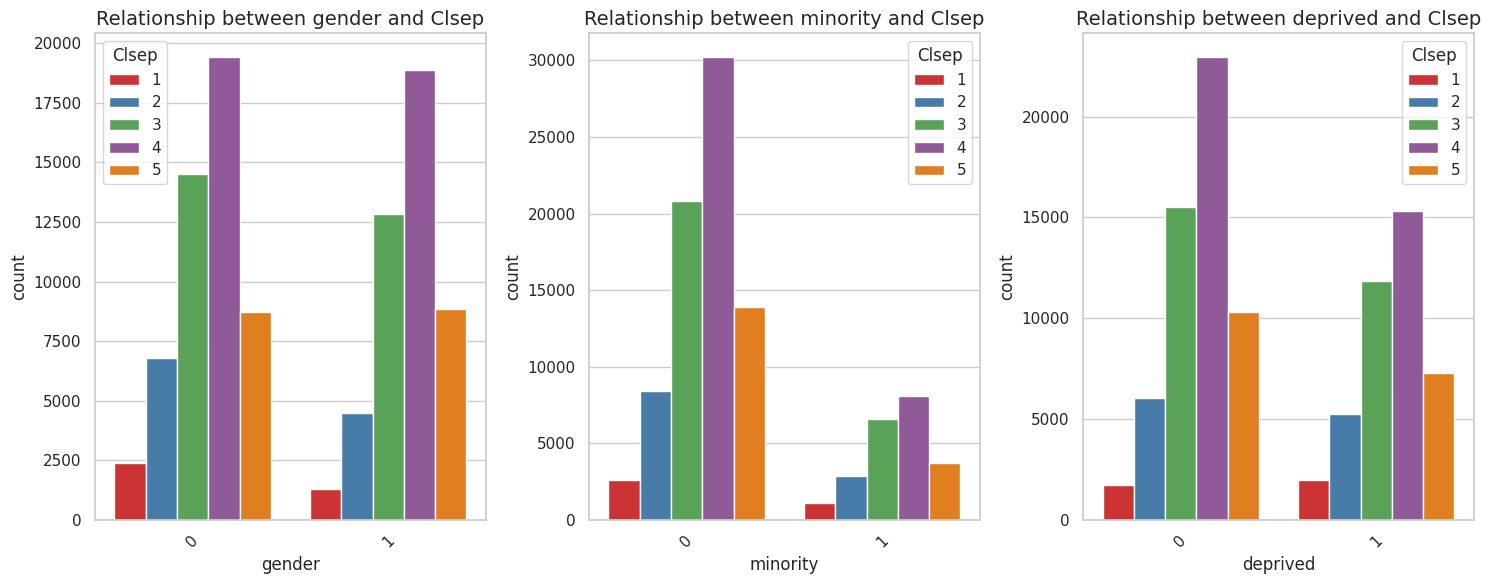

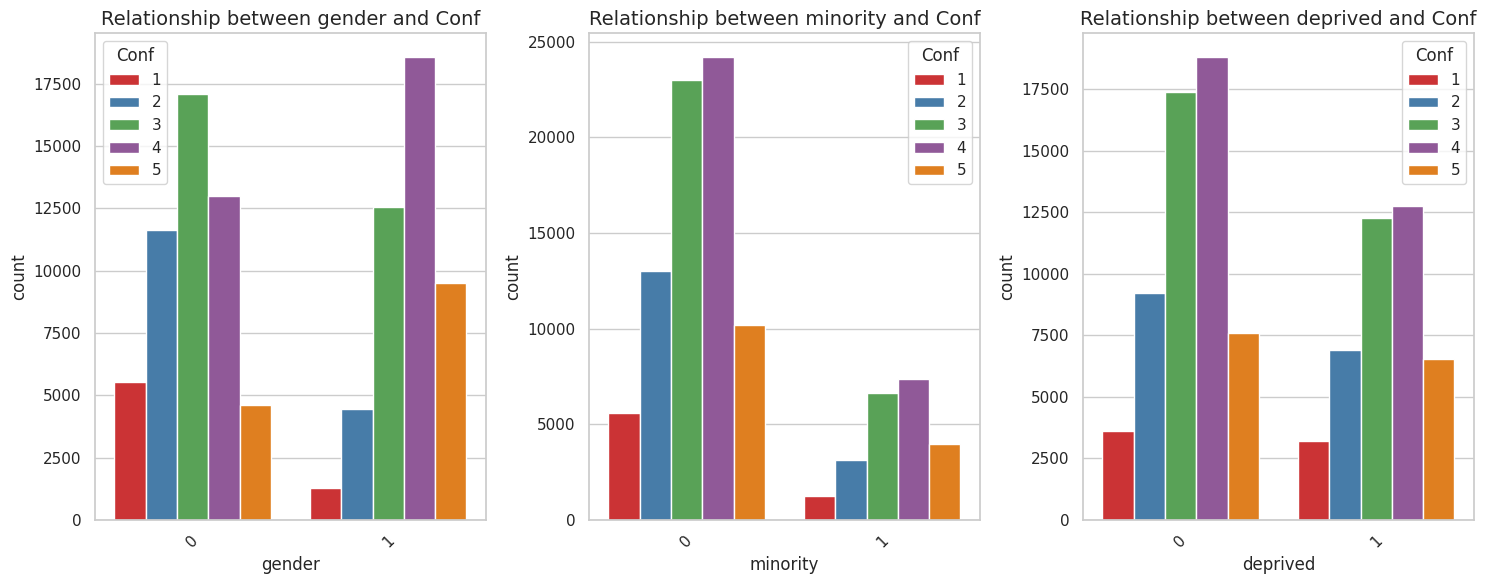

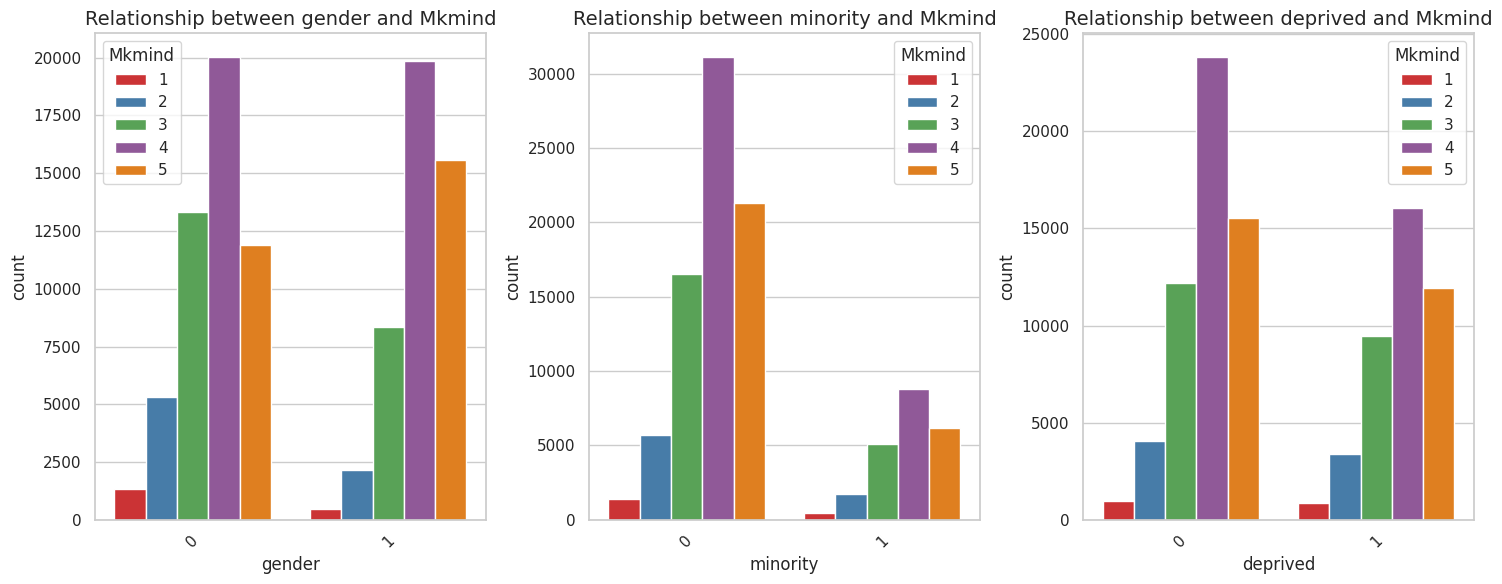

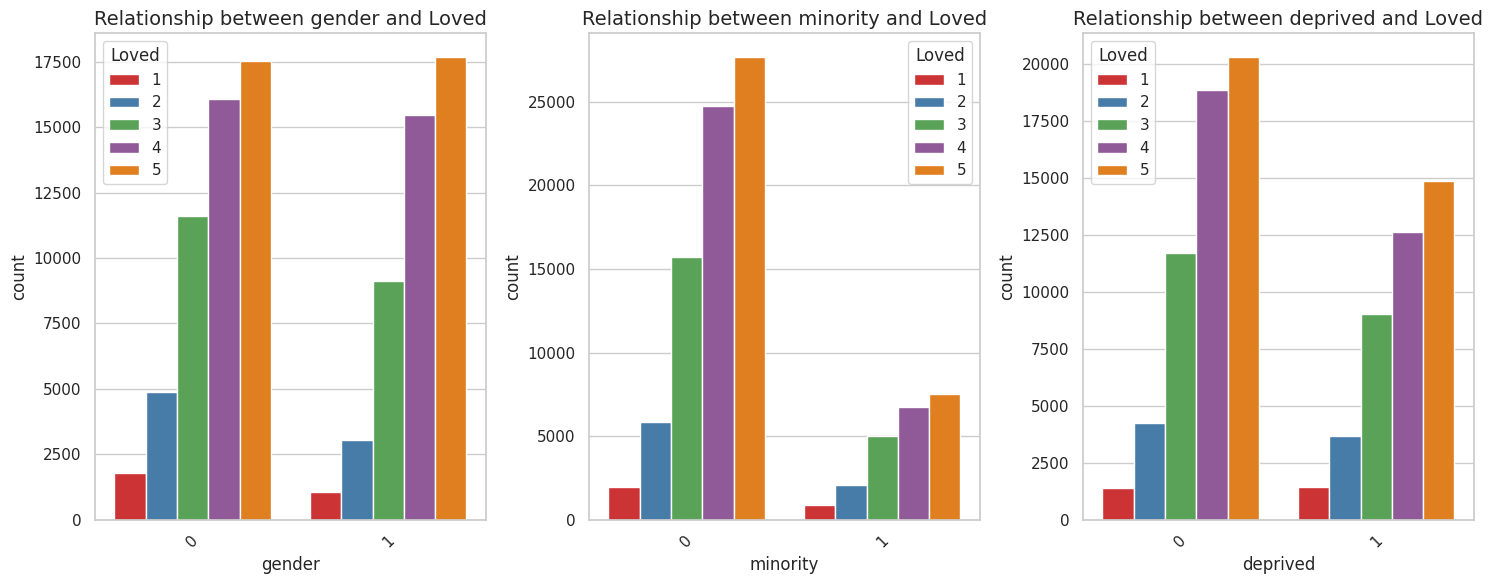

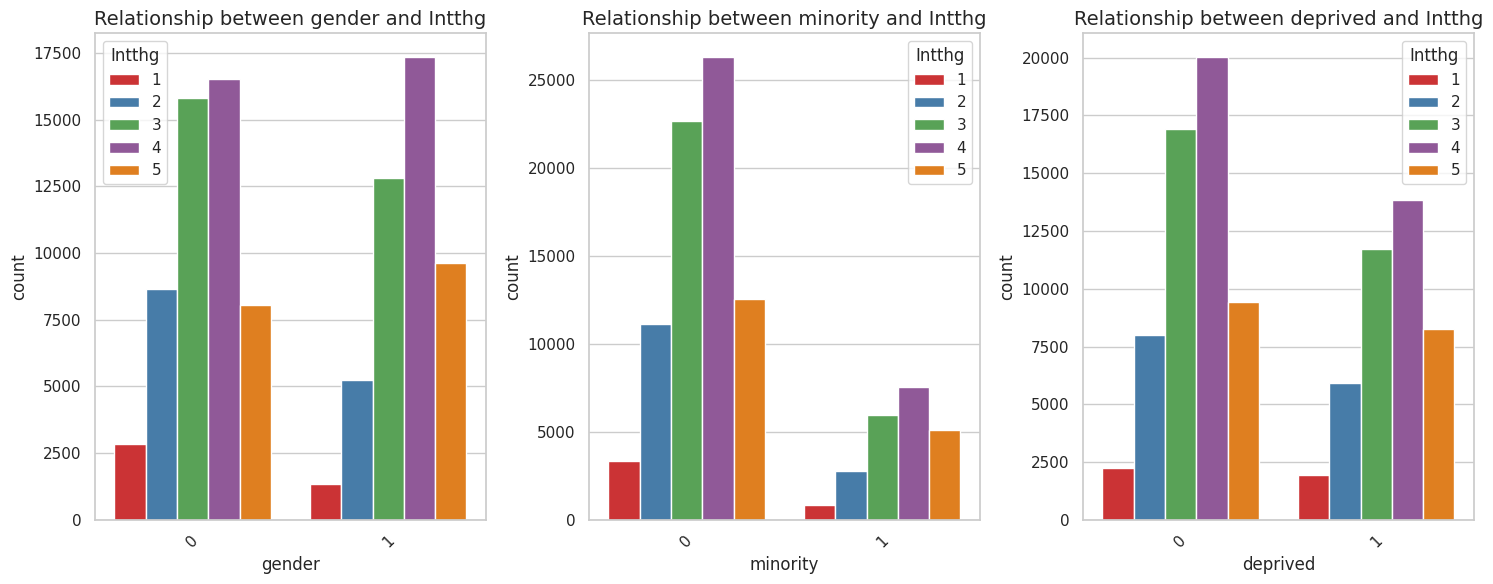

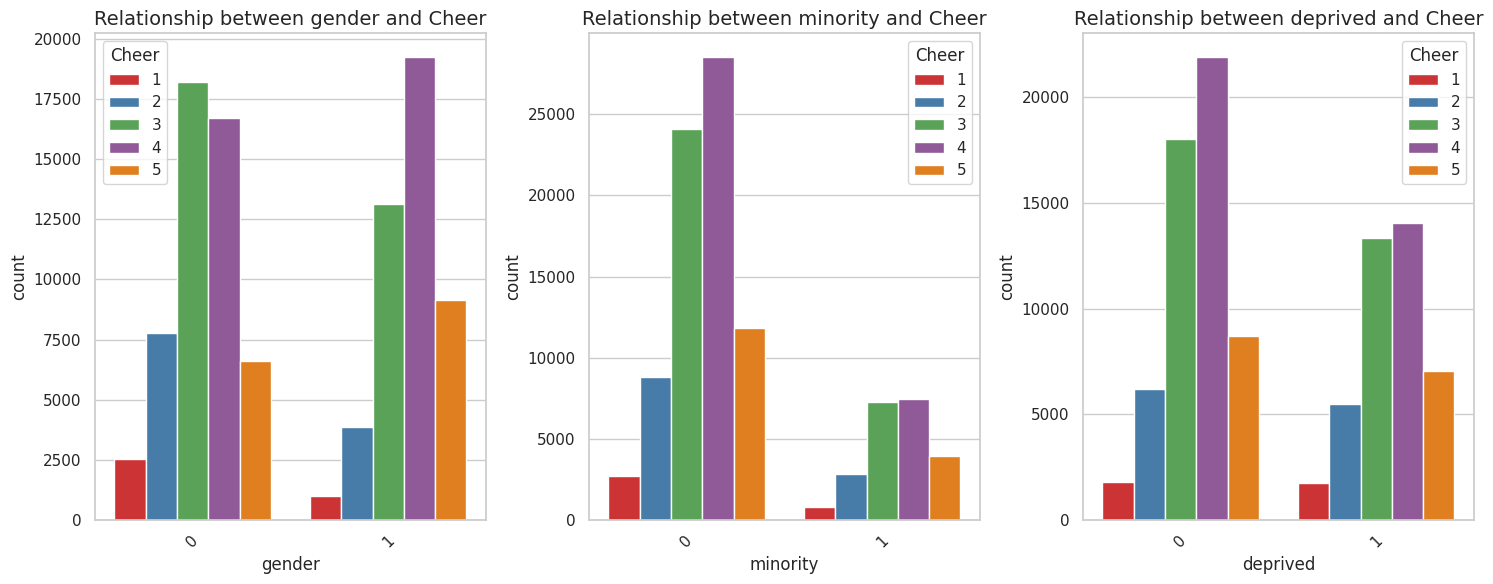

In [38]:
# Relationship between Categorical Features and Target Variables
for target in target_variables:
    plt.figure(figsize=(15, 6))
    
    for feature in categorical_features:
        plt.subplot(1, len(categorical_features), categorical_features.index(feature) + 1)
        sns.countplot(data=df, x=feature, hue=target, palette="Set1")
        plt.title(f'Relationship between {feature} and {target}', fontsize=14)
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


<h2><b>Distribution of Target Variables</b></h2>

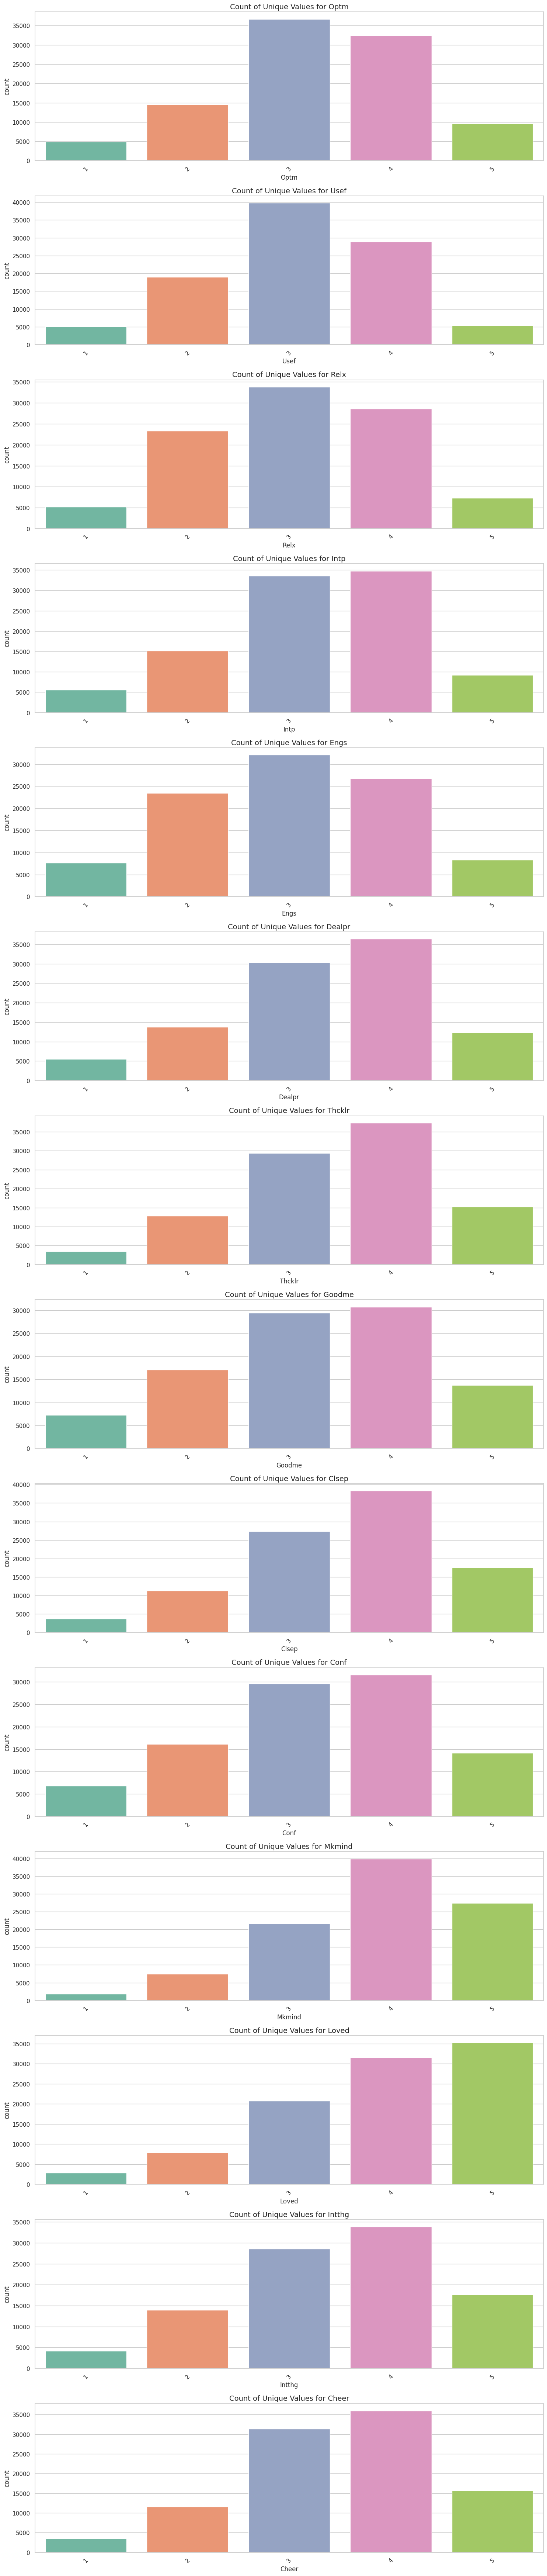

In [36]:
import warnings
warnings.filterwarnings('ignore')
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Count Plots for Target Features
plt.figure(figsize=(15, 5 * len(target_variables)))

for i, feature in enumerate(target_variables):
    plt.subplot(len(target_variables), 1, i + 1)
    sns.countplot(data=df, x=feature, palette="Set2")
    plt.title(f'Count of Unique Values for {feature}', fontsize=14)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


<h2><b>Box Plots for Outlier Detection and Handle Outlier</b></h2>

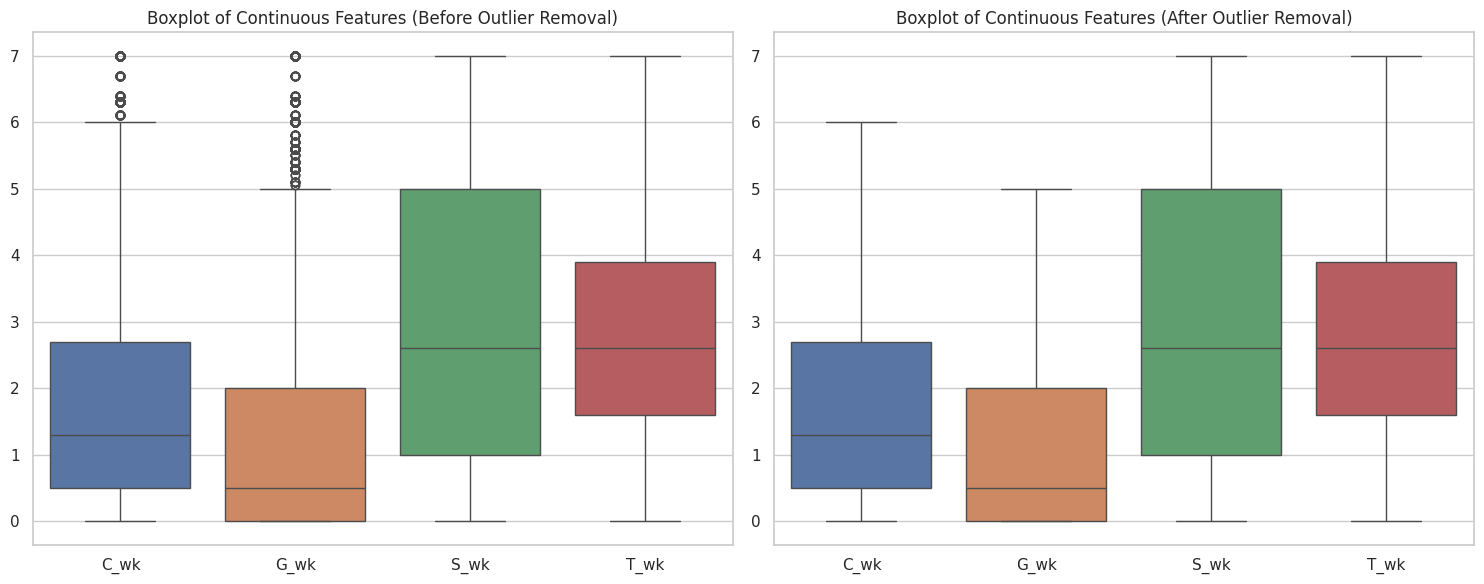

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def outlier_removal_and_visualization(df, continuous_features):
    # Set the style of seaborn
    sns.set(style="whitegrid")
    
    # Plot boxplots before outlier removal
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df[continuous_features])
    plt.title('Boxplot of Continuous Features (Before Outlier Removal)')
    
    # Remove outliers using IQR
    for feat in continuous_features:
        Q1 = df[feat].quantile(0.25)
        Q3 = df[feat].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace outliers
        df[feat] = np.where(df[feat] > upper_bound, upper_bound, 
                            np.where(df[feat] < lower_bound, lower_bound, df[feat]))

    # Plot boxplots after outlier removal
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df[continuous_features])
    plt.title('Boxplot of Continuous Features (After Outlier Removal)')
    
    # Show combined plots
    plt.tight_layout()
    plt.show()

# Example of usage
outlier_removal_and_visualization(df, continuous_features)


<h3><b>Data Transformation<b><h3>

In [46]:
import numpy as np
import pandas as pd

def min_max_normalization(df):
    normalized_df = df.copy()  # Create a copy of the DataFrame to avoid modifying the original
    for column in normalized_df.columns:
        if np.issubdtype(normalized_df[column].dtype, np.number):
            min_val = normalized_df[column].min()
            max_val = normalized_df[column].max()
            # Apply Min-Max normalization
            normalized_df[column] = (normalized_df[column] - min_val) / (max_val - min_val)
    return normalized_df




In [41]:
df = min_max_normalization(df)


In [43]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import VarianceThreshold

# Initialize a dictionary to store feature importance results
feature_importance_results = {}
score_threshold = 0.1  # Set your score threshold here for MI

# Function to calculate mutual information for regression tasks
def calculate_mutual_information(X, y):
    mi = mutual_info_regression(X, y)
    mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})
    return mi_df.sort_values(by='Mutual Information', ascending=False)

# Function to calculate variance of features
def calculate_variance(X):
    variance = X.var()
    variance_df = pd.DataFrame({'Feature': X.columns, 'Variance': variance})
    return variance_df.sort_values(by='Variance', ascending=False)

# Iterate over each target variable
for target in target_variables:
    print(f'--- Analysis for Target Variable: {target} ---')

    # Separate features and target
    X = df.drop(columns=target_variables)  # Features
    y = df[target]  # Target variable

    # 1. Mutual Information
    mutual_info_df = calculate_mutual_information(X, y)
    important_mi_features = mutual_info_df[mutual_info_df['Mutual Information'] > score_threshold]

    # 2. Variance Analysis
    variance_df = calculate_variance(X)
    important_variance_features = variance_df[variance_df['Variance'] > 0]  # Keeping features with variance

    # Store results
    feature_importance_results[target] = {
        'Mutual Information': important_mi_features,
        'Variance': important_variance_features
    }

    # Print results for each target variable
    print("Important Features Based on Mutual Information:")
    print(feature_importance_results[target]['Mutual Information'])

    print("Important Features Based on Variance Analysis:")
    print(feature_importance_results[target]['Variance'])
    
    print()  # Newline for readability

# Combine all important features for all target variables based on MI and variance
all_important_features = set()

for target, results in feature_importance_results.items():
    all_important_features.update(results['Mutual Information']['Feature'].values)
    all_important_features.update(results['Variance']['Feature'].values)

# Identify non-important features based on analysis
non_important_features = X.columns[~X.columns.isin(all_important_features)]

# Remove non-important features from the DataFrame
if len(non_important_features) > 0:
    df.drop(columns=non_important_features, inplace=True)
    print("Removed Non-Important Features:")
    print(non_important_features.tolist())
else:
    print("No non-important features to remove.")


--- Analysis for Target Variable: Optm ---
Important Features Based on Mutual Information:
Empty DataFrame
Columns: [Feature, Mutual Information]
Index: []
Important Features Based on Variance Analysis:
           Feature  Variance
gender      gender  0.249222
deprived  deprived  0.244230
minority  minority  0.175239
S_wk          S_wk  0.110474
G_wk          G_wk  0.093049
C_wk          C_wk  0.077707
T_wk          T_wk  0.056205

--- Analysis for Target Variable: Usef ---
Important Features Based on Mutual Information:
Empty DataFrame
Columns: [Feature, Mutual Information]
Index: []
Important Features Based on Variance Analysis:
           Feature  Variance
gender      gender  0.249222
deprived  deprived  0.244230
minority  minority  0.175239
S_wk          S_wk  0.110474
G_wk          G_wk  0.093049
C_wk          C_wk  0.077707
T_wk          T_wk  0.056205

--- Analysis for Target Variable: Relx ---
Important Features Based on Mutual Information:
Empty DataFrame
Columns: [Feature, Mu

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.multioutput import MultiOutputRegressor
import statsmodels.api as sm
import warnings

warnings.filterwarnings('ignore')


<h2><b>Data Splitting</b></h2>

In [45]:
def split_features_targets(df, target_variables):
    X = df.drop(columns=target_variables)
    y = df[target_variables]
    return X, y

# Example usage
target_variables = df.columns[11:].tolist()  # Define your target variables
X, y = split_features_targets(df, target_variables)


<h3><b>standardization</b></h3>

In [47]:
def standardize_features(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

# Standardizing the features
X_scaled = standardize_features(X)


<h3><b>PCA</b></h3>

In [48]:
def apply_pca(X_scaled, n_components=6):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    return X_pca

# Apply PCA to the standardized features
X_pca = apply_pca(X_scaled)


In [50]:
def split_data(X_pca, y):
    return train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Splitting the dataset
X_train, X_test, y_train, y_test = split_data(X_pca, y)

def grid_search_tuning(X_train, y_train):
    ridge_params = {'estimator__alpha': [0.01, 0.1, 1, 10, 100]}
    lasso_params = {'estimator__alpha': [0.01, 0.1, 1, 10, 100]}

    ridge_grid = GridSearchCV(MultiOutputRegressor(Ridge()), ridge_params, cv=5, scoring='neg_mean_squared_error')
    lasso_grid = GridSearchCV(MultiOutputRegressor(Lasso()), lasso_params, cv=5, scoring='neg_mean_squared_error')

    ridge_grid.fit(X_train, y_train)
    lasso_grid.fit(X_train, y_train)

    return ridge_grid.best_estimator_, lasso_grid.best_estimator_

# Performing hyperparameter tuning
best_ridge_model, best_lasso_model = grid_search_tuning(X_train, y_train)


In [51]:
def fit_linear_model(X_train, y_train):
    model = MultiOutputRegressor(LinearRegression())
    model.fit(X_train, y_train)
    return model

# Fit the linear model
multi_linear_model = fit_linear_model(X_train, y_train)


In [52]:
def predict_models(X_test, linear_model, ridge_model, lasso_model):
    y_pred_linear = linear_model.predict(X_test)
    y_pred_ridge = ridge_model.predict(X_test)
    y_pred_lasso = lasso_model.predict(X_test)
    return y_pred_linear, y_pred_ridge, y_pred_lasso

# Make predictions using the models
y_pred_linear, y_pred_ridge, y_pred_lasso = predict_models(X_test, multi_linear_model, best_ridge_model, best_lasso_model)


In [53]:
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred, multioutput='uniform_average')
    mae = mean_absolute_error(y_true, y_pred, multioutput='uniform_average')
    r2 = r2_score(y_true, y_pred, multioutput='uniform_average')
    return mse, mae, r2

# Evaluating models
mse_linear, mae_linear, r2_linear = evaluate_model(y_test, y_pred_linear)
mse_ridge, mae_ridge, r2_ridge = evaluate_model(y_test, y_pred_ridge)
mse_lasso, mae_lasso, r2_lasso = evaluate_model(y_test, y_pred_lasso)

# Print evaluation metrics
print(f"Linear Regression - MSE: {mse_linear}, MAE: {mae_linear}, R2: {r2_linear}")
print(f"Ridge Regression - MSE: {mse_ridge}, MAE: {mae_ridge}, R2: {r2_ridge}")
print(f"Lasso Regression - MSE: {mse_lasso}, MAE: {mae_lasso}, R2: {r2_lasso}")


Linear Regression - MSE: 0.050073365615418905, MAE: 0.17767686852302683, R2: 0.2762561193058013
Ridge Regression - MSE: 0.050073340953237636, MAE: 0.17767735088983144, R2: 0.27625646161721573
Lasso Regression - MSE: 0.05046366254378173, MAE: 0.17917010137117476, R2: 0.2706165894643977


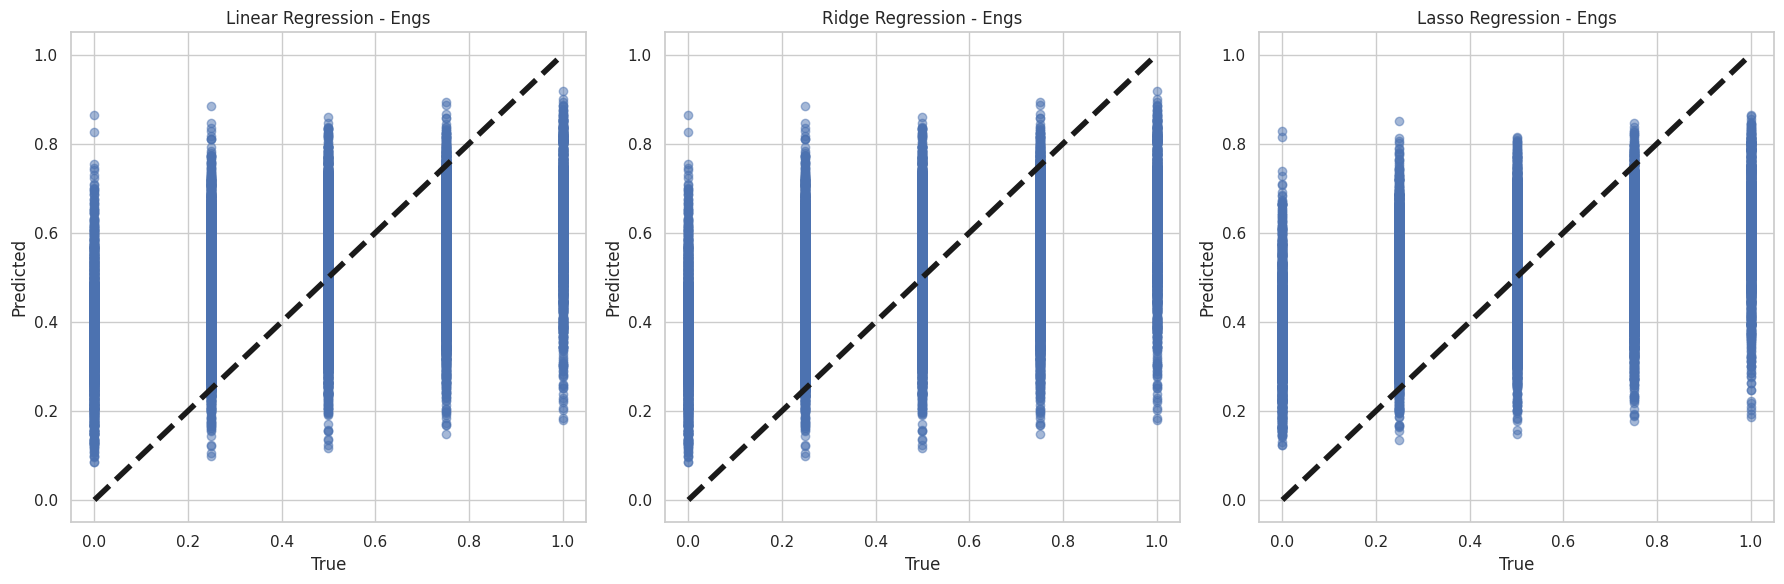

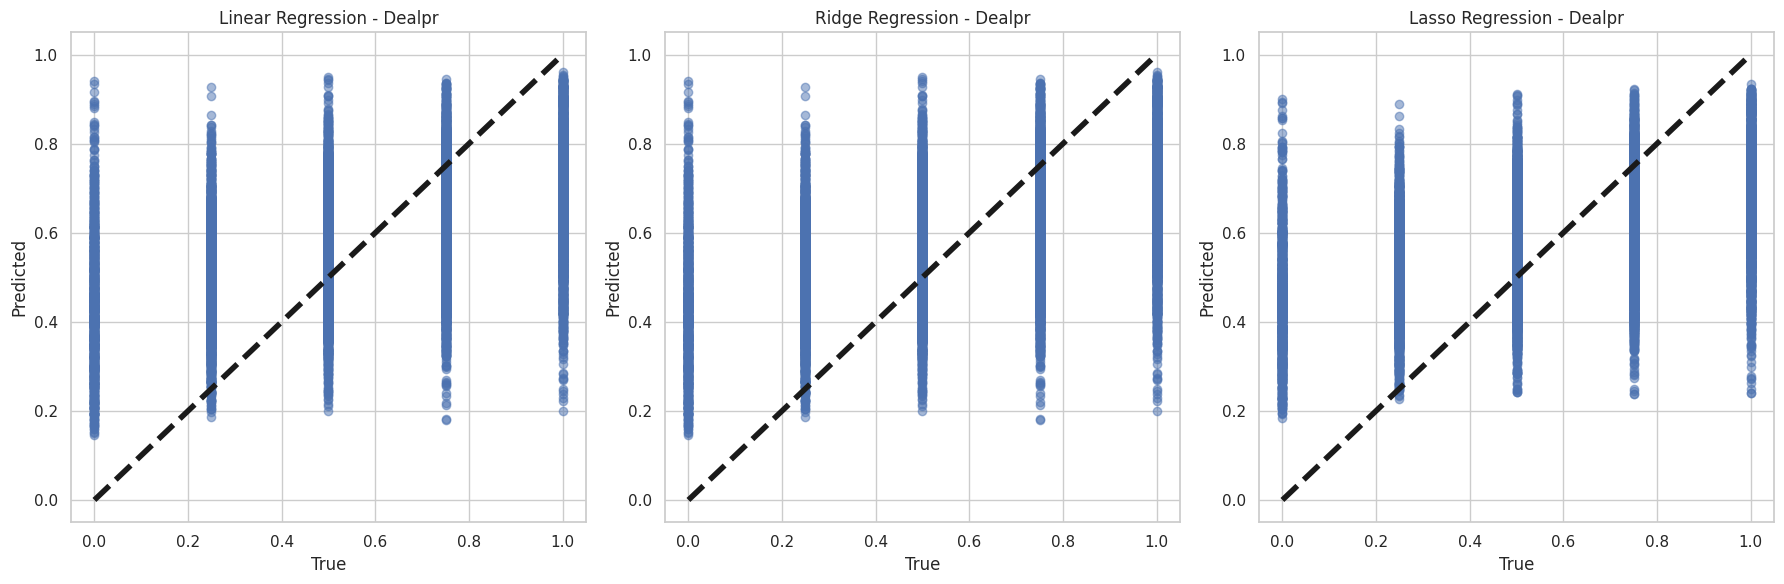

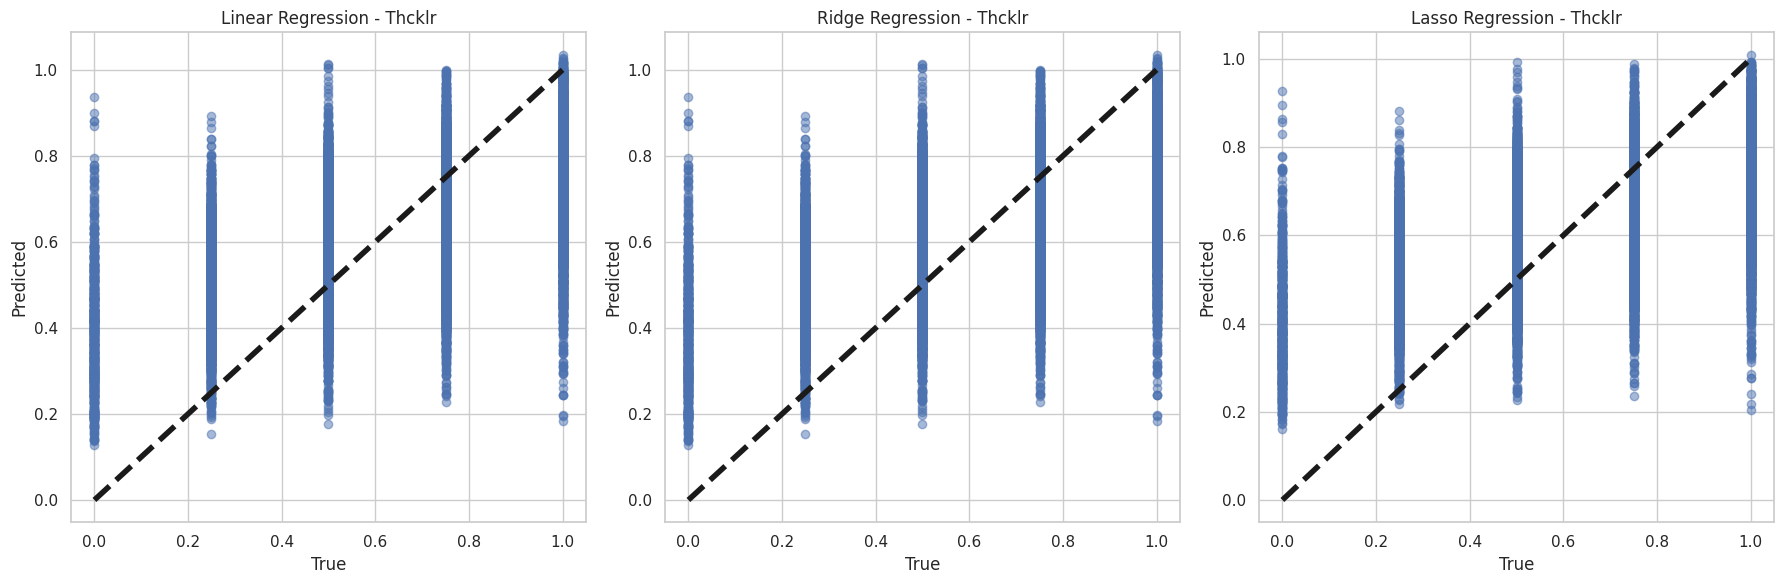

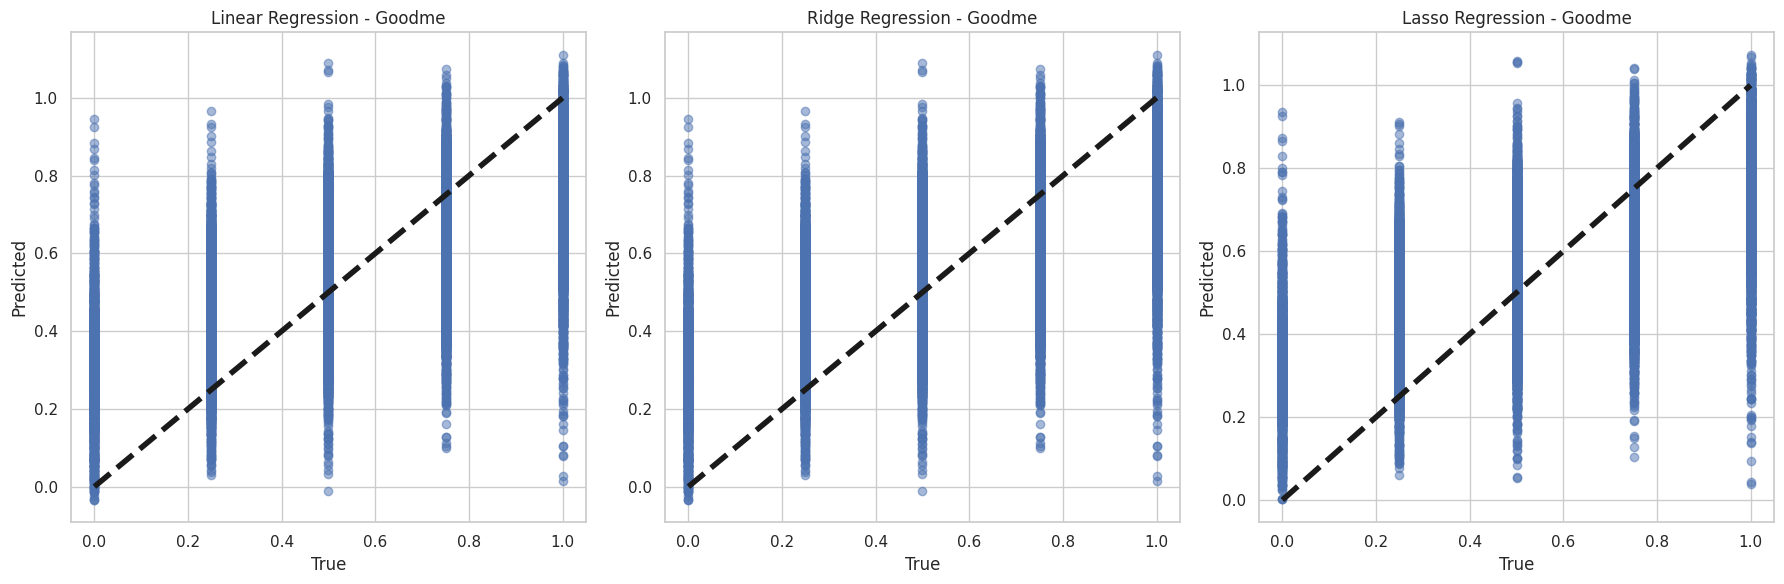

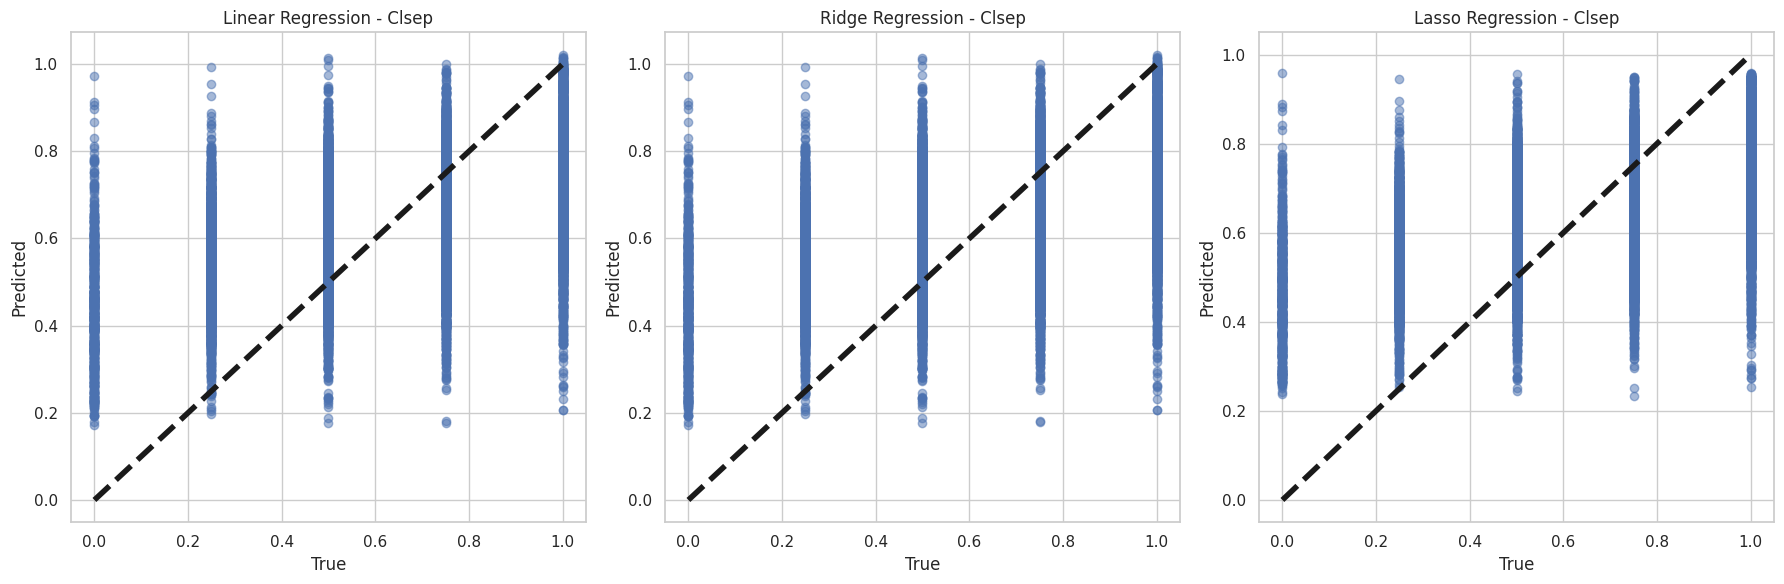

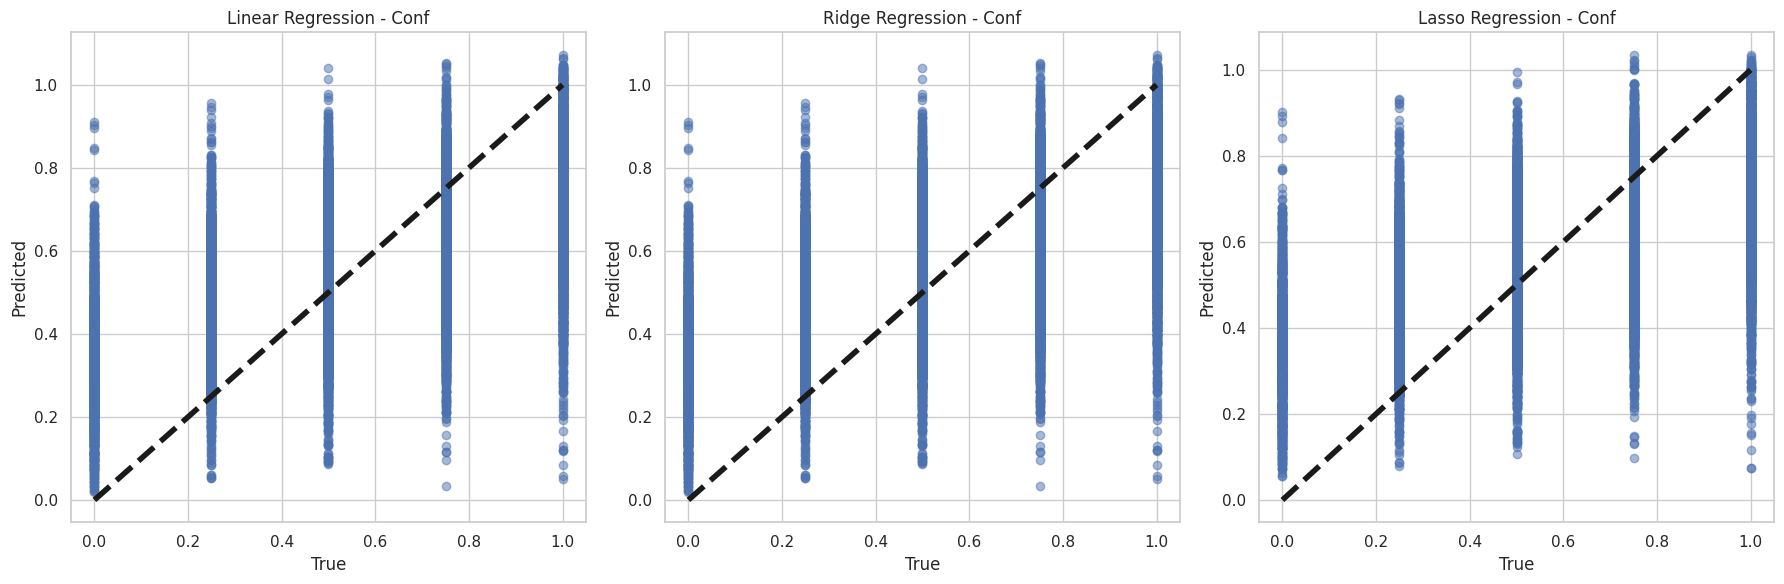

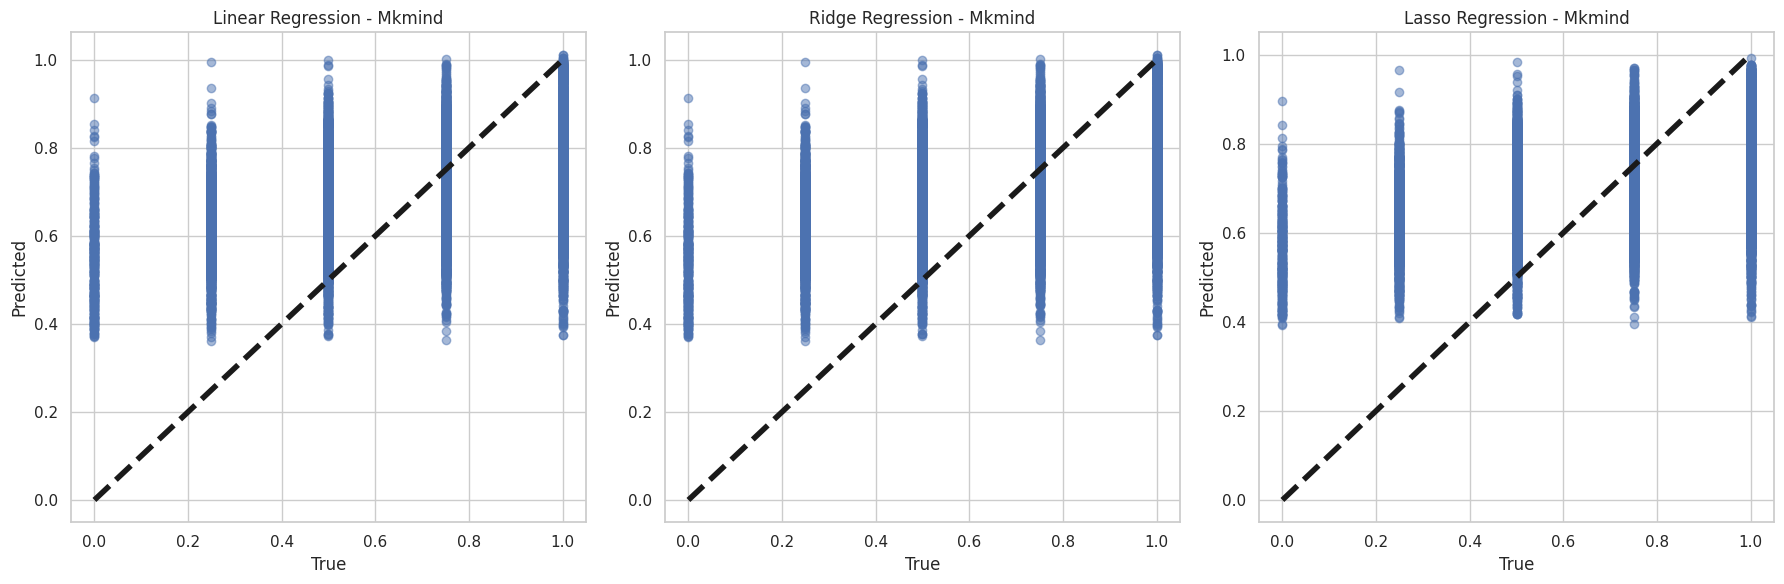

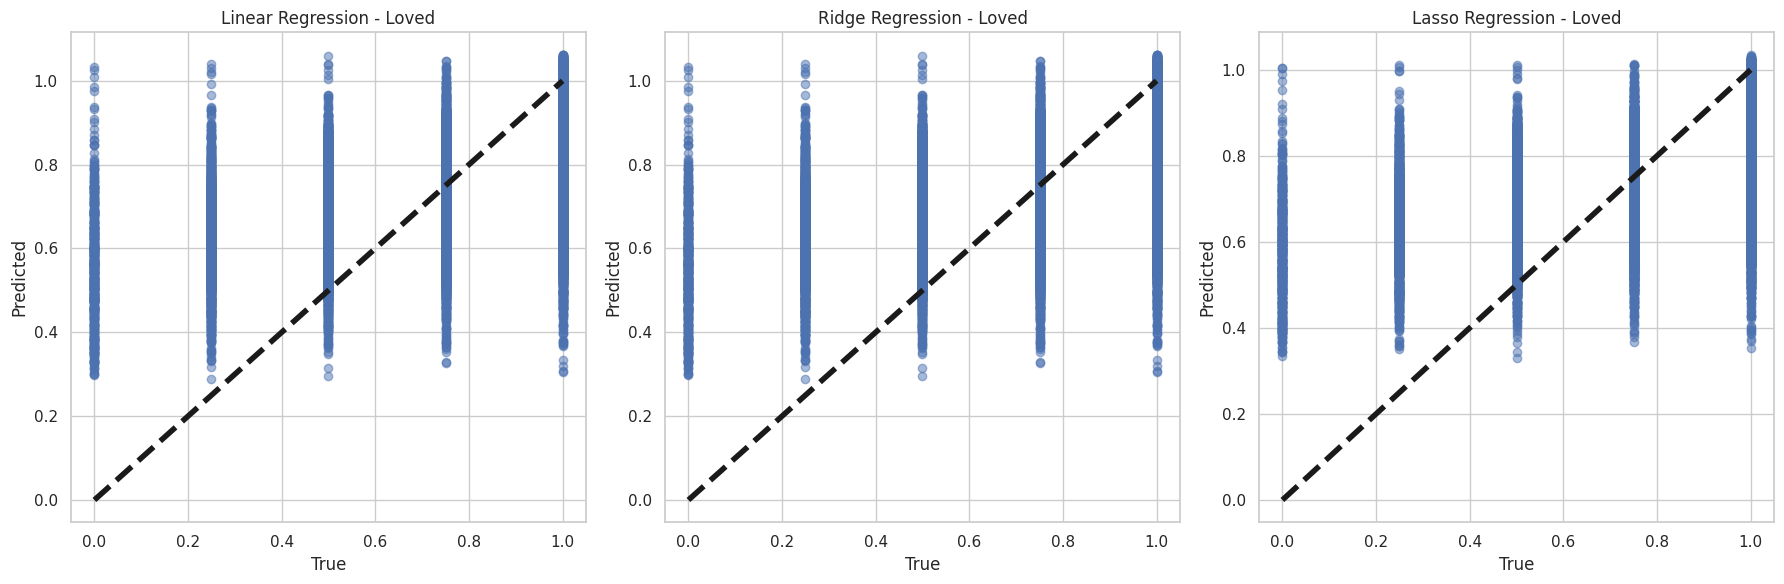

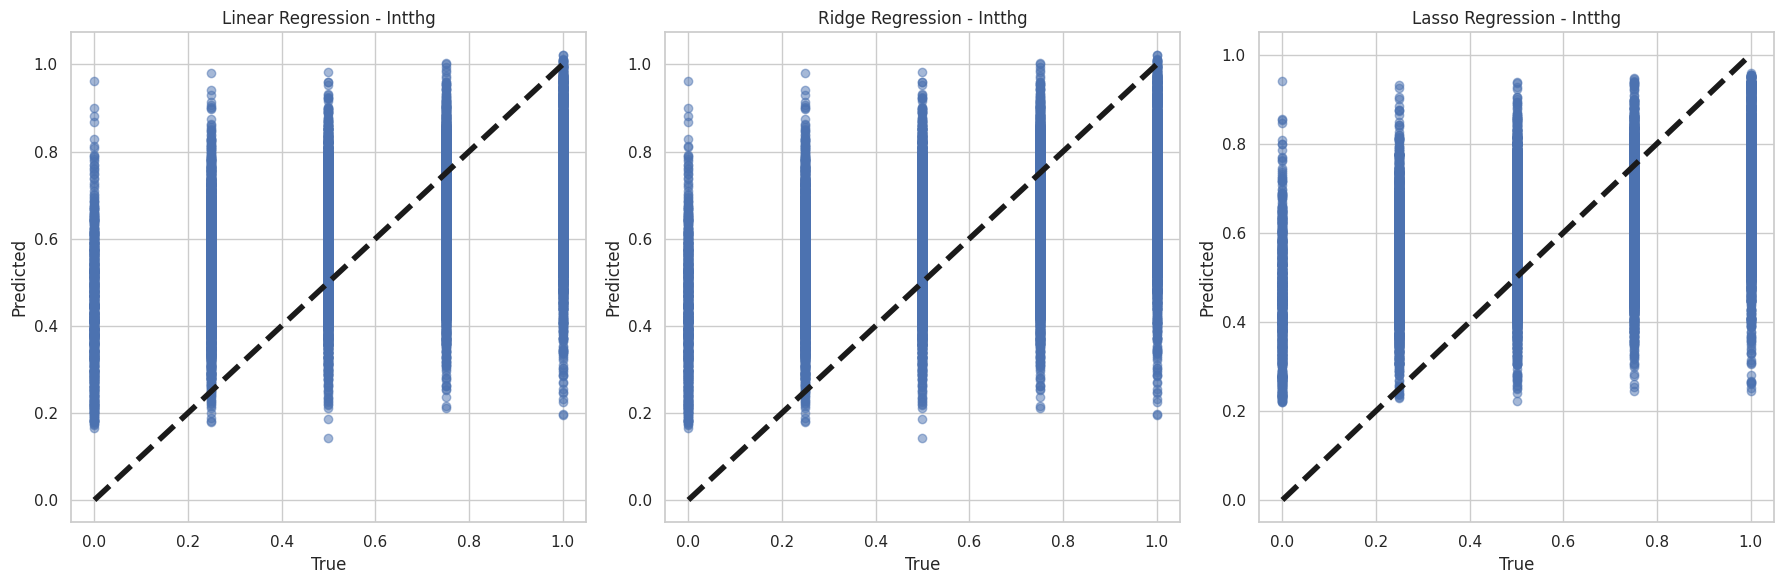

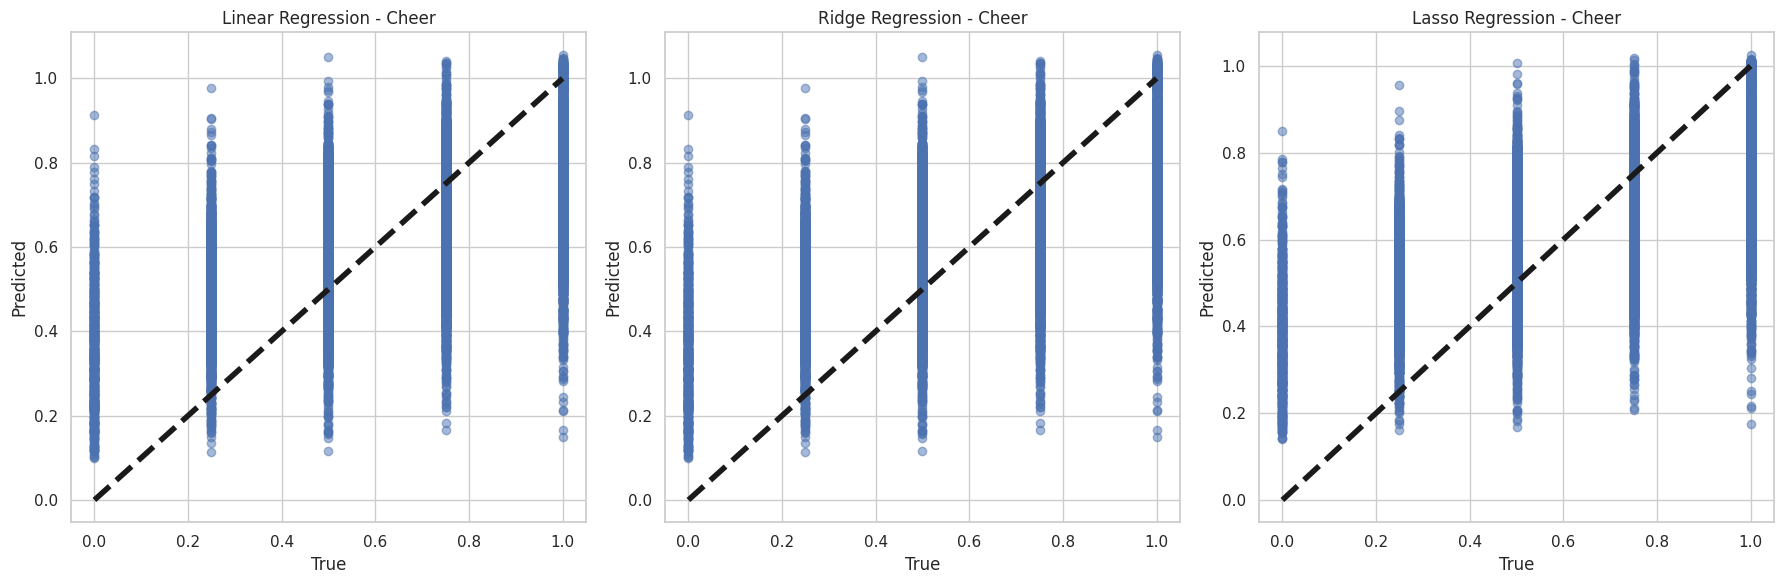

In [54]:
def visualize_results(y_test, y_pred_linear, y_pred_ridge, y_pred_lasso, target_variables):
    for i, target in enumerate(target_variables):
        plt.figure(figsize=(18, 6))
        
        plt.subplot(1, 3, 1)
        plt.scatter(y_test.iloc[:, i], y_pred_linear[:, i], alpha=0.5)
        plt.plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], 
                 [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], 'k--', lw=4)
        plt.xlabel('True')
        plt.ylabel('Predicted')
        plt.title(f'Linear Regression - {target}')

        plt.subplot(1, 3, 2)
        plt.scatter(y_test.iloc[:, i], y_pred_ridge[:, i], alpha=0.5)
        plt.plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], 
                 [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], 'k--', lw=4)
        plt.xlabel('True')
        plt.ylabel('Predicted')
        plt.title(f'Ridge Regression - {target}')

        plt.subplot(1, 3, 3)
        plt.scatter(y_test.iloc[:, i], y_pred_lasso[:, i], alpha=0.5)
        plt.plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], 
                 [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], 'k--', lw=4)
        plt.xlabel('True')
        plt.ylabel('Predicted')
        plt.title(f'Lasso Regression - {target}')

        plt.tight_layout()
        plt.show()

# Visualize the results
visualize_results(y_test, y_pred_linear, y_pred_ridge, y_pred_lasso, target_variables)
